# **Tensor-Train Thermo-Field Dynamics (TT-TFD) + Generalized Quantum Master Equation (GQME) Tutorial**

Developed by Ningyi Lyu (ningyi.lyu@yale.edu) and Ellen Mulvihill (ellen.mulvihill@yale.edu)

Based on ["Tensor-Train Thermo-Field Memory Kernels for Generalized Quantum Master Equations"](https://arxiv.org/abs/2208.14273) by Ningyi Lyu, Ellen Mulvihill, Micheline B. Soley, Eitan Geva, Victor S. Batista

# **I. Introduction**

## **I.i Motivation**

$\quad$ Quantum dynamics simulations are central to theoretical studies of many areas of chemistry and technological applications. Despite considerable progress over the past few decades, the development of efficient methods for simulations of quantum dynamics remains an outstanding challenge for studies of complex molecular systems at finite temperature. This is primarily due to the computational cost of quantum-mechanically exact simulations, which scales exponentially with the number of degrees of freedom in the system, thereby making such simulations intractable in most complex molecular systems of practical interest. Thus, reduced-dimensionality approaches that can offer more favorable scaling are highly desirable. 

$\quad$ The Nakajima-Zwanzig generalized quantum master equation (GQME) provides a formally exact general-purpose framework for modeling quantum dynamics in reduced dimensionality. It can be obtained for any subset of reduced density matrix elements by using suitable projection operators. When focusing on electronic dynamics, the effect of projecting out nuclear degrees of freedoms (DOF) and electronic density matrix elements not included in the subset of interest is accounted for by the *memory kernel* and the *inhomogeneous term* of the GQME. The dimensionality of those spatially and temporally compact quantities is typically much lower than the dimensionality of the overall system since it is determined by the number of reduced density matrix elements included in the subset of interest, allowing for efficient simulations. 

$\quad$ Considerable progress has already been made towards calculating the aforementioned memory kernels and inhomogeneous terms without resorting to perturbation theory.
Much of that progress has been based on the strategy introduced by [Shi and Geva](https://aip.scitation.org/doi/10.1063/1.1624830), which relies on formally exact relationships between the memory kernel and the inhomogeneous term and projection-free inputs (PFIs) that are given in terms of two-time correlation functions of the overall system. These PFIs can be obtained from quantum-mechanically exact or approximate (e.g., semiclassical or mixed quantum-classical) input methods.

$\quad$ In this paper, we introduce exact memory kernels and inhomogeneous terms obtained from quantum-mechanically exact tensor-train thermo-field dynamics (TT-TFD) simulations. To the best of our knowledge, this is the first application of TT-TFD to calculations of memory kernels and inhomogeneous terms of GQMEs. Previously, exact memory kernels have been obtained by the Geva, Shi, Makri, and Rabani groups. [Our paper](https://arxiv.org/abs/2208.14273) extends the available exact results to include the memory kernels and inhomogeneous terms of the modified GQME and reduced-dimensionality GQME approaches for the spin-boson model. We demonstrated the capabilities of the GQMEs as applied to benchmark simulations of electronic relaxation dynamics in a spin-boson model system, including calculations based on various types of reduced-dimensionality GQMEs. The spin-boson benchmark model provides a useful framework for modeling molecular systems with coupled electronic states. The resulting quantum-mechanically exact memory kernels and inhomogeneous terms can serve as benchmarks for assessing the accuracy of approximate memory kernels and inhomogeneous terms obtained by approximate input methods. 

$\quad$ This tutorial will walk through the calculations of the full and reduced-dimensionality GQMEs for the spin-boson model, including the memory kernels and inhomogeneous terms. 

## **I.ii Description of Reduced-Dimensionality GQMEs**

$\quad$ The GQME provides an exact framework for simulating reduced electronic dynamics within complex molecular systems. We are interested in systems whose overall Hamiltonian can be given in the commonly-used exciton form:
$$\hat H = \sum_{j = 1}^{N_e} \hat{H}_j |j\rangle\langle j| + \sum_{\substack{j,k = 1 \\ k \neq j}}^{N_e} \hat{V}_{jk} |j\rangle\langle k|, \tag{1}$$
where $N_e$ is the number of electronic states.
<br />
<br />
$\quad$ We are interested in three forms of the GQME that differ in the subset of electronic DOF that they focus on: 
* **full GQME**: a GQME for the full reduced electronic density matrix $\sigma(t)$,
* **populations-only GQME**: a GQME for only the populations of the electronic DOF (i.e., the diagonal elements of the reduced electronic density matrix, $\{\sigma_{jj}(t)\}$), 
* **single-state GQME**: a scalar GQME for only one electronic state, $\sigma_{jk}(t)$, and
* **subset-states GQME**: a GQME for any subset of the electronic states, $\{\sigma_{jk}(t)\}$, where $jk \in \{00,01,10,11\}$.

<br />

$\quad$ The derivations of the following equations can be found at [this link](https://www.overleaf.com/read/wjqhsrdjgdty).

<br />

$\quad$ The GQME for any element $\sigma_{jk}(t)$ of the electronic density matrix within the subset of electronic DOF of interest $\{\hat\sigma_{ab}(t)\}$ has the form  

$$\frac{d}{dt}\sigma_{jk}(t) = -\frac{i}{\hbar} \sum_{lm\,\in\{ab\}}\langle{\cal L}_{jk,lm}\rangle_n^0\hat\sigma_{lm}(t) - \sum_{lm\,\in\{ab\}}\int_0^t d\tau {\cal K}^{\text{sub}}_{jk,lm}(\tau) \hat\sigma_{lm}(t - \tau) + \hat I_{jk}^{\text{sub}},\tag{2}$$

where $\langle{\cal L}\rangle_n^0 = \text{Tr}_n\Big\{\hat\rho_n(0)\,{\cal L}\Big\}$ is the expectation value of the overall Liouvillian ${\cal L} = [\hat{H},\,\cdot\,]$ with respect to the initial nuclear density matrix, $\hat{\rho}_n(0)$; ${\cal K}^{\text{sub}}(\tau)$ is the memory kernel that captures the effect of the dynamics of the nuclear DOF and the projected-out electronic DOF on the dynamics of the subset electronic DOF; and $\hat I^{\text{sub}}(t)$ is the inhomogeneous term that accounts for the effect of the initial state on the dynamics of the subset electronic DOF. 
<br />
<br />
$\quad$ The memory kernel has the form 

$${\cal K}^{\text{sub}}_{jk,lm} = \frac{1}{\hbar^2} \text{Tr} \Big\{\Big(|k\rangle\langle j|\otimes \hat{1}_n\Big){\cal L}e^{-i{\cal Q}^{\text{sub}}{\cal L}\tau/\hbar} {\cal Q}^{\text{sub}} {\cal L}\hat{\rho}_n(0) \otimes |l\rangle\langle m|\Big\}, \tag{3}$$

where ${\cal Q}^{\text{sub}} = \mathit{1} - {\cal P}^{\text{sub}}$ is the complementary projection superoperator of the projection superoperator ${\cal P}^{\text{sub}}$, defined by

$${\cal P}^{\text{sub}}\hat{A} = \sum_{jk\,\in\{ab\}} \text{Tr}\Big\{\Big(|k\rangle\langle j|\otimes \hat{1}_n\Big)\hat{A}\Big\} \hat{\rho}_n(0) \otimes |j\rangle\langle k|, \tag{4}$$

where $\hat{A}$ is an overall system operator. 
The inhomogeneous term is given by 

$$\hat I_{jk}^{\text{sub}}(t) = -\frac{i}{\hbar}\text{Tr}\bigg\{\Big(|k\rangle\langle j|\otimes \hat{1}_n\Big){\cal L}e^{-i{\cal Q}^{\text{sub}}{\cal L}t/\hbar} \bigg[\hat{\rho}(0) - \sum_{lm\,\in\{ab\}}\hat{\rho}_n(0) \otimes |l\rangle\langle m|\sigma_{lm}(0)\bigg]\bigg\}. \tag{5}$$

If the initial state is of the commonly-encountered form $\hat{\rho}(0) = |\alpha\rangle\langle \alpha | \otimes \hat{\rho}_n(0)$ and $|\alpha \rangle\langle \alpha |$ is in the subset $\{\hat{\sigma}_{ab}(t)\}$, then $I_{jk}^{\text{sub}}(t) = 0$. This initial state is what is used in the spin-boson model. 

<br />

$\quad$ Both the memory kernel and inhomogeneous term contain the projection superoperator ${\cal Q}^{\text{sub}}$ in their exponential and therefore cannot be computed directly. We can obtain them through Volterra equations though. The Volterra equation for the memory kernel is given by

$${\cal K}_{jk,lm}^{\text{sub}}(\tau) = i\dot{\cal F}_{jk,lm}(\tau) - \frac{1}{\hbar} \sum_{uv\,\in\{ab\}} {\cal F}_{jk,uv}(\tau) \langle{\cal L}_{uv,lm}\rangle_n^0 \qquad\quad~
\\ \qquad\quad+ i \sum_{uv\,\in\{ab\}} \int_0^\tau d\tau' {\cal F}_{jk,uv}(\tau - \tau') {\cal K}_{uv,lm}^{\text{sub}}(\tau'), \tag{6}$$

where the projection-free inputs ${\cal F}_{jk,lm}(\tau)$ and $\dot{\cal F}_{jk,lm}(\tau)$ are given by

$${\cal F}_{jk,lm}(\tau) = \frac{1}{\hbar}\text{Tr}\Big\{\Big(|k\rangle\langle j|\otimes \hat{1}_n\Big) {\cal L}e^{-i{\cal L}\tau/\hbar} \hat{\rho}_n(0) \otimes |l\rangle\langle m|\Big\} \tag{7}$$

$$\dot{\cal F}_{jk,lm}(\tau) = -\frac{i}{\hbar^2}\text{Tr}\Big\{\Big(|k\rangle\langle j|\otimes \hat{1}_n\Big) {\cal L}e^{-i{\cal L}\tau/\hbar}{\cal L} \hat{\rho}_n(0) \otimes |l\rangle\langle m|\Big\}. \tag{8}$$
<br>
The Volterra equation for the inhomogeneous term is given by

$$\hat I^{\text{sub}}_{jk}(t) = \hat Z^{jk}(t) + i\sum_{lm\,\in\{ab\}} {\cal F}_{jk,lm}(t) \hat\sigma_{lm}(0) \qquad\quad~
\\ \qquad\quad+ i \sum_{uv\,\in\{ab\}}\int_0^t d\tau\, {\cal F}_{jk,uv}(t - \tau) \hat I^{\text{sub}}_{uv}(\tau) \tag{9}$$

where $F(t)$ is as given in Eq. (7) and $Z^{jk}(t)$ is given by 

$$\hat Z^{jk}(t) = -\frac{i}{\hbar}\text{Tr}\bigg\{\!\Big(|k\rangle\langle j| \otimes \hat{1}_n\Big) {\cal L} e^{-i {\cal L}t/\hbar} \hat{\rho}(0)\bigg\}. \tag{10}$$

If the initial state is of the commonly-encountered form $\hat{\rho}(0) = |\alpha\rangle\langle \alpha | \otimes \hat{\rho}_n(0)$, then $Z^{jk}(t) = -i{\cal F}_{jk,\alpha\alpha}(t)$. This is true for the spin-boson model. 

<br />

$\quad$ Since ${\cal F}_{jk,lm}(\tau)$, $\dot{\cal F}_{jk,lm}(\tau)$, and $\hat Z^{jk}(t)$ are all projection-free, we can obtain them through a method that can calculate the dynamics of the overall system. There are many approximate and some exact methods that can do this for systems like the spin-boson model; in this notebook we will look at input obtained through the tensor-train thermo-field dynamics (TT-TFD method.

$\quad$ Because we are looking at an exact input method, we can use numerical derivatives of the time evolution operator of the electronic reduced density operator, given by

$${\cal U}(\tau) = \text{Tr}_n\Big\{e^{-i{\cal L}\tau/\hbar}\hat{\rho}_n(0)\Big\},\tag{11}$$

to obtain ${\cal F}_{jk,lm}(\tau)$ and $\dot{\cal F}_{jk,lm}(\tau)$. The equations are

$${\cal F}_{jk,lm}(\tau) = i\dot{\cal U}_{jk,lm}(\tau), \tag{12}$$
$$\dot{\cal F}_{jk,lm}(\tau) = i\ddot{\cal U}_{jk,lm}(\tau). \tag{13}$$

## **I.iii Structure of the Computational Machine**

$\quad$ The Computational Machine has 4 main parts:
1. Obtain the time evolution operator matrix of the electronic reduced density operator, ${\cal U}(\tau)$, from TT-TFD. This will be done in Sec. 1.
2. Calculate the projection-free inputs ${\cal F}(\tau)$ and $\dot{\cal F}(\tau)$ from ${\cal U}(\tau)$ following Eqs. (11) and (12). There are multiple numerical ways to do the numerical derivates necessary, which will be discussed and done in Sec. 2. 
3. Calculate the memory kernel, ${\cal K}^{\text{sub}}_{jk,lm}(\tau)$, following Eq. (6). This is done via an iterative method involving the extended trapezoidal rule.
4. Calculate the inhomogeneous term, $\hat I^{\text{sub}}_{jk}(t)$, following Eq. (9), if necessary. This is done via an iterative method involving the extended trapezoidal rule. 
5. Calculate the GQME via Eq. (2) using a Runge-Kutta 4th-order method.

$\quad$ This tutorial is designed so that each part can operate independently of each other, with necessary previous input pulled in from files. However, in order to run the later sections of the machine, you must have run the previous sections with the same parameters, so the files exist for the later sections to pull in.  

## **I.iv Spin-Boson Model**

$\quad$ The Hamiltonian for the spin-boson model is given by

$$\hat{H} = \epsilon \hat{\sigma}_z + \Gamma \hat{\sigma}_x +\sum_{i = 1}^{N_n} \Bigg[\frac{\hat{P}_i^2}{2} + \frac{1}{2} \omega_i^2 \hat{R}_i^2 - c_i\hat{R}_i \hat{\sigma}_z\Bigg], \tag{14}$$

where $\hat{\sigma}_z = |D\rangle\langle D| - |A\rangle\langle A|$ and $\hat{\sigma}_x = |D\rangle \langle A| + |A\rangle\langle D|$ are the Pauli matrices for the electronic DOF (with $D$ standing for Donor and $A$ for acceptor), $2\epsilon$ is the energy gap between the electronic states, $\Gamma$ is the coupling between them, and $\hat{\bf R} = (\hat R_1, ..., \hat R_{N_n})$ and $\hat{\bf P} = (\hat P_1, ..., \hat P_{N_n})$ are the mass-weighted position and momentum operators of the $N_n >> 1$ nuclear DOF.

$\quad$ The general discretized form of the nuclear modes frequencies and coupling coefficients, $\{\omega_k , c_k\}$, is given by
$$J (\omega) = \frac{\pi}{2} \sum_{k=1}^{N_n} \frac{c_k^2}{\omega_k} \delta(\omega-\omega_k).$$
We sample the $\{\omega_k , c_k\}$ from an Ohmic spectral density with exponential cutoff:
$$J (\omega) =  \frac{\pi\hbar}{2}\xi \omega e^{-\omega/\omega_c}.$$
Here, $\xi$ is the Kondo parameter and $\omega_c$ is the cutoff frequency. 

$\quad$ The initial state is assumed to be of the form $\hat \rho(0) = \hat \sigma(0) \otimes \hat \rho_n(0)$, with $\hat{\sigma} (0) = | D \rangle \langle D |$ and the initial nuclear density operator given by
$$\hat{\rho}_n (0) = \frac{\exp\bigg[\displaystyle -\beta \sum_{i = 1}^{N_n} \frac{\hat{P}_i^2}{2} + \frac{1}{2} \omega_i^2 \hat{R}_i^2\bigg]}{\text{Tr}_n \Bigg\{ \exp\bigg[\displaystyle -\beta\sum_{i = 1}^{N_n} \frac{\hat{P}_i^2}{2} + \frac{1}{2} \omega_i^2 \hat{R}_i^2\bigg] \Bigg\}}.$$

$\quad$ There are five different models we have set the parameters for: 

<!-- *   **Model 1**: $\epsilon = 1$, $\xi = 0.1$, $\omega_c = 1$, and $\omega_{\text{max}} = 5$
*   **Model 2**: $\epsilon = 1$, $\xi = 0.1$, $\omega_c = 2$, and $\omega_{\text{max}} = 10$
*   **Model 3**: $\epsilon = 1$, $\xi = 0.1$, $\omega_c = 7.5$, and $\omega_{\text{max}} = 36$
*   **Model 4**: $\epsilon = 1$, $\xi = 0.4$, $\omega_c = 2$, and $\omega_{\text{max}} = 10$
*   **Model 6**: $\epsilon = 0$, $\xi = 0.2$, $\omega_c = 2.5$, and $\omega_{\text{max}} = 12$  <font size=4>-->



|<font size=3> Model # |<font size=3> $\ \ \ \epsilon\ \ \ $ |<font size=3> $\ \ \ \Gamma\ \ \ $ |<font size=3> $\ \ \ \beta\ \ \ $ |<font size=3> $\ \ \ \xi\ \ \ $ |<font size=3> $\ \ \ \omega_c\ \ \ $ |<font size=3> $\ \ \ \omega_{\text{max}}\ \ \ $ |  
|:-------------------------:|:----------------:|:------------:|:-----------:|:----------:|:-----------:|:------------:|
|<font size=3> 1  |<font size=3> 1.0  |<font size=3> 1.0  |<font size=3> 5.0  |<font size=3> 0.1  |<font size=3> 1.0  |<font size=3> 5 | 
|<font size=3> 2  |<font size=3> 1.0  |<font size=3> 1.0  |<font size=3> 5.0  |<font size=3> 0.1  |<font size=3> 2.0  |<font size=3> 10  | 
|<font size=3> 3  |<font size=3> 1.0  |<font size=3> 1.0  |<font size=3> 5.0  |<font size=3> 0.1  |<font size=3> 7.5  |<font size=3> 36  |  
|<font size=3> 4  |<font size=3> 1.0  |<font size=3> 1.0  |<font size=3> 5.0  |<font size=3> 0.4  |<font size=3> 2.0  |<font size=3> 10  | 
|<font size=3> 6  |<font size=3> 0.0  |<font size=3> 1.0  |<font size=3> 5.0  |<font size=3> 0.2  |<font size=3> 2.5  |<font size=3> 12 | 


# **II. Example Results**

Some parts of this tutorial can take a long time to run depending on the parameters. For this reason, we have included the results for the following parameters:

**Model 2 with $\tau = 5$ a.u. $\rightarrow \Delta t = 1.50083 \times 10^{-3}\, \Gamma^{-1}$, 2000 time steps, and $N_n = 60$**

This is the set of parameters the tutorial is currently set up to run. The types of GQMEs and their respective memory kernels and inhomogeneous terms (if necessary) that were calculated are the full; the populations-only; the subsets {00,01,11}, {00,01,10}, {01,10,11}, {00,01}, and {10,11}; and the single-states 00 and 11. All of the files corresponding to these results are included in the folders and can be used to generate graphs in this tutorial without having to rerun the propagations and calculations.

# **III. Importing Libraries**

## **III.i Installing and Importing Tensor-Train Libraries**

The tensor-train library, `ttpy`, is available at https://github.com/oseledets/ttpy and must be on your computer before this code can work.

In [1]:
import tt
import tt.ksl

## **III.ii Importing Other Libraries**

In [52]:
import sys, os

import numpy as np
import math
from scipy import interpolate
import time as timeModule
from pprint import pprint

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.lines import Line2D
import matplotlib as mpl
mpl.style.use('classic')

# **IV. General Functions**

These functions are used in multiple sections of the code, so they are put at the beginning. 

## **IV.i Function to Print the Time In Appropriate Units**

$\quad$ The purpose of this function is to have the timing of the code printed in appropriate units. If the code takes less than two minutes, it will print in seconds; if it takes less than two hours, it will print in minutes; and if it takes more than two hours, it will print in hours. 

In [53]:
def printTime(outputTime):
    if outputTime / (60. * 60.) > 2:
        return "%.3f hours"%(outputTime / (60. * 60.))
    elif outputTime / 60. > 2:
        return "%.3f minutes"%(outputTime / 60.)
    else:
        return "%.3f seconds"%outputTime

## **IV.ii Function to Generate 4x4 Graph for ${\cal U}(\tau)$, ${\cal F}(\tau)$, or $\dot{\cal F}(\tau)$**

$\quad$ This function will create 16 graphs in a 4x4 square, with one graph for each element ${\cal U}(\tau)$, ${\cal F}(\tau)$, or $\dot{\cal F}(\tau)$. It graphs either the real or the imaginary part, depending on the first variable in the function call.

In [54]:
def graph4x4(real_imag, modelNum, legendPos_x, legendPos_y, quantityStr, 
             graphStr, timeDict, quantityDict):
    
    # specifying linestyles, widths, and colors
    linestyles = ["-", "--", "-.", ":", ":", ":", "-.", ":"]
    colors = ['b', 'r', 'm', 'g', 'c', 'y']
    linewidths = [2,2,2,2,3,3]

    fig = plt.figure(figsize = (18,10.5))

    # creates the 4x4 graphs
    ax = [] 
    for i in range(0,4):
        for j in range(0,4):
            ax.append(plt.subplot2grid((4, 4), (i, j)))

    # sets the spacing between plots
    plt.subplots_adjust(wspace = 0.85, hspace = 0)
  
    # pulling the time and quantity from the dictionaries 
    time = timeDict[graphStr]
    quantity = quantityDict[graphStr]

    # look at real or imag part depending on real_imag input
    if real_imag == "Real":
        quantity = quantity.real
    elif real_imag == "Imag":
        quantity = quantity.imag
    else:
        print("ERROR: real_imag value not Real or Imag")
        return

    # making sure the time values cut off at the limit of the quantity
    # so that their lengths match for the plot
    rangeLimit = len(quantity[:,0,0])  

    # loops to plot graphs
    for j in range(0, 4):
        # ab indices of quantity_{abcd}
        l = str(int(j/DOF_E)) + str(int(j%DOF_E)) 

        # plotting the quantity
        for i in range(4):
            ax[i + j*4].plot(time[0:rangeLimit], quantity[:,j,i], 
                             color = colors[0], linewidth = linewidths[0], 
                             linestyle = linestyles[0], label = r'%s'%graphStr)
            
        # top 3 rows of graphs
        if j < 3: 
            for i in range(4):
                # since the graphs share x-axes, we need to turn off the ticks 
                # for the upper three graphs in each column
                ax[i + j*4].set(xticks=[])

                # makes the y tick values larger
                ax[i + j*4].tick_params(axis='y', labelsize=16)

                # controls the number of y ticks
                ax[i + j*4].yaxis.set_major_locator(MaxNLocator(nbins=5, prune='lower'))
                
        # bottom row of graphs
        else: 
            for i in range(4):
                # makes both tick values larger 
                ax[i + j*4].tick_params(axis='both', labelsize=16)

                # controls the number of ticks
                ax[i + j*4].yaxis.set_major_locator(MaxNLocator(nbins=5))
                ax[i + j*4].xaxis.set_major_locator(MaxNLocator(nbins=5))

        # y labels for U and F
        if len(quantityStr) == 1:
            ax[0 + j*4].set_ylabel(r'${\cal %s}_{%s00}$'%(quantityStr, l),fontsize = 28)
            ax[1 + j*4].set_ylabel(r'${\cal %s}_{%s01}$'%(quantityStr, l),fontsize = 28)
            ax[2 + j*4].set_ylabel(r'${\cal %s}_{%s10}$'%(quantityStr, l),fontsize = 28)
            ax[3 + j*4].set_ylabel(r'${\cal %s}_{%s11}$'%(quantityStr, l),fontsize = 28)

        # y labels for Fdot
        elif quantityStr == "Fdot": 
            ax[0 + j*4].set_ylabel(r'$\dot{\cal F}_{%s00}$'%(l),fontsize = 28)
            ax[1 + j*4].set_ylabel(r'$\dot{\cal F}_{%s01}$'%(l),fontsize = 28)
            ax[2 + j*4].set_ylabel(r'$\dot{\cal F}_{%s10}$'%(l),fontsize = 28)
            ax[3 + j*4].set_ylabel(r'$\dot{\cal F}_{%s11}$'%(l),fontsize = 28)    

    # sets x labels on bottom row of graphs
    for i in range(4):
        ax[15 - i].set_xlabel(r'$\Gamma\tau$',fontsize = 32)
    
    # puts a buffer on the left side, as y labels have been cut off before 
    plt.gcf().subplots_adjust(left=0.15)

    # gets the labels from the first graph
    handles,labels = ax[0].get_legend_handles_labels()
    legend = ax[0].legend(handles,labels,loc = 'upper right', 
                          bbox_to_anchor=(legendPos_x * 4.6, legendPos_y * 1.5), 
                          fontsize = 20, borderpad=0.2, borderaxespad=0.2, 
                          ncol = 1, 
                          title = "%s, Model %s"%(real_imag, modelNum))
    # adjusts title settings 
    plt.setp(legend.get_title(),fontsize = 20, fontweight='bold')

    # generates a string to differentiate the files
    outputStr = "_%s_"%(real_imag)
    
    # saves the figure
    plt.savefig("Figures/" + quantityStr + "_Graphs/" + quantityStr 
                + "_model%s"%(modelNum) + outputStr + ".pdf", dpi=plt.gcf().dpi, 
                bbox_inches='tight')


## **IV.iii Class to Suppress KSL Output**

In [55]:
class suppress_stdout_stderr(object):
    '''
    A context manager for doing a "deep suppression" of stdout and stderr in Python, i.e. will suppress all print, even if the print originates in a compiled C/Fortran sub-function.
    '''
    def __init__(self):
        # Open a pair of null files
        self.null_fds =  [os.open(os.devnull,os.O_RDWR) for x in range(2)]
        # Save the actual stdout (1) and stderr (2) file descriptors.
        self.save_fds = [os.dup(1), os.dup(2)]

    def __enter__(self):
        # Assign the null pointers to stdout and stderr.
        os.dup2(self.null_fds[0],1)
        os.dup2(self.null_fds[1],2)

    def __exit__(self, *_):
        # Re-assign the real stdout/stderr back to (1) and (2)
        os.dup2(self.save_fds[0],1)
        os.dup2(self.save_fds[1],2)
        # Close all file descriptors
        for fd in self.null_fds + self.save_fds:
            os.close(fd)

# **1. Calculating the Time Evolution Superoperator ${\cal U}(\tau)$**

This section calculates the time evolution superoperator ${\cal U}(\tau)$ using the TT-TFD method. For the spin-boson model, ${\cal U}(\tau)$ has 16 elements. 

## **1.1 Constants and Global Variables**

$\quad$ This subsection defines the constants and global variables used within the calculation of the time evolution superoperator ${\cal U}(\tau)$. 

In [56]:
# general constants
TIME_STEPS = 2000 # number of time steps
tau = 5              # propagation time step
au2ps = 0.00002418884254 # Conversion of attoseconds to atomic units
timeau = 12.409275
DT = tau * au2ps * timeau # time step in au
FINAL_TIME = TIME_STEPS * DT # final time
DOF_E = 2 # number of electronic states
DOF_E_SQ = DOF_E * DOF_E
DOF_N = 60 # number of nuclear DOF

MODEL_NUM = 2 # model number

# matrix for U from TT-TFD
U = np.zeros((TIME_STEPS, DOF_E_SQ, DOF_E_SQ), dtype=np.complex_)
# matrix for U after calculating coherences
U_final = np.zeros((TIME_STEPS, DOF_E_SQ, DOF_E_SQ), dtype=np.complex_)

# TT-TFD constants
eps = 1e-14            # tt approx error
rma = 2000000                # max tt rank
dim = DOF_N         # number of coords
occ = 10                 # maximum occupation number; low for harmonic systems
EYE = 1j 
au = 3.00166 * 10**(-4) # atomic units
cmn1toau = 4.5563353e-6 # Conversion of wavenumbers to atomic units

# setting parameters that based on the model number
BETA = 5 # inverse finite temperature beta = 1 / (k_B * T)
GAMMA_DA = 1 # diabatic coupling
if MODEL_NUM == 1:
    EPSILON = 1    # half of the energy gap between the donor and acceptor
    XI = 0.1       # friction coefficient, determines strength of e-n coupling 
    OMEGA_C = 1    # cutoff frequency of the nuclear DOF
    OMEGA_MAX = 5  # maximum frequency of the nuclear DOF
elif MODEL_NUM == 2:
    EPSILON = 1
    XI = 0.1
    OMEGA_C = 2
    OMEGA_MAX = 10 
elif MODEL_NUM == 3:
    EPSILON = 1
    XI = 0.1
    OMEGA_C = 7.5
    OMEGA_MAX = 36
elif MODEL_NUM == 4:
    EPSILON = 1
    XI = 0.4
    OMEGA_C = 2
    OMEGA_MAX = 10
elif MODEL_NUM == 6:
    EPSILON = 0
    XI = 0.2
    OMEGA_C = 2.5
    OMEGA_MAX = 12

# bath constants
om = OMEGA_C * au / DOF_N * (1 - np.exp(-OMEGA_MAX/OMEGA_C))
lam = 20. * cmn1toau
alpha = lam / (2 * OMEGA_C * au * np.pi)

print("        model # =", MODEL_NUM)
print("     time steps =", TIME_STEPS)
print("             DT =", DT)
print("     final time =", FINAL_TIME)
print("          DOF_E =", DOF_E)
print("          DOF_N =", DOF_N)
print("        epsilon =", EPSILON)
print("             xi =", XI)
print("        omega_c =", OMEGA_C)
print("      omega_max =", OMEGA_MAX)

        model # = 2
     time steps = 2000
             DT = 0.0015008299950527925
     final time = 3.001659990105585
          DOF_E = 2
          DOF_N = 60
        epsilon = 1
             xi = 0.1
        omega_c = 2
      omega_max = 10


## **1.2 Calculation of ${\cal U}(\tau)$ elements via TT-TFD**

In this subsection, we introduce the TT-TFD method, which simulates high-dimensional wavepacket dynamics with finite temperature. The code below describes the population dynamics of a 2-level spin-boson model.

The Hamiltonian in Eq. (14) can also be written:

$$H=\epsilon\hat\sigma_z+\Gamma\hat\sigma_x+\sum_{k = 1}^{N_n}\omega_k \hat a_k^\dagger a_k+\hat\sigma_z\sum_{k = 1}^{N_n} g_k(\hat a_k^\dagger+\hat a_k),$$

where $a_k^\dagger$ and $a_k$ are the creation and annihilation operators of the nuclear DOF, respectively, and $g_k = -\dfrac{c_k}{\sqrt{2\omega_k}}$ is responsible for the linear coupling between the electronic sites and the bath modes. 

The frequencies $\omega_k$ are discretized as:
$$\omega_k=-\omega_c\text{log}\bigg(1-k\dfrac{\Omega}{\omega_c}\bigg),$$
where $\Omega=(1-e^{-\omega_{max}/\omega_c})\omega_c/N_n$ and $\omega_{max}$ is the maximum frequency. 

The linear coupling constant $g_k$ is related to the spectral density function, which, when taken the Ohmic form, results in:

$$g_k=-\sqrt{\xi\omega_i\Omega/2}.$$ 


### **1.2.1 Nuclear mode arrays**

In [57]:
# initialize arrays for parameters
freq = np.zeros((DOF_N)) # frequency
ck = np.zeros((DOF_N))   # linear electron-phonon coupling constant
gk = np.zeros((DOF_N))   # ck in occupation number representation
thetak = np.zeros((DOF_N)) # temperature-dependent mixing parameter in TFD
sinhthetak = np.zeros((DOF_N)) # sinh(theta)
coshthetak = np.zeros((DOF_N)) # cosh(theta)
for i in range(DOF_N):                   
    freq[i] = -OMEGA_C * au * np.log(1-(i+1) * om/(OMEGA_C * au)) # Ohmic frequency
    ck[i] = np.sqrt(XI * om) * freq[i] #Ohmic coupling constant
    gk[i] = -ck[i] / np.sqrt(2 * freq[i]) #Transfer ck to occ. num. representation
    thetak[i] = np.arctanh(np.exp(-BETA/au * freq[i]/2)) #theta, defined for harmonic models
    sinhthetak[i] = np.sinh(thetak[i]) #sinh(theta)
    coshthetak[i] = np.cosh(thetak[i]) #cosh(theta)

### **1.2.2 Initial State**

The Thermo Field Dynamics method solves the thermal Schrodinger equation:

$$\frac{\partial|\Psi(t,\beta)\rangle}{\partial t}=-i\bar{H}|\Psi(t,\beta)\rangle,$$

where the initial temperature dependent wavepacket $\Psi(0,\beta)$ correspond to the thermally averaged density matrix:
$$|\Psi(0,\beta)\rangle\langle\Psi(0,\beta)|=Z^{-1}e^{-\beta H}.$$

It has been shown that such a $|\Psi(0,\beta)\rangle$ is only possible in the double space, that is, the composite Hilbert space $\cal{H}_s\otimes\tilde{\cal{H}}_s$, where $\cal{H}_s$ is the physical Hilbert space, and $\tilde{\cal{H}}_s$ is a duplicate of $\cal{H}_s$ in the sense that if $\cal{H}_s$ is spanned by energy eigenvectors $\{|n\rangle\}$ where $H|n\rangle=E_n|n\rangle$, then $\tilde{\cal{H}}_s$ is spanned by $\{|\tilde{n}\rangle\}$ with the same set of energy eigenvalues for a duplicate Hamiltonian $\tilde{H}$: $\tilde{H}|n\rangle=E_n|\tilde{n}\rangle$.

Moreover, it has been shown that $|\Psi(0,\beta)\rangle$ could be obtained by a unitary rotation of the double space ground state $|0,\tilde{0}\rangle$:

$|\Psi(0,\beta)\rangle=e^{-iG}|0,\tilde{0}⟩$,

where for a harmonic system like the spin-boson model, $G=-i\sum_k^N\theta_k(a_k\tilde{a}_k-a_k^\dagger\tilde{a}_k^\dagger)$, $\theta_k=\text{arctanh}(e^{-\beta\omega_k/2})$. 

The thermal Schrodinger equation is therefore transformed by $G$ to become an equation of motion which initial condition is the easily prepared $|0,\tilde{0}\rangle$:

$\frac{\partial|\Psi_\theta(t,\beta)\rangle}{\partial t}=-i\bar{H}_\theta|\Psi_\theta(t,\beta)\rangle$,
where $\bar{H}_\theta=e^{iG}\bar{H}e^{-iG}$, $|\Psi_\theta(0,\beta)\rangle=|0,\tilde{0}\rangle$. 

We first show how this initial state $|\Psi_\theta(t,\beta)\rangle$ is constructed. In the code below, the arrays su and sd are for the electronic degree of freedom. For this particular setup, we initiate the wavepacket on the first electronic state, so su is used for tt_psi0, which is $|0,\tilde{0}\rangle$. Note that in this program, the Born-Oppenheimer seperation is always assumed, so the electronic degree of freedom does not use the double space formation. As for the vibrational bath modes, $2N_n$ vibrational degrees of freedom are appended using tt.kron, each in its ground state, represented by gs. 

In [58]:
#Build initial ground state
su = np.array([1,0]) 
sd = np.array([0,1])
tt_su = tt.tensor(su)
tt_sd = tt.tensor(sd)
e1 = np.sqrt(0.5) * (su + sd)
e2 = np.sqrt(0.5) * (su + EYE * sd)
tt_e1 = tt.tensor(e1)
tt_e2 = tt.tensor(e2)
tt_Ie = tt.eye(2,1)
gs = np.zeros((occ))
gs[0] = 1.
tt_gs = tt.tensor(gs)
tt_psi0 = tt_su
for k in range(2 * DOF_N): # double space formation
    tt_psi0 = tt.kron(tt_psi0, tt_gs)

### **1.2.3 Constructing $\bar{H}_\theta$**

Next, we show how $\bar{H}_\theta$ is constructed. First, with the spin-boson Hamiltonian $H$, unitary transformation $G$, and thermal rotation angle $\theta_k$ defined previously, we have:

$$\bar{H}_\theta=\epsilon\hat\sigma_z + \Gamma\hat\sigma_x+\sum_{k = 1}^{N_n} \omega_k (\hat a_k^\dagger \hat a_k-\hat{\tilde{a}}_k^\dagger \hat{\tilde{a}}_k) + \hat\sigma_z\sum_{k = 1}^{N_n} g_k\text{cosh}(\theta_k)(\hat a_k^\dagger+ \hat a_k)+g_k\text{sinh}(\theta_k)(\hat{\tilde{a}}_k^\dagger + \hat{\tilde{a}}_k).$$

Below we explain how each term is constructed.

First, the electronic Hamiltonian $\epsilon\hat\sigma_z + \Gamma\hat\sigma_x$ is set as a 2-by-2 matrix, appended with identity matrices for bath degrees of freedom (both physical and tilde) to ensure consistency of overall dimensionality:

In [32]:
# constructing Pauli operators
px = np.array([[0,1],[1,0]])
pz = np.array([[1,0],[0,-1]])
# Build electronic site energy matrix
He = EPSILON * au * pz + GAMMA_DA * au * px
# TT-ize that energy matrix
tt_He = tt.matrix(He)
tt_He = tt.kron(tt_He, tt.eye(occ, DOF_N * 2))

Then, the physical harmonic Hamiltonian $\sum\limits_{k = 1}^{N_n}\omega_k \hat a_k^\dagger \hat a_k$ is constructed as a sum over N direct product states, each state with its $k^{th}$ core corresponding to the $k^{th}$ number operator ($\hat a_k^\dagger \hat a_k$), and all other cores are identity matrices. After obtaining this sum of product physical harmonic operator, a 2-by-2 identity matrix (corresponding to the 2-state electronic site) is appended before, and $N_n$ identity matrices (corresponding to the $N_n$ fictitious bath modes) are appended in the back, to ensure the overall dimensionality is correct:

In [33]:
# Build number operator, corresponds to harmonic oscillator Hamiltonian
numoc = np.diag(np.arange(0, occ, 1))
# Initiate the TT-ized number operator as a zero TT array with shape of occ^N
tt_numoc = tt.eye(occ, DOF_N)*0.
# Construct number operator as TT
for k in range(DOF_N):
    if k == 0:
        tmp = tt.kron(tt.matrix(numoc) * freq[k], tt.eye(occ, DOF_N - 1))
    elif 0 < k < DOF_N-1:
        tmp = tt.kron(tt.eye(occ,k-1), tt.matrix(numoc) * freq[k])
        tmp = tt.kron(tmp,tt.eye(occ, DOF_N - k))
    else:
        tmp = tt.kron(tt.eye(occ,k), tt.matrix(numoc) * freq[k])
    tt_numoc = tt_numoc + tmp
    tt_numoc = tt_numoc.round(eps)
# Ensure correct dimensionality 
tt_Ie = tt.eye(2,1)
tt_systemnumoc = tt.kron(tt_Ie, tt_numoc)
tt_systemnumoc = tt.kron(tt_systemnumoc, tt.eye(occ, DOF_N))

Note that in the above code, rounding after each iteration is essential for controlling the tensor train rank. 

Since the ficticious system is merely a duplicate of the physical system, tt_numoc could be directly used for the construction of the ficticious harmonic hamiltonian $\sum\limits_{k = 1}^{N_n} \hat{\tilde{a}}_k^\dagger \hat{\tilde{a}}_k$. The only difference is in the last step, where both electronic and physical bath modes are appended in the front. 

In [34]:
# create a duplicate of number operator for the ficticious system
tt_tildenumoc = tt.kron(tt_Ie, tt.eye(occ, DOF_N))
tt_tildenumoc = tt.kron(tt_tildenumoc, tt_numoc)

Next, we construct the displacement operator. First we would need to obtain the parameters related to the thermal rotation angle $\theta_k$, which are arrays of $\text{cosh}(\theta_k)$ and $\text{sinh}(\theta_k)$:

In [35]:
thetak = np.zeros((DOF_N)) #temperature-dependent mixing parameter in TFD
sinhthetak = np.zeros((DOF_N)) #sinh(theta)
coshthetak = np.zeros((DOF_N)) #cosh(theta)
for i in range(DOF_N):                   
    thetak[i] = np.arctanh(np.exp(-BETA/au * freq[i]/2)) #theta, defined for harmonic models
    sinhthetak[i] = np.sinh(thetak[i]) #sinh(theta)
    coshthetak[i] = np.cosh(thetak[i]) #cosh(theta)

Then, we construct a single mode displacement operator:

In [36]:
#Build displacement operator, corresponds to x operator in real space
eneroc = np.zeros((occ, occ))
for i in range(occ - 1):
    eneroc[i,i+1] = np.sqrt(i+1)
    eneroc[i+1,i] = eneroc[i,i+1]

With these, the physical displacement operator $\hat\sigma_z \sum\limits_{k = 1}^{N_n} g_k\text{cosh}(\theta_k)(\hat a_k^\dagger + \hat a_k)$ is constructed as sum of product with a process very similar to tt_numoc:

In [37]:
# initialize displacement operator
tt_energy = tt.eye(occ, DOF_N)*0.
for k in range(DOF_N):
    if k == 0:
        # coshtheta takes account for energy flow from real to ficticious system
        # thus takes account for temperature effect
        tmp = tt.kron(tt.matrix(eneroc) * gk[k] * coshthetak[k], tt.eye(occ, DOF_N - 1))
    elif 0 < k < DOF_N - 1:
        tmp = tt.kron(tt.eye(occ,k-1), tt.matrix(eneroc) * gk[k] * coshthetak[k])
        tmp = tt.kron(tmp,tt.eye(occ, DOF_N - k))
    else:
        tmp = tt.kron(tt.eye(occ,k), tt.matrix(eneroc) * gk[k] * coshthetak[k])
    tt_energy = tt_energy + tmp
    tt_energy = tt_energy.round(eps)

The only difference is that the electronic site appended in the front would be $\hat\sigma_z$ instead of identity matrix:

In [38]:
tt_systemenergy = tt.kron(tt.matrix(pz), tt_energy)
tt_systemenergy = tt.kron(tt_systemenergy, tt.eye(occ, DOF_N))

Now, for the tilde displacement operator $\hat\sigma_z\sum\limits_{k = 1}^{N_n} g_k\text{sinh}(\theta_k)(\hat{\tilde{a}}_k^\dagger + \hat{\tilde{a}}_k)$, both electronic pauli z matrix and identity matrices corresponding to the real bath DOF are appended in the front:

In [39]:
# initialize displacement operator
tt_tilenergy = tt.eye(occ, DOF_N)*0.
for k in range(DOF_N):
    if k == 0:
        tmp = tt.kron(tt.matrix(eneroc) * gk[k] * sinhthetak[k], tt.eye(occ, DOF_N - 1))
    elif 0 < k < DOF_N - 1:
        tmp = tt.kron(tt.eye(occ,k-1), tt.matrix(eneroc) * gk[k] * sinhthetak[k])
        tmp = tt.kron(tmp, tt.eye(occ, DOF_N - k))
    else:
        tmp = tt.kron(tt.eye(occ,k), tt.matrix(eneroc) * gk[k] * sinhthetak[k])
    tt_tilenergy = tt_tilenergy + tmp
    tt_tilenergy = tt_tilenergy.round(eps)
tt_tildeenergy = tt.kron(tt.matrix(pz), tt.eye(occ, DOF_N))
tt_tildeenergy = tt.kron(tt_tildeenergy, tt_tilenergy)

Now we obtain all components of $\bar{H}_\theta$, and we simply add them up and define $A=-i\bar{H}_\theta$, so the transformed thermal Schrodinger equation is written as $\dfrac{\partial|\Psi_\theta(t,\beta)\rangle}{\partial t}=A|\Psi_\theta(t,\beta)\rangle$, where $|\Psi_\theta(0,\beta)\rangle$ is constructed previously as tt_psi0. This is now a first-order equation of motion, with initial state and condition of motion explicitly given. Therefore, direct integration yields the updated state. 

In [40]:
# Note that ficticious Harmonic oscillators carry negative sign
H = tt_He + tt_systemnumoc - tt_tildenumoc + tt_systemenergy + tt_tildeenergy
H = H.round(eps)
# Construct propagation operator, d/dt psi(t0)=A psi(t0) 
A = -EYE * H

### **1.2.4 Noise for KSL**
The time-evolving state is called y0, which is initiated at tt_psi0. For the integration, TT-KSL algorithm is used. Since KSL is by construction a fixed-rank algorithm, we add a small (norm=10^-10), high-rank noise to carry out the propagation with a higher rank for improved accuracy:

In [41]:
y0 = tt_psi0 # initial wavepacket
# Add noise, for higher rank KSL propagation
radd = np.array([1,9]) # the rank of the first bath mode core is capped by occ
radd = np.append(radd, np.repeat(9, DOF_N * 2-3))
radd = np.append(radd, np.array([9,1])) # and the last core
tt_rand = tt.rand(occ, DOF_N * 2, radd) # random TT array with desired size and rank
tt_rand = tt_rand * tt_rand.norm()**(-1) # Renormalize noise
tt_rand = tt.kron(tt.ones(2,1), tt_rand)# Append electronic site
y0 = y0 + tt_rand * 1e-10 # Ensure noise is small

### **1.2.5 Output Arrays**
Prior to the propagation loop, we initialize several arrays for the desired output:

In [42]:
# Heaviside functions, for selecting electronic states from overall wavefunction
tt_heavu = tt.kron(tt_su,tt.ones(occ, dim*2))
tt_heavd = tt.kron(tt_sd,tt.ones(occ, dim*2))
# Propagation time step and range
t = np.arange(0, TIME_STEPS * tau, tau)
t = t * au2ps * timeau

In [43]:
# arrays to cut the wavepacket, to calculate coherences
ul = np.array([[1,0],[0,0]])
ur = np.array([[0,1],[0,0]])
tt_ul = tt.matrix(ul)
tt_ur = tt.matrix(ur)
for i in range(DOF_N * 2):
    tt_ul = tt.kron(tt_ul, tt.eye(occ,1))
    tt_ur = tt.kron(tt_ur, tt.eye(occ,1))

### **1.2.6 Propagation Starting in the Donor/Spin-Up State**

This subsection propagates with the initial state in spin-up. It should be noted that all the sections that do the propagation for different initial electronic states (Secs. 1.2.6, 1.2.7, 1.2.8, and 1.2.9) do not depend on each other and are usually run in parallel in practice. 

It takes about 30 minutes to finish for 2000 time steps and $N_n = 60$.

In [44]:
# Propagation loop
START_TIME = timeModule.time()
for ii in range(TIME_STEPS):
    with suppress_stdout_stderr():
        y0 = tt.ksl.ksl(A, y0, tau)
    #print(t[ii])
    U[ii][0][0] = np.abs(tt.dot(tt_heavu * y0, tt_heavu * y0))
    U[ii][3][0] = np.abs(tt.dot(tt_heavd * y0, tt_heavd * y0))
    U[ii][2][0] = tt.dot(tt.matvec(tt_ul,y0), tt.matvec(tt_ur, y0))
    U[ii][1][0] = tt.dot(tt.matvec(tt_ur,y0), tt.matvec(tt_ul, y0))
    
print("\tPropagation time:", printTime(timeModule.time() - START_TIME))

	Propagation time: 27.458 minutes


#### **1.2.6.1 Plot of the population difference $\sigma_z(t)$ dynamics starting in the donor/spin-up state (optional)**
After the propagation, the population difference $\sigma_z(t) = \sigma_{00}(t) - \sigma_{11}(t)$ dynamics is plotted:

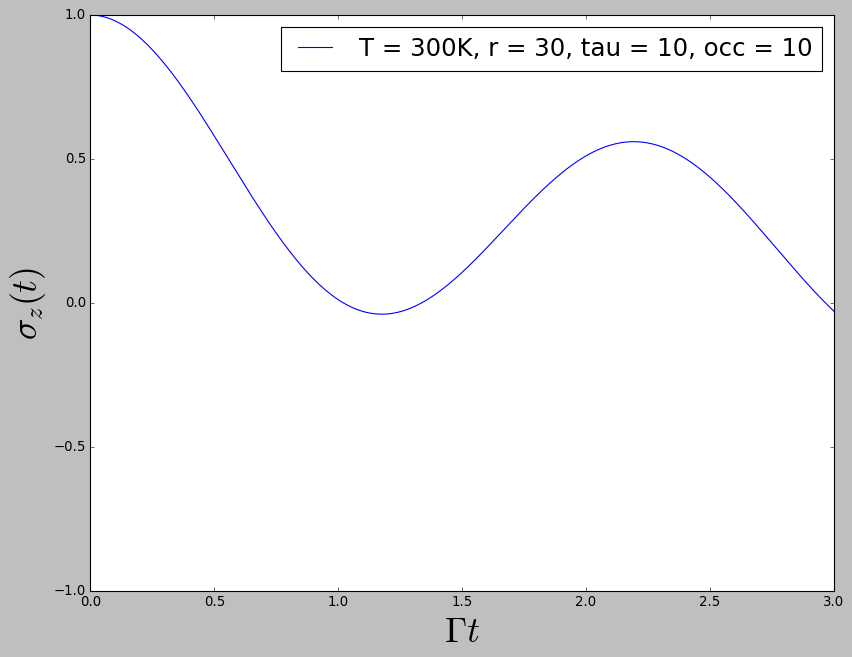

In [45]:
#Plot population difference 
sigma_z = np.zeros((TIME_STEPS))
for i in range(TIME_STEPS):
    sigma_z[i] = U[i][0][0].real - U[i][3][0].real

plt.figure(figsize = (12,9))
plt.xlim(0.,FINAL_TIME)    
plt.ylim(-1.,1.)             
plt.xlabel(r'$\Gamma t$', fontsize = 32)
plt.ylabel(r'$\sigma_z(t)$', fontsize = 32)
plt.plot(t, sigma_z, label='T = 300K, r = 30, tau = 10, occ = 10')
plt.legend(fontsize = 22)                     

These are the results for U elements with the last two digits 00, which correspond to wavepacket dynamics that initiate at spin-up state. Next, initial states that correspond to spin-down state as well as states used to prepare coherent elements of U are constructed, and population and coherence is calculated in a manner analogus to the above calculation for spin-up initial state. 

### **1.2.7  Propagation Starting in the Acceptor/Spin-Down State**

This subsection propagates with the initial state in spin-down.

It takes about 22 minutes to finish for 2000 time steps and $N_n = 60$.

In [46]:
tt_psi0 = tt_sd
for k in range(2 * DOF_N):#double space formation
    tt_psi0 = tt.kron(tt_psi0, tt_gs)
y0 = tt_psi0#initial wavepacket
#Add noise, for higher rank KSL propagation
radd = np.array([1,9])#the rank of the first bath mode core is capped by occ
radd = np.append(radd, np.repeat(9, DOF_N * 2-3))
radd = np.append(radd, np.array([9,1]))#and the last core
tt_rand = tt.rand(occ, DOF_N * 2, radd)#random TT array with desired size and rank
tt_rand = tt_rand * tt_rand.norm()**(-1) #Renormalize noise
tt_rand = tt.kron(tt.ones(2,1), tt_rand)#Append electronic site
y0 = y0 + tt_rand*1e-10 #Ensure noise is small

#Propagation loop
START_TIME = timeModule.time()
for ii in range(TIME_STEPS):
    with suppress_stdout_stderr():
        y0 = tt.ksl.ksl(A, y0, tau)
    #print(t[ii])
    U[ii][0][3] = np.abs(tt.dot(tt_heavu * y0, tt_heavu * y0))
    U[ii][3][3] = np.abs(tt.dot(tt_heavd * y0, tt_heavd * y0))
    U[ii][2][3] = tt.dot(tt.matvec(tt_ul,y0), tt.matvec(tt_ur,y0))
    U[ii][1][3] = tt.dot(tt.matvec(tt_ur,y0), tt.matvec(tt_ul,y0))

print("\tPropagation time:", printTime(timeModule.time() - START_TIME))

	Propagation time: 27.861 minutes


### **1.2.8  Propagation Starting in the $|\psi_1\rangle = \dfrac{1}{\sqrt{2}}\Big(|0\rangle + |1\rangle\Big)$ State**

This subsection propagates with the initial state in $|\psi_1\rangle$, the first state for preparing coherent elements in ${\cal U}(\tau)$.

It takes about 30 minutes to finish for 2000 time steps and $N_n = 60$.

In [47]:
tt_psi0 = tt_e1
for k in range(2 * DOF_N): # double space formation
    tt_psi0 = tt.kron(tt_psi0,tt_gs)
y0 = tt_psi0 # initial wavepacket
# Add noise, for higher rank KSL propagation
radd = np.array([1,9]) # the rank of the first bath mode core is capped by occ
radd = np.append(radd, np.repeat(9, DOF_N * 2 - 3))
radd = np.append(radd, np.array([9,1])) # and the last core
tt_rand = tt.rand(occ, DOF_N * 2, radd) # random TT array with desired size and rank
tt_rand = tt_rand * tt_rand.norm()**(-1) # Renormalize noise
tt_rand = tt.kron(tt.ones(2,1), tt_rand) # Append electronic site
y0 = y0 + tt_rand*1e-10 # Ensure noise is small

#Propagation loop
START_TIME = timeModule.time()
for ii in range(TIME_STEPS):
    with suppress_stdout_stderr():
        y0 = tt.ksl.ksl(A, y0, tau)
    #print(t[ii])
    U[ii][0][1] = np.abs(tt.dot(tt_heavu * y0, tt_heavu * y0))
    U[ii][3][1] = np.abs(tt.dot(tt_heavd * y0, tt_heavd * y0))
    U[ii][2][1] = tt.dot(tt.matvec(tt_ul, y0), tt.matvec(tt_ur, y0))
    U[ii][1][1] = tt.dot(tt.matvec(tt_ur, y0), tt.matvec(tt_ul, y0))

print("\tPropagation time:", printTime(timeModule.time() - START_TIME))

	Propagation time: 26.836 minutes


### **1.2.9 Propagation Starting in the $|\psi_2\rangle = \dfrac{1}{\sqrt{2}}\Big(|0\rangle + i|1\rangle\Big)$ State**

This subsection propagates with the initial state in $|\psi_2\rangle$, the first state for preparing coherent elements in ${\cal U}(\tau)$.

It takes about 30 minutes to finish for 2000 time steps and $N_n = 60$.

In [48]:
tt_psi0 = tt_e2
for k in range(2 * DOF_N): # double space formation
    tt_psi0 = tt.kron(tt_psi0, tt_gs)
y0 = tt_psi0 # initial wavepacket
# Add noise, for higher rank KSL propagation
radd = np.array([1,9]) # the rank of the first bath mode core is capped by occ
radd = np.append(radd,np.repeat(9, DOF_N * 2 - 3))
radd = np.append(radd,np.array([9,1])) # and the last core
tt_rand = tt.rand(occ, DOF_N * 2, radd) # random TT array with desired size and rank
tt_rand = tt_rand * tt_rand.norm()**(-1) # Renormalize noise
tt_rand = tt.kron(tt.ones(2,1),tt_rand) # Append electronic site
y0 = y0 + tt_rand * 1e-10 # Ensure noise is small

# Propagation loop
START_TIME = timeModule.time()
for ii in range(TIME_STEPS):
    with suppress_stdout_stderr():
        y0 = tt.ksl.ksl(A, y0, tau)
    #print(t[ii])
    U[ii][0][2] = np.abs(tt.dot(tt_heavu * y0, tt_heavu * y0))
    U[ii][3][2] = np.abs(tt.dot(tt_heavd * y0, tt_heavd * y0))
    U[ii][2][2] = tt.dot(tt.matvec(tt_ul, y0), tt.matvec(tt_ur, y0))
    U[ii][1][2] = tt.dot(tt.matvec(tt_ur, y0), tt.matvec(tt_ul, y0))
    
print("\tPropagation time:", printTime(timeModule.time() - START_TIME))

	Propagation time: 84.898 minutes


## **1.3 Calculating the Coherence Elements of ${\cal U}(\tau)$**

For elements that need to start in a coherence element, we need to use linear combinations. The four initial conditions we start with in TT-TFD are 

1. $|\psi_e^0(0)\rangle = |0_e\rangle$, represented in shorthand with 00,
2. $|\psi_e^3(0)\rangle = |1_e\rangle$, represented in shorthand with 11,
3. $|\psi_e^1(0)\rangle = \dfrac{1}{\sqrt{2}}\Big(|0_e\rangle + |1_e\rangle\Big)$, represented in shorthand with e1, and

4. $|\psi_e^2(0)\rangle = \dfrac{1}{\sqrt{2}}\Big(|0_e\rangle + i|1_e\rangle\Big)$, represented in shorthand with e2.

In density matrix form, these are 
1. $|\psi_e^0(0)\rangle\langle \psi_e^0(0)| = \left(\begin{array}{cc} 1 & 0 \\ 0 & 0 \end{array}\right)$, 

2. $|\psi_e^3(0)\rangle\langle\psi_e^3(0)| = \left(\begin{array}{cc} 0 & 0 \\ 0 & 1 \end{array}\right)$, 

3. $|\psi_e^1(0)\rangle\langle\psi_e^1(0)| = \left(\begin{array}{cc} \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} \end{array}\right)$ , and 

4. $|\psi_e^2(0)\rangle\langle\psi_e^2(0)| = \left(\begin{array}{cc} \frac{1}{2} & -\frac{i}{2} \\ \frac{i}{2} & \frac{1}{2} \end{array}\right)$ .
<br><br>
The linear combinations to start in a coherence are:
<br><br>
$$\left(\begin{array}{cc} 0 & 1 \\ 0 & 0\end{array}\right) = \left(\begin{array}{cc} \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & \frac{1}{2}\end{array}\right) + i \left(\begin{array}{cc} \frac{1}{2} & \frac{-i}{2} \\ \frac{i}{2} & \frac{1}{2}\end{array}\right) - \frac{1}{2}(1 + i) \left[\left(\begin{array}{cc} 1 & 0 \\ 0 & 0\end{array}\right) + \left(\begin{array}{cc} 0 & 0 \\ 0 & 1\end{array}\right)\right]$$
<br>
$$\left(\begin{array}{cc} 0 & 0 \\ 1 & 0\end{array}\right) = \left(\begin{array}{cc} \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & \frac{1}{2}\end{array}\right) - i \left(\begin{array}{cc} \frac{1}{2} & \frac{-i}{2} \\ \frac{i}{2} & \frac{1}{2}\end{array}\right) - \frac{1}{2}(1 - i) \left[\left(\begin{array}{cc} 1 & 0 \\ 0 & 0\end{array}\right) + \left(\begin{array}{cc} 0 & 0 \\ 0 & 1\end{array}\right)\right]$$

Previously, we stored a 3D U matrix with time in the first dimension, the four final states (00, 01, 10, 11) in the second dimension, and the four initial states (00, e1, e2, 11) in the third dimension. So we need to use the linear combinations above to calculate the four final states (00, 01, 10, 11) when the initial state should be 01 or 10.  

In [49]:
# when the initial state is 00 or 11, the final U is the same as the one 
# directly calculated from TT-TFD
for j in range(DOF_E_SQ):
    for i in range(TIME_STEPS):
        U_final[i][j][0] = U[i][j][0]
        U_final[i][j][3] = U[i][j][3]

# loops to calculate the coherence elements
for j in range(DOF_E_SQ):
    for cc in range(DOF_E):
        for dd in range(cc + 1, DOF_E):
            # creates the matching vector index from c and d
            k = DOF_E * cc + dd
            # creates the matching vector index from d and c
            oppositeIndex = DOF_E * dd + cc
            # creates the matching vector index from c and c
            DDIndex = DOF_E * cc + cc
            # creates the matching vector index from d and d
            AAIndex = DOF_E * dd + dd
                
            for i in range(TIME_STEPS):
                # calculates abcd = abcd_e1 + i * abdc_e2
                #                         - 1/2 * (1 + i) * (abcc + abdd)
                U_final[i][j][k] = U[i][j][k] + 1.j * U[i][j][oppositeIndex]
                U_final[i][j][k] -= 0.5 * (1. + 1.j) * (U[i][j][DDIndex] + U[i][j][AAIndex])
                
                # calculates abdc = abcd_e1 - i * abdc_e2
                #                         - 1/2 * (1 - i) * (abcc + abdd)
                U_final[i][j][oppositeIndex] = U[i][j][k] - 1.j * U[i][j][oppositeIndex]
                U_final[i][j][oppositeIndex] -= 0.5 * (1. - 1.j) * (U[i][j][DDIndex] + U[i][j][AAIndex])

## **1.4 Printing ${\cal U}(\tau)$ Matrix to Files**

This section prints files with three tab-separated columns: the time, the real part, and the imaginary part for each element of ${\cal U}(\tau)$ into the folder `U_Output`.

In [50]:
PARAM_STR = "_Spin-Boson_Ohmic_TT-TFD_b%sG%s_e%s_t%.8f_"%(BETA, GAMMA_DA, EPSILON, DT)
PARAM_STR += "xi%swc%s_wmax%s_dofn%s_tf%.4f"%(XI, OMEGA_C, OMEGA_MAX, DOF_N, FINAL_TIME)

for j in range(DOF_E_SQ):
    a = str(int(j/DOF_E))
    b = str(int(j%DOF_E))
    for k in range(DOF_E_SQ):
        c = str(int(k/DOF_E))
        d = str(int(k%DOF_E))

        # outfile for the U
        outfileStr = "U_Output/U_" + a + b + c + d + PARAM_STR + ".txt"

        f = open(outfileStr, "w")

        for i in range(TIME_STEPS):
            f.write("%s\t%s\t%s\n"%(float(t[i]), U_final[i][j][k].real, U_final[i][j][k].imag))
        f.close()

## **1.5 Graphing ${\cal U}(\tau)$ from Files**

$\quad$ This subsection graphs the elements of ${\cal U}(\tau)$ in a $4 \times 4$ grid using the function in Sec. IV.ii, with the values pulled from files using the constants specified in Sec. 1.1. This allows you to graph ${\cal U}(\tau)$ without having to run Secs. 1.2 - 2.4 directly beforehand. The graphs are then stored in the `Figures/U_Graphs` folder.

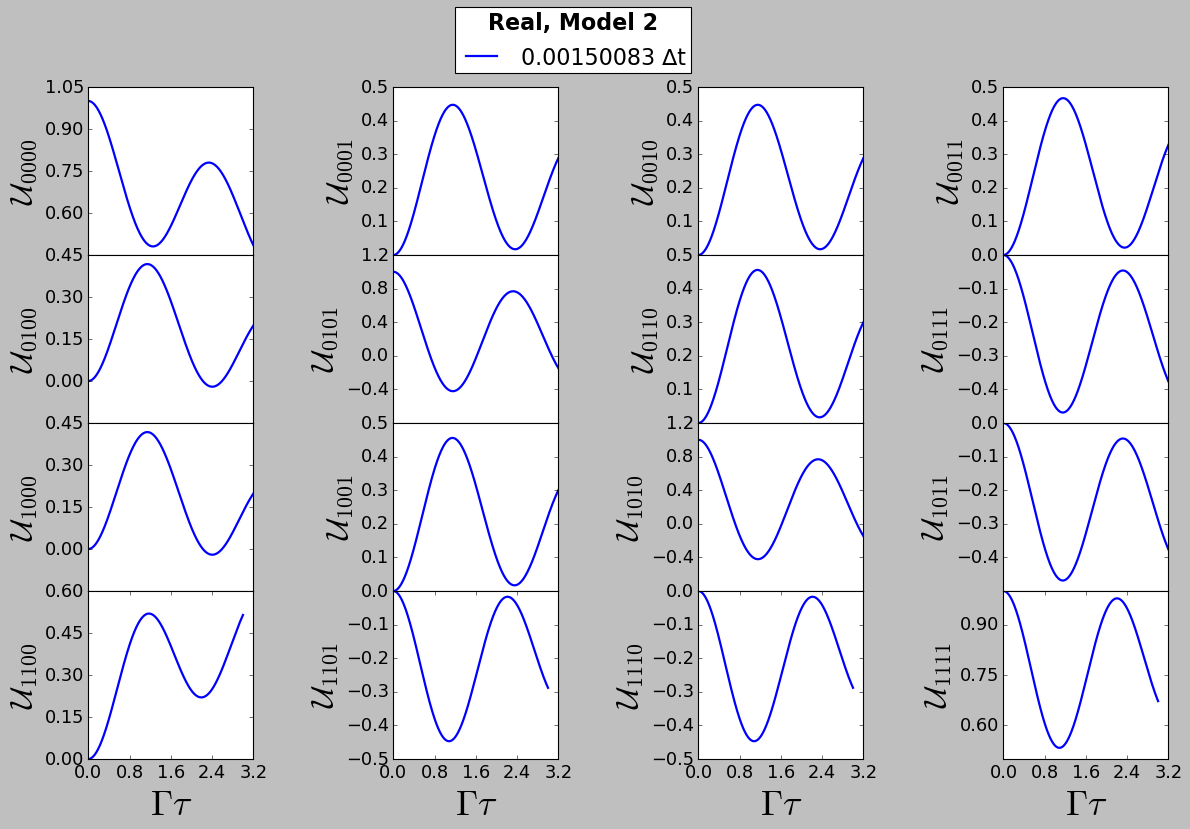

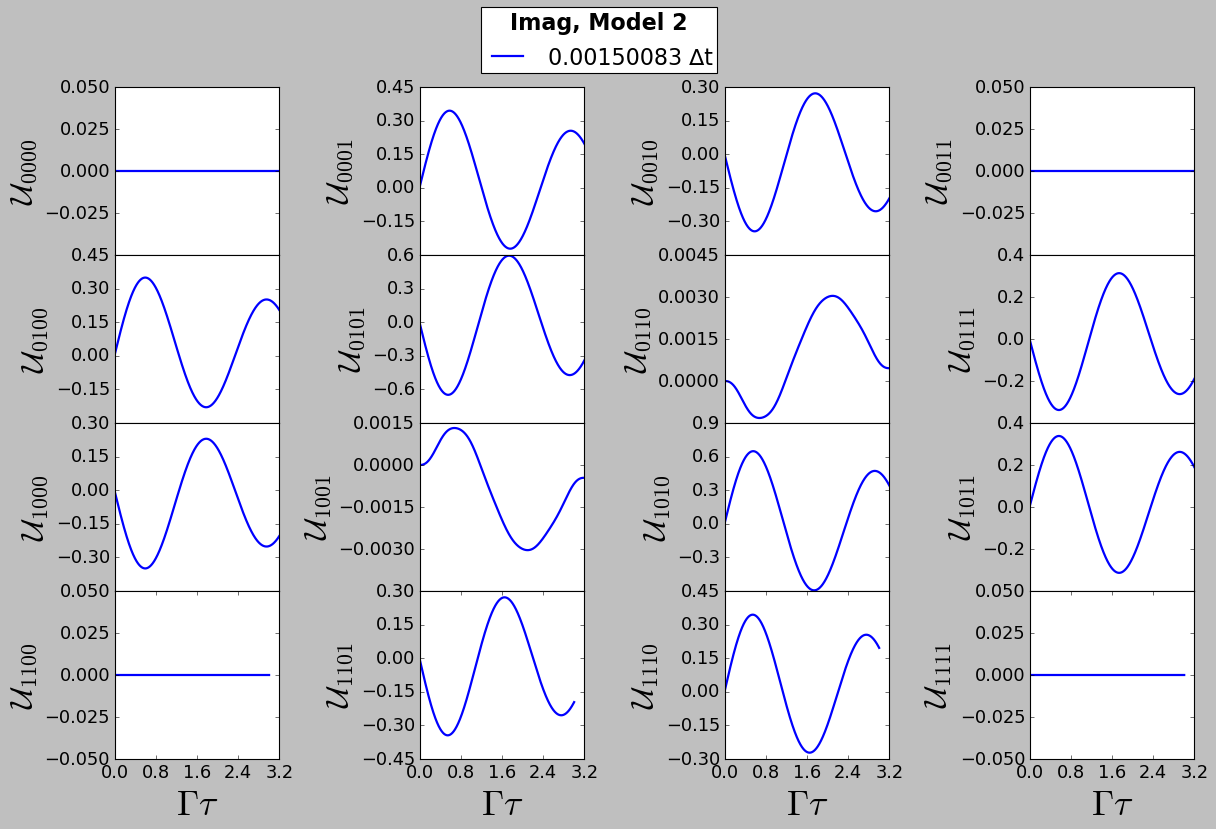

In [59]:
timeSteps = TIME_STEPS
graphStr = "%.8f ∆t"%DT

UTimeDict_file = {}
UDict_file = {}

U_file = np.zeros((timeSteps, DOF_E_SQ, DOF_E_SQ), dtype=np.complex_)
time_file = np.zeros((timeSteps))

PARAM_STR = "_Spin-Boson_Ohmic_TT-TFD_b%sG%s_e%s_"%(BETA, GAMMA_DA, EPSILON)
PARAM_STR += "t%.8f_xi%swc%s_"%(DT, XI, OMEGA_C)
PARAM_STR += "wmax%s_dofn%s_tf%.4f"%(OMEGA_MAX, DOF_N, FINAL_TIME)

for j in range(DOF_E_SQ):
    a = int(j/DOF_E)
    b = int(j%DOF_E)
    for k in range(DOF_E_SQ):
        c = int(k/DOF_E)
        d = int(k%DOF_E)

        t, Ureal, Uimag = np.hsplit(
            np.loadtxt("U_Output/U_%s%s%s%s"%(a,b,c,d) + PARAM_STR
                        + ".txt"), 3)

        for l in range(timeSteps):
            time_file[l] = t[l]
            U_file[l][j][k] = Ureal[l] + 1.j * Uimag[l]
    
UTimeDict_file.update({"%s"%graphStr : time_file})
UDict_file.update({"%s"%graphStr : U_file})

legendPos_x = 0.8
legendPos_y = 1.
graph4x4("Real", MODEL_NUM, legendPos_x, legendPos_y, "U", graphStr, 
         UTimeDict_file, UDict_file)
graph4x4("Imag", MODEL_NUM, legendPos_x, legendPos_y, "U", graphStr, 
         UTimeDict_file, UDict_file)

# **2. Calculating the Projection-Free Inputs ${\cal F}(\tau)$ and $\dot{\cal F}(\tau)$**

$\quad$ As stated in Eqs. (12) and (13) [copied below], the projection-free inputs are related to numerical derivatives of the time evolution superoperator ${\cal U}(\tau)$:
$$F_{jk,lm}(\tau) = i\dot{\cal U}_{jk,lm}(\tau), \tag{12}$$
$$\dot{F}_{jk,lm}(\tau) = i\ddot{\cal U}_{jk,lm}(\tau). \tag{13}$$

$\quad$ In this section, we calculate the numerical derivatives for ${\cal F}(\tau)$ and $\dot{\cal F}(\tau)$ using the 2nd-order central difference method from [NumPy](https://numpy.org/doc/stable/reference/generated/numpy.gradient.html). This method calculates first ${\cal F}(\tau)$ as $i\dot{\cal U}_{jk,lm}(\tau)$ using the 2nd-order central difference method in the NumPy library. Then, $\dot{\cal F}(\tau)$ is calculated as $\dfrac{d}{d\tau} {\cal F}(\tau)$ using the same the 2nd-order central difference method.


## **2.1 Constants and Global Variables**##

In [60]:
### general constants ###
TIME_STEPS = 2000 # number of time steps
tau = 5           # propagation time step
au2ps = 0.00002418884254 # Conversion of attoseconds to atomic units
timeau = 12.409275
DT = tau * au2ps * timeau # time step in au
FINAL_TIME = TIME_STEPS * DT # final time
DOF_E = 2 # number of electronic states
DOF_E_SQ = DOF_E * DOF_E
DOF_N = 60 # number of nuclear DOF

### constants related to the model number ###
MODEL_NUM = 2 # model number

# setting parameters that based on the model number
BETA = 5 # inverse finite temperature
GAMMA_DA = 1 # diabatic coupling
if MODEL_NUM == 1:
    EPSILON = 1    # half of the energy gap between the donor and acceptor
    XI = 0.1       # friction coefficient, determines strength of e-n coupling 
    OMEGA_C = 1    # cutoff frequency of the nuclear DOF
    OMEGA_MAX = 5  # maximum frequency of the nuclear DOF
elif MODEL_NUM == 2:
    EPSILON = 1
    XI = 0.1
    OMEGA_C = 2
    OMEGA_MAX = 10 
elif MODEL_NUM == 3:
    EPSILON = 1
    XI = 0.1
    OMEGA_C = 7.5
    OMEGA_MAX = 36
elif MODEL_NUM == 4:
    EPSILON = 1
    XI = 0.4
    OMEGA_C = 2
    OMEGA_MAX = 10
elif MODEL_NUM == 6:
    EPSILON = 0
    XI = 0.2
    OMEGA_C = 2.5
    OMEGA_MAX = 12

### parameter string for file input/output ###
PARAM_STR = "_Spin-Boson_Ohmic_TT-TFD_b%sG%s_e%s_t%.8f_"%(BETA, GAMMA_DA, EPSILON, DT)
PARAM_STR += "xi%swc%s_wmax%s_dofn%s_tf%.4f"%(XI, OMEGA_C, OMEGA_MAX, DOF_N, FINAL_TIME)

### variables ###
time = np.zeros((TIME_STEPS))
U = np.zeros((TIME_STEPS, DOF_E_SQ, DOF_E_SQ), dtype=np.complex_)
F = np.zeros((TIME_STEPS, DOF_E_SQ, DOF_E_SQ), dtype=np.complex_)
Fdot = np.zeros((TIME_STEPS, DOF_E_SQ, DOF_E_SQ), dtype=np.complex_)

### printing parameters ###
print("     time steps =", TIME_STEPS)
print("             DT =", DT)
print("     final time =", FINAL_TIME)
print("        model # =", MODEL_NUM)
print("          DOF_E =", DOF_E)
print("          DOF_N =", DOF_N)
print("           beta =", BETA)
print("       gamma_da =", GAMMA_DA)
print("        epsilon =", EPSILON)
print("             xi =", XI)
print("        omega_c =", OMEGA_C)
print("      omega_max =", OMEGA_MAX)
print("   param string =", PARAM_STR)

     time steps = 2000
             DT = 0.0015008299950527925
     final time = 3.001659990105585
        model # = 2
          DOF_E = 2
          DOF_N = 60
           beta = 5
       gamma_da = 1
        epsilon = 1
             xi = 0.1
        omega_c = 2
      omega_max = 10
   param string = _Spin-Boson_Ohmic_TT-TFD_b5G1_e1_t0.00150083_xi0.1wc2_wmax10_dofn60_tf3.0017


## **2.2 Calling Time and ${\cal U}(\tau)$ Values From Files**

$\quad$ This subsection will pull in the values of time and the time evolution superoperator ${\cal U}(\tau)$ from files generated by the previous section. 

In [61]:
for j in range(DOF_E_SQ):
    a = str(int(j/DOF_E))
    b = str(int(j%DOF_E))
    for k in range(DOF_E_SQ):
        c = str(int(k/DOF_E))
        d = str(int(k%DOF_E))

        # opens and reads the U file
        t, Ureal, Uimag = np.hsplit(
            np.loadtxt("U_Output/U_%s%s%s%s"%(a,b,c,d) + PARAM_STR 
                           + ".txt"), 3)

        # stores values in variables and combines real and imag parts of U
        for i in range(TIME_STEPS):
            time[i] = t[i]
            U[i][j][k] = Ureal[i] + 1.j * Uimag[i]

## **2.3 Function to Print ${\cal F}(\tau)$ and $\dot{\cal F}(\tau)$**

$\quad$ This function prints files with three tab-separated columns: the time, the real part, and the imaginary part for each element of ${\cal F}(\tau)$ and $\dot{\cal F}(\tau)$ into the folder `ProjFree_Output`.

In [62]:
def printFFdot(abcdStr, timeFFdot, Freal, Fimag, Fdotreal, Fdotimag):

    # outfileStr for F
    outfileFStr = "ProjFree_Output/F_" + abcdStr + PARAM_STR + ".txt"
    
    # opens and writes F values to file
    f = open(outfileFStr, "w")
    for i in range(len(Freal)):
        f.write("%s\t%s\t%s\n"%(timeFFdot[i], Freal[i], Fimag[i]))
    f.close()
    
    # outfileStr for Fdot
    outfileFdotStr = "ProjFree_Output/Fdot_" + abcdStr + PARAM_STR + ".txt"
                
    # opens and writes Fdot values to file
    f = open(outfileFdotStr, "w")
    for i in range(len(Fdotreal)):
        f.write("%s\t%s\t%s\n"%(timeFFdot[i], Fdotreal[i], Fdotimag[i]))
    f.close()

## **2.4 2nd-Order Central Difference**

$\quad$ This section calculates first ${\cal F}(\tau)$ from $i\dot{\cal U}_{jk,lm}(\tau)$ using the 2nd-order central difference method in the numpy library. Then, $\dot{\cal F}(\tau)$ is calculated from $\dfrac{d}{d\tau} {\cal F}(\tau)$ using the same the second-order central difference method.

$\quad$ In the second-order central difference method,
$$f'(x_n) = \frac{1}{2} f(x_{n + 1}) - \frac{1}{2} f(x_{n - 1}).$$

In [63]:
for j in range(DOF_E_SQ):
    a = str(int(j/DOF_E)) # a index of PFI_{abcd}
    b = str(int(j%DOF_E)) # b index of PFI_{abcd}
    for k in range(DOF_E_SQ):
        c = str(int(k/DOF_E)) # c index of PFI_{abcd}
        d = str(int(k%DOF_E)) # d index of PFI_{abcd}
            
        # extracts real and imag parts of U element
        Ureal = np.zeros((TIME_STEPS))
        Uimag = np.zeros((TIME_STEPS))
        for i in range(TIME_STEPS):
            Ureal[i] = U[i][j][k].real
            Uimag[i] = U[i][j][k].imag
        
        # F = i * d/dt U so Re[F] = -1 * d/dt Im[U] and Im[F] = d/dt Re[U]        
        Freal = -1. * np.gradient(Uimag.flatten(), DT, edge_order = 2)
        Fimag = np.gradient(Ureal.flatten(), DT, edge_order = 2)
                
        # Fdot = d/dt F so Re[Fdot] = d/dt Re[F] and Im[Fdot] = d/dt Im[F]
        Fdotreal = np.gradient(Freal, DT)
        Fdotimag = np.gradient(Fimag, DT)

        # creates string of indices for the PFIs        
        abcdStr = a + b + c + d

        # prints F and Fdot to files; function in Sec. 2.3
        printFFdot(abcdStr, time, Freal, Fimag, Fdotreal, Fdotimag)

## **2.5 Function to Pull in ${\cal F}(\tau)$ or $\dot{\cal F}(\tau)$ from Files**

$\quad$ This function pulls in ${\cal F}(\tau)$ or $\dot{\cal F}(\tau)$ from files, so they can be graphed without having to re-run the previous subsections.

In [64]:
def buildFFdotDict(FFdotStr, dt, timeSteps, timeDict, quantityDict):
    
    quantity = np.zeros((timeSteps, DOF_E_SQ, DOF_E_SQ), dtype=np.complex_)
    time = np.zeros((timeSteps))
    for j in range(DOF_E_SQ):
        a = str(int(j/DOF_E))
        b = str(int(j%DOF_E))
        for k in range(DOF_E_SQ):
            c = str(int(k/DOF_E))
            d = str(int(k%DOF_E))

            t, quantityReal, quantityImag = np.hsplit(
                np.loadtxt("ProjFree_Output/" + FFdotStr 
                           + "_%s%s%s%s"%(a,b,c,d) + PARAM_STR + ".txt"), 3)

            for i in range(timeSteps):
                time[i] = t[i]
                quantity[i][j][k] = quantityReal[i] + 1.j * quantityImag[i]
                
    timeDict.update({"%.8f ∆t"%dt : time})
    quantityDict.update({"%.8f ∆t"%dt : quantity})


## **2.6 Graphing ${\cal F}(\tau)$ for Each Method**

$\quad$ This subsection graphs ${\cal F}(\tau)$ in a $4 \times 4$ grid using the function in Sec. IV.ii, with the values pulled from files using the function in Sec. 2.5 and the constants specified in Sec. 2.1. This allows you to graph ${\cal F}(\tau)$ without having to run Secs. 2.2 - 2.4 directly beforehand. The graphs are then stored in the `Figures/F_Graphs` folder.

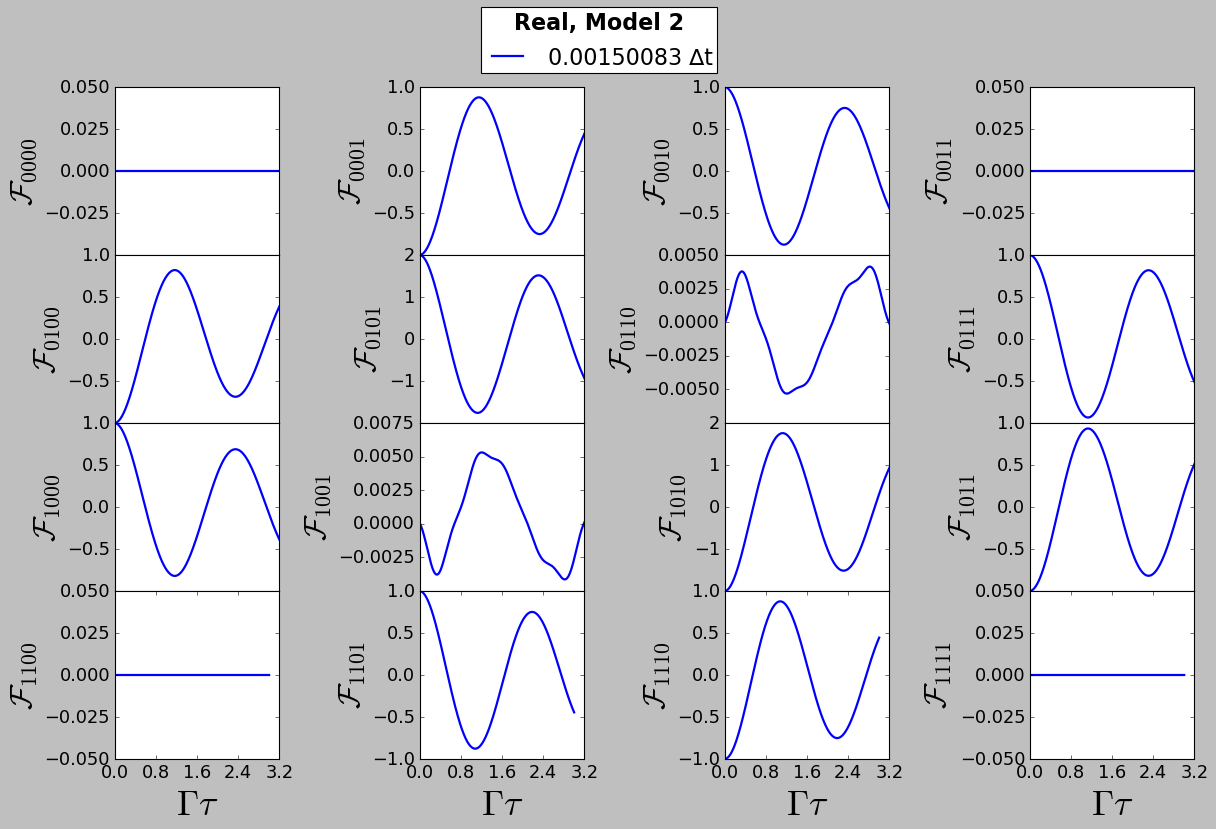

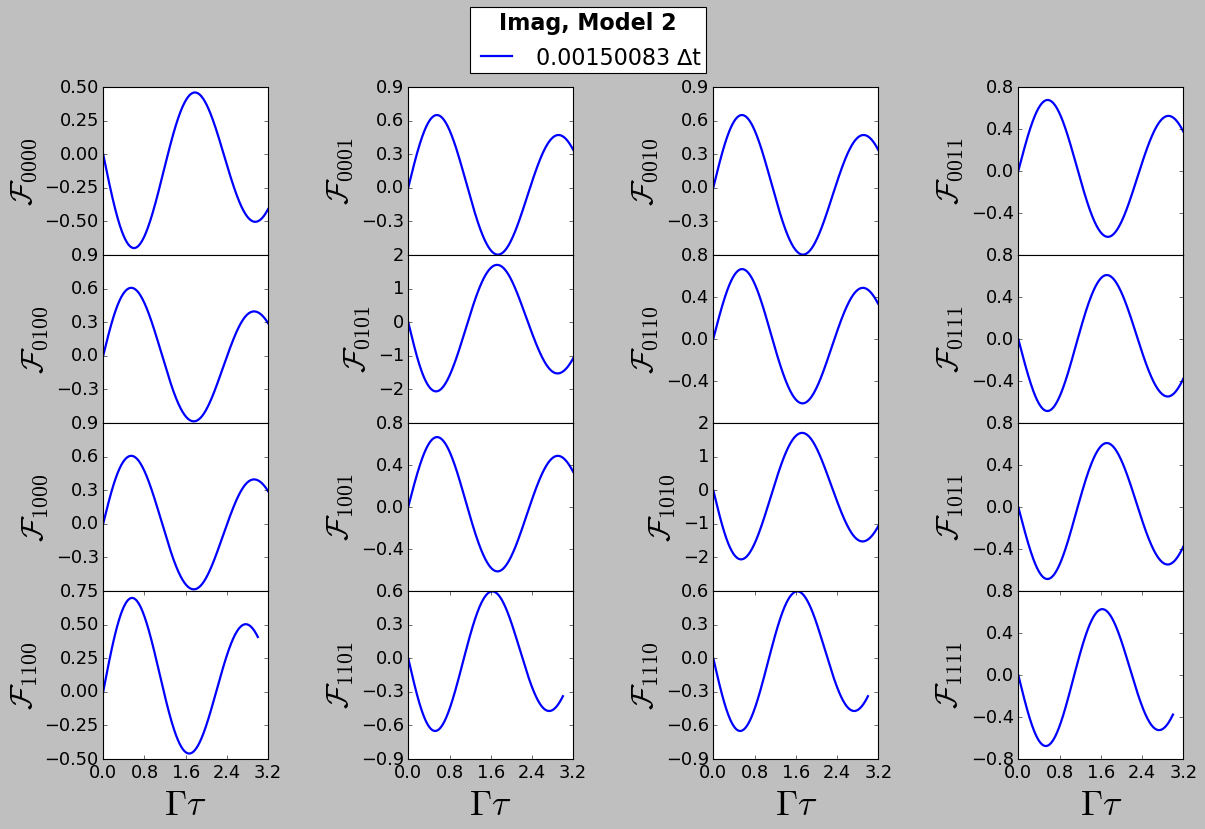

In [65]:
timeSteps = TIME_STEPS
F_TimeDict = {}
F_Dict = {}

buildFFdotDict("F", DT, timeSteps, F_TimeDict, F_Dict)

graphStr = "%.8f ∆t"%DT
legendPos_x = 0.8
legendPos_y = 1.
graph4x4("Real", MODEL_NUM, legendPos_x, legendPos_y, "F", graphStr, F_TimeDict, 
         F_Dict)
graph4x4("Imag", MODEL_NUM, legendPos_x, legendPos_y, "F", graphStr, F_TimeDict, 
         F_Dict)


## **2.7 Graphing $\dot{\cal F}(\tau)$ for Each Method**

$\quad$ This subsection graphs $\dot{\cal F}(\tau)$ in a $4 \times 4$ grid using the function in Sec. IV.ii, with the values pulled from files using the function in Sec. 2.5 and the constants specified in Sec. 2.1. This allows you to graph $\dot{\cal F}(\tau)$ without having to run Secs. 2.2 - 2.4 directly beforehand. The graphs are then stored in the `Figures/Fdot_Graphs` folder.

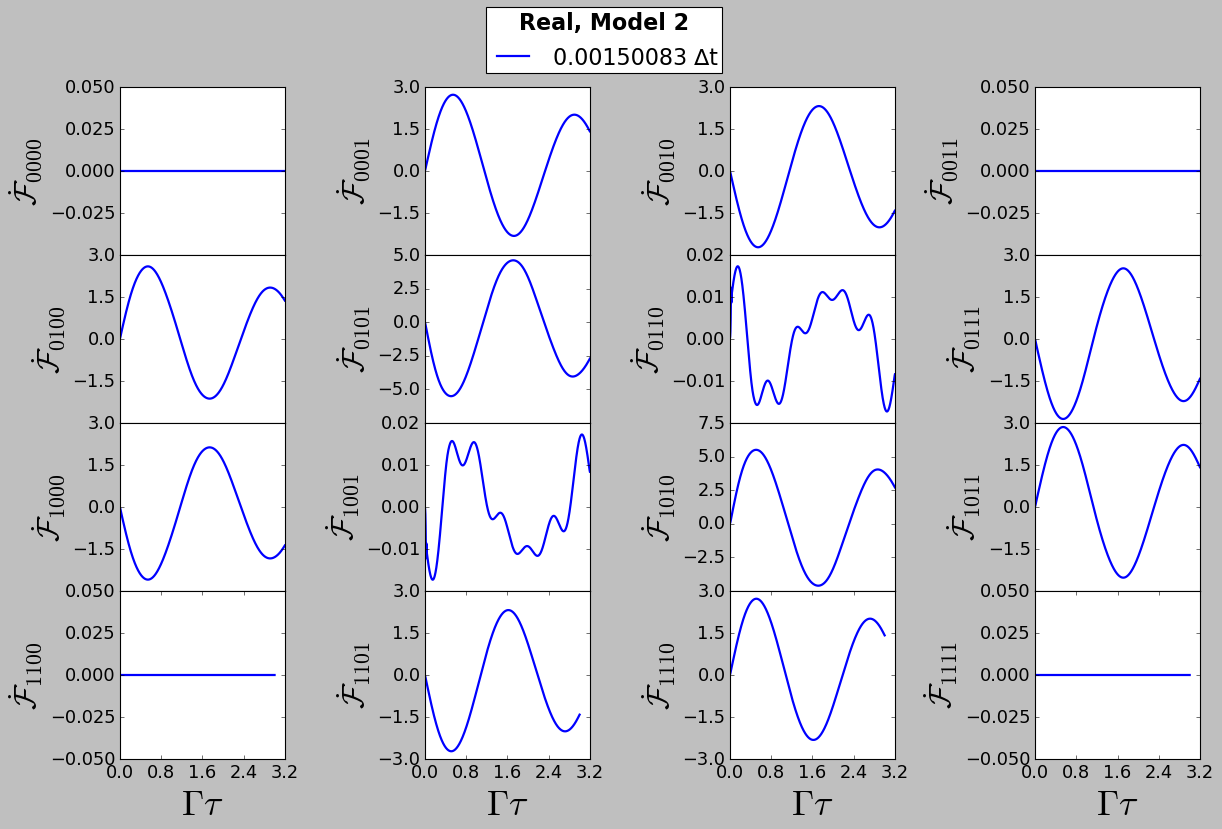

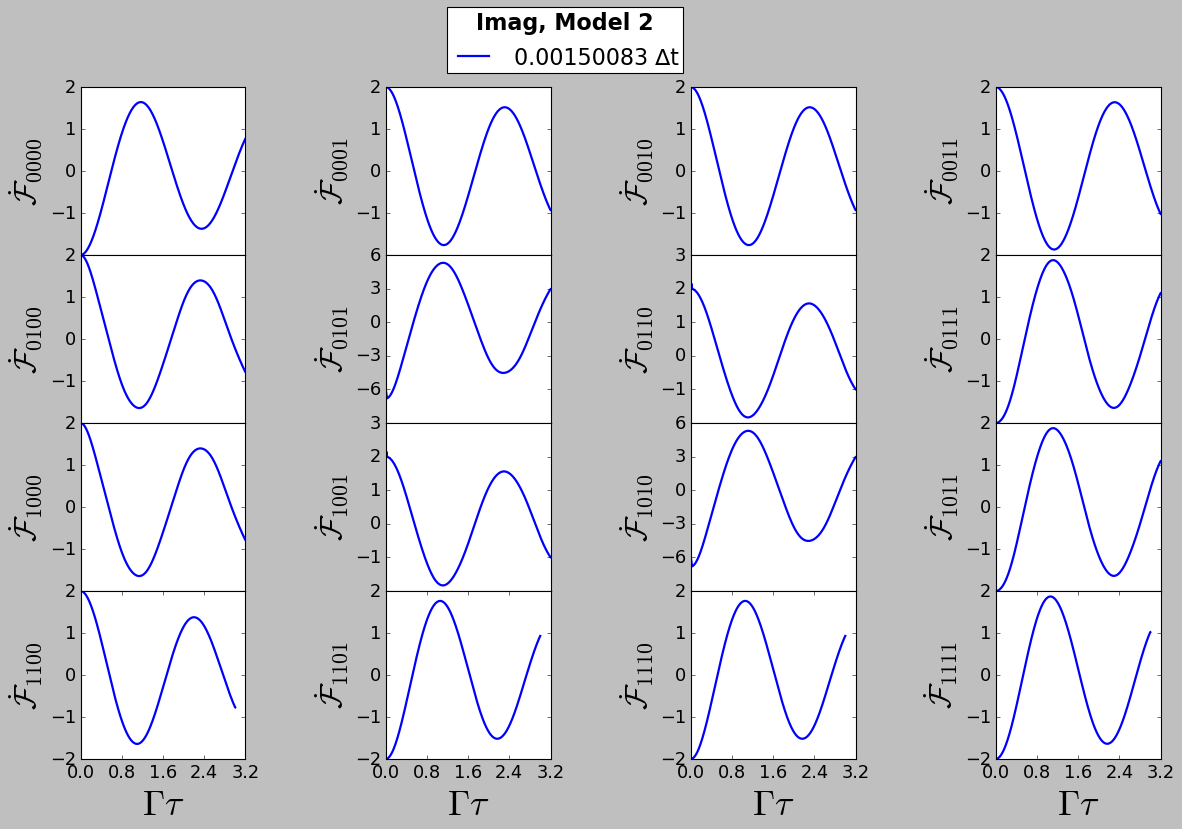

In [66]:
timeSteps = TIME_STEPS
Fdot_TimeDict = {}
Fdot_Dict = {}

buildFFdotDict("Fdot", DT, timeSteps, Fdot_TimeDict, Fdot_Dict)

graphStr = "%.8f ∆t"%DT
legendPos_x = 0.8
legendPos_y = 1.
graph4x4("Real", MODEL_NUM, legendPos_x, legendPos_y, "Fdot", graphStr, 
         Fdot_TimeDict, Fdot_Dict)
graph4x4("Imag", MODEL_NUM, legendPos_x, legendPos_y, "Fdot", graphStr, 
         Fdot_TimeDict, Fdot_Dict)

# **3. Calculating the Memory Kernel**

$\quad$ The Volterra equation for the memory kernel is given by Eq. (6), copied below

$${\cal K}_{jk,lm}^{\text{sub}}(\tau) = i\dot{\cal F}_{jk,lm}(\tau) - \frac{1}{\hbar} \sum_{uv\,\in\{ab\}} {\cal F}_{jk,uv}(\tau) \langle{\cal L}_{uv,lm}\rangle_n^0 \qquad\quad~
\\ \qquad\quad+ i \sum_{uv\,\in\{ab\}} \int_0^\tau d\tau' {\cal F}_{jk,uv}(\tau - \tau') {\cal K}_{uv,lm}^{\text{sub}}(\tau').$$

$\quad$ In the following subsections, we will calculate the memory kernel using an iterative algorithm with ${\cal F}(\tau)$ and $\dot{\cal F}(\tau)$ as inputs.

$\quad$ The calculation of the memory kernel of each subset of interest is independent of calculating any other memory kernel, so in practice when we have multiple subsets of interest, their memory kernels are calculated in parallel. 

## **3.1 Constants and Global Variables**

$\quad$ This subsection defines the constants and global variables used within the memory kernel calculation. 

In [150]:
### general constants ###
TIME_STEPS = 2000 # number of time steps
tau = 5              # propagation time step
au2ps = 0.00002418884254 # Conversion of attoseconds to atomic units
timeau = 12.409275
DT = tau * au2ps * timeau # time step in au
FINAL_TIME = TIME_STEPS * DT # final time
DOF_E = 2 # number of electronic states
DOF_E_SQ = DOF_E * DOF_E
DOF_N = 60 # number of nuclear DOF
HBAR = 1

MODEL_NUM = 2 # model number

### setting parameters that based on the model number ###
BETA = 5 # # inverse finite temperature
GAMMA_DA = 1 # diabatic coupling
if MODEL_NUM == 1:
    EPSILON = 1    # half of the energy gap between the donor and acceptor
    XI = 0.1       # friction coefficient, determines strength of e-n coupling 
    OMEGA_C = 1    # cutoff frequency of the nuclear DOF
    OMEGA_MAX = 5  # maximum frequency of the nuclear DOF
elif MODEL_NUM == 2:
    EPSILON = 1
    XI = 0.1
    OMEGA_C = 2
    OMEGA_MAX = 10 
elif MODEL_NUM == 3:
    EPSILON = 1
    XI = 0.1
    OMEGA_C = 7.5
    OMEGA_MAX = 36
elif MODEL_NUM == 4:
    EPSILON = 1
    XI = 0.4
    OMEGA_C = 2
    OMEGA_MAX = 10
elif MODEL_NUM == 6:
    EPSILON = 0
    XI = 0.2
    OMEGA_C = 2.5
    OMEGA_MAX = 12

### specific constants to the memory kernel code ###
INTEGRAL_STEP_K = (TIME_STEPS * DT - DT)/(TIME_STEPS - 1)
# size of slice in integral, often written h = (x_b - x_a)/N
# [[Note: N = TIME_STEPS - 1 because there are TIME_STEPS - 1 slices, since 
#   TIME_STEPS includes a count for t = 0]]
MAX_ITERS = 30 # maximum number of iterations for K
CONVERGENCE_PARAM = 10.**(-10.) # convergence parameter for volterra iterations

### setting parameter string ###
PARAM_STR = "_Spin-Boson_Ohmic_TT-TFD_b%sG%s_e%s_t%.8f_"%(BETA, GAMMA_DA, EPSILON, DT)
PARAM_STR += "xi%swc%s_wmax%s_dofn%s_tf%.4f"%(XI, OMEGA_C, OMEGA_MAX, DOF_N, FINAL_TIME)

### print statements ###
print("     time steps =", TIME_STEPS)
print("             DT =", DT)
print("     final time =", FINAL_TIME)
print("        model # =", MODEL_NUM)
print("          DOF_E =", DOF_E)
print("          DOF_N =", DOF_N)
print("           beta =", BETA)
print("       gamma_da =", GAMMA_DA)
print("        epsilon =", EPSILON)
print("             xi =", XI)
print("        omega_c =", OMEGA_C)
print("      omega_max =", OMEGA_MAX)
print("   param string =", PARAM_STR)

     time steps = 2000
             DT = 0.0015008299950527925
     final time = 3.001659990105585
        model # = 2
          DOF_E = 2
          DOF_N = 60
           beta = 5
       gamma_da = 1
        epsilon = 1
             xi = 0.1
        omega_c = 2
      omega_max = 10
   param string = _Spin-Boson_Ohmic_TT-TFD_b5G1_e1_t0.00150083_xi0.1wc2_wmax10_dofn60_tf3.0017


### **3.1.2 Liouvillian Matrix**

$\quad$ This subsection defines $\langle{\cal L}\rangle_n^0 = \text{Tr}\big\{{\cal L}\hat\rho_n(0)\big\}$: the expectation value of the Liouvillian, ${\cal L}(\cdot) = [\hat H, \,\cdot\,]$, with respect to the initial states of the nuclear DOF, $\hat\rho_n(0)$. For the spin-boson model, $\langle{\cal L}\rangle_n^0$ is given by:

$$
\langle{\cal L}\rangle_n^0 = 
\left(
    \begin{array}{cccc} 
    0 & -\Gamma & \Gamma & 0
	\\[0.25em] -\Gamma & 2\epsilon& 0 & \Gamma
	\\[0.25em] \Gamma & 0 & -2\epsilon & -\Gamma
	\\[0.25em] 0 & \Gamma & - \Gamma & 0 
    \end{array}
\right).
$$

In [151]:
LN0 = np.zeros((DOF_E_SQ, DOF_E_SQ))
LN0[0][1] = LN0[1][0] = LN0[2][3] = LN0[3][2] = -GAMMA_DA
LN0[0][2] = LN0[2][0] = LN0[1][3] = LN0[3][1] = GAMMA_DA
LN0[1][1] = 2. * EPSILON
LN0[2][2] = -2. * EPSILON

print(r'Gamma_DA =', GAMMA_DA, '      epsilon =', EPSILON)
print('\n<L>_N^0 =')
pprint(LN0)

Gamma_DA = 1       epsilon = 1

<L>_N^0 =
array([[ 0., -1.,  1.,  0.],
       [-1.,  2.,  0.,  1.],
       [ 1.,  0., -2., -1.],
       [ 0.,  1., -1.,  0.]])


## **3.2 Variables Defining the Subset of Interest**

### **3.2.1 Constants**

$\quad$ This subsection defines the constants related to the GQME type being calculated. The types of GQMEs allowed are the full GQME (all electronic states); the populations-only GQME (only the populations); a single-state GQME, with the single state designated in this subsection; and a subset of states GQME, with the subset designated in this subsection. This is done within the array `STATES`, which should have the state(s) in the subset of interest. 

$\quad$ For subsets, the `STATES` array should have the order of states in the normal order; i.e., "00" should be listed before "01", which should be before "10", which should be before "11".

In [152]:
GQME_TYPE = "SingleState" # type of reduced (or full) GQME. 
# options: Full, PopulationsOnly, SingleState, SubsetStates
STATES = ["11"] # state(s) to be looking at for SingleState or SubsetStates
# It isn't necessary to set this for Full or PopulationsOnly, as the code is 
# designed to automatically create the STATES arrays for them
INITIAL_STATE = "00" # initial state 

### **3.2.2 Variables**

$\quad$ This subsection creates variables based on the GQME type defined in Sec. 3.2.1. The variables that need to be defined are the number of states in the subset of interest and an array of the indices in the subset of interest. 

In [153]:
# setting the number of states and array of states strings based on the 
# GQME_TYPE
states = [] # array of indices string(s) of state(s) within subset of interest
if GQME_TYPE == "Full":
    numStates = DOF_E_SQ # number of states in subset
    # automatically creates states array with all states (populations and coherences)
    for i in range(DOF_E):
        for j in range(DOF_E):
            statesStr = "%s%s"%(i,j)
            states.append(statesStr)
elif GQME_TYPE == "PopulationsOnly":
    numStates = DOF_E
    # automatically creates states array with all populations
    for i in range(DOF_E):
        statesStr = "%s%s"%(i,i)
        states.append(statesStr)
elif GQME_TYPE == "SubsetStates":
    numStates = len(STATES)
    states = STATES # pulls states array from STATES defined in Sec. 3.2.1
elif GQME_TYPE == "SingleState":
    numStates = len(STATES)
    states = STATES # pulls states array from STATES defined in Sec. 3.2.1
    if numStates != 1:
        print("ERROR: More than one state in STATES with GQME_TYPE = SingleState")
else:
    print("ERROR: GQME_TYPE not Full, PopulationsOnly, SubsetStates, or SingleState.")

### print statements ###
print("Calculating memory kernel of the", GQME_TYPE, "GQME")
if GQME_TYPE == "SubsetStates":
    printStr = "\tSubset of states is "
    for i in range(numStates):
        printStr += "%s, "%states[i]
    print(printStr)
elif GQME_TYPE == "SingleState":
    print("    State being calculated is", states[0])

Calculating memory kernel of the SingleState GQME
    State being calculated is 11


## **3.3 Read in Time Vector and Projection-Free Inputs ${\cal F}(\tau)$ and $\dot{\cal F}(\tau)$**

$\quad$ This subsection reads in the values of time and the projection-free inputs (PFIs) ${\cal F}(\tau)$ and $\dot{\cal F}(\tau)$ from files.

In [154]:
# variables
timeVec = np.zeros((TIME_STEPS))
F = np.zeros((TIME_STEPS, numStates, numStates), dtype=np.complex_)
Fdot = np.zeros((TIME_STEPS, numStates, numStates), dtype=np.complex_)

# loop to read in each element
for j in range(numStates):
    for k in range(numStates):
        # defining indices of PFI element from states array
        statesStr = states[j] + states[k]

        # reading in F
        t, Freal, Fimag = np.hsplit(
            np.loadtxt("ProjFree_Output/F_" + statesStr + PARAM_STR 
                           + ".txt"), 3)
        
        # reading in Fdot
        t, Fdotreal, Fdotimag = np.hsplit(
            np.loadtxt("ProjFree_Output/Fdot_" + statesStr + PARAM_STR 
                           + ".txt"), 3)

        # storing values to variables and combining real and imag parts of F and Fdot
        for i in range(TIME_STEPS):
            timeVec[i] = t[i]
            F[i][j][k] = Freal[i] + 1.j * Fimag[i]
            Fdot[i][j][k] = Fdotreal[i] + 1.j * Fdotimag[i]

## **3.4 Linear Term**

$\quad$ The Volterra equation for the memory kernel is given by Eq. (6), copied below

$${\cal K}_{jk,lm}^{\text{sub}}(\tau) = i\dot{\cal F}_{jk,lm}(\tau) - \frac{1}{\hbar} \sum_{uv\,\in\{ab\}} {\cal F}_{jk,uv}(\tau) \langle{\cal L}_{uv,lm}\rangle_n^0 \qquad\quad~
\\ \qquad\quad+ i \sum_{uv\,\in\{ab\}} \int_0^\tau d\tau' {\cal F}_{jk,uv}(\tau - \tau') {\cal K}_{uv,lm}^{\text{sub}}(\tau').$$

$\quad$ This subsection calculates and stores the linear part of the RHS of Eq. (6): $i\dot{\cal F}_{jk,lm}(\tau) - \frac{1}{\hbar} \sum_{uv\,\in\{ab\}} {\cal F}_{jk,uv}(\tau) \langle{\cal L}_{uv,lm}\rangle_n^0$.

In [155]:
linearTerm = 1.j * Fdot.copy() # first term of the linear part
for i in range(numStates):
    for j in range(numStates):
        for l in range(TIME_STEPS):
            for k in range(numStates):
                # determines indices of <L>_n^0 matrix
                index1 = DOF_E * int(states[k][0]) + int(states[k][1])
                index2 = DOF_E * int(states[j][0]) + int(states[j][1])

                # subtracts second term of linear part
                linearTerm[l][i][j] -= 1./HBAR * F[l][i][k] * LN0[index1][index2]

## **3.5 Iterative Volterra Algorithm**

$\quad$ These subsections will calculate the memory kernel via an interative algorithm. Starting with the general formula for a convolution Volterra equation of the second kind: 
\begin{equation*} 
{\cal K}(t) = g(t) + \int_{0}^t f(t - \tau){\cal K}(\tau)d\tau
\end{equation*}

$\quad$ The iterative algorithm works by starting with a guess of ${\cal K}(t) = g(t)$ and keeps replacing it until it converges:
\begin{align*}
{\cal K}^{\color{purple} 0}(t) &= g(t)
\\ {\cal K}^{\color{purple} 1}(t) &= g(t) + \int_{0}^t d\tau f(t - \tau) {\cal K}^{\color{purple} 0}(\tau)
\\ {\cal K}^{\color{purple} 2}(t) &= g(t) + \int_{0}^t d\tau f(t - \tau) {\cal K}^{\color{purple} 1}(\tau)
\\ \vdots
\\ {\cal K}^{\color{purple} i}(t) &= g(t) + \int_{0}^t d\tau f(t - \tau) {\cal K}^{\color{purple} i-1}(\tau) \qquad  \text{where} \quad |{\cal K}^{\color{purple} i}(t) - {\cal K}^{\color{purple} i-1}(t)|\ \leq 10^{-10}
\end{align*}

$\quad$ To do this in an algorithm, we calculate ${\cal K}(n\Delta t)$ [where $n = 0, 1, 2, ..., N$ and $N\Delta t = t$] at many time steps and store them to get ${\cal K}^{\color{purple} iteration}(n\Delta t)$:
\begin{align*}
{\cal K}^{\color{purple} 0}(n\Delta t) &= g(n\Delta t)
\\ {\cal K}^{\color{purple} 1}(n\Delta t) &= g(n\Delta t) + \int_0^{n\Delta t} d\tau f(n\Delta t - \tau) {\cal K}^{\color{purple} 0}(\tau)
\\ {\cal K}^{\color{purple} 2}(n\Delta t) &= g(n\Delta t) + \int_0^{n\Delta t} d\tau f(n\Delta t - \tau) {\cal K}^{\color{purple} 1}(\tau)
\\ \vdots
\\ {\cal K}^{\color{purple} i}(n\Delta t) &= g(n\Delta t) + \int_0^{n\Delta t} d\tau f(n\Delta t - \tau) {\cal K}^{\color{purple} i-1}(\tau) \qquad  \text{where} \quad |{\cal K}^{\color{purple} i}(n\Delta t) - {\cal K}^{\color{purple} i-1}(n\Delta t)|\ \leq 10^{-10}
\end{align*}

$\quad$ The algorithm works by first calculating the integral from $0$ to $n\Delta t$ using the trapezoidal rule with $f(n\Delta t - \tau)$ and ${\cal K}^{\color{purple} i-1}(s)$ and then adding $g(n\Delta t)$ to get ${\cal K}^{\color{purple} i}(n\Delta t)$. 

$\quad$ To check convergence, we see if $\ |{\cal K}_{jk,lm}^{\text{sub},\ {\color{purple} i}}(n\Delta t) - {\cal K}_{jk,lm}^{\text{sub},\ {\color{purple} i-1}}(n\Delta t)| \leq 10^{-10}\ $ for all matrix elements $j,k,l,m$ and time steps $n$.

<!-- Starting with the memory kernel Volterra equation as given by Eq. (6):

$${\cal K}_{jk,lm}^{\text{sub}}(\tau) = i\dot{\cal F}_{jk,lm}(\tau) - \frac{1}{\hbar} \sum_{uv\,\in\{ab\}} {\cal F}_{jk,uv}(\tau) \langle{\cal L}_{uv,lm}\rangle_n^0 \qquad\quad~
\\ \qquad\quad+ i \sum_{uv\,\in\{ab\}} \int_0^\tau d\tau' {\cal F}_{jk,uv}(\tau - \tau') {\cal K}_{uv,lm}^{\text{sub}}(\tau').$$

The iterative algorithm works by starting with a guess of ${\cal K}_{jk,lm}^{\text{sub}}(\tau) = i\dot{\cal F}_{jk,lm}(\tau) - \frac{1}{\hbar} \sum\limits_{uv\,\in\{ab\}} {\cal F}_{jk,uv}(\tau) \langle{\cal L}_{uv,lm}\rangle_n^0$ and keeps replacing it until it converges:
\begin{align*}
{\cal K}_{jk,lm}^{\text{sub},\ {\color{purple} 0}}(\tau) &= i\dot{\cal F}_{jk,lm}(\tau) - \frac{1}{\hbar} \sum_{uv\,\in\{ab\}} {\cal F}_{jk,uv}(\tau) \langle{\cal L}_{uv,lm}\rangle_n^0
\\ {\cal K}_{jk,lm}^{\text{sub},\ {\color{purple} 1}}(\tau) &= i\dot{\cal F}_{jk,lm}(\tau) - \frac{1}{\hbar} \sum\limits_{uv\,\in\{ab\}} {\cal F}_{jk,uv}(\tau) \langle{\cal L}_{uv,lm}\rangle_n^0 + i \sum_{uv\,\in\{ab\}} \int_0^\tau d\tau' {\cal F}_{jk,uv}(\tau - \tau') {\cal K}_{uv,lm}^{\text{sub},\ {\color{purple} 0}}(\tau)
\\ {\cal K}_{jk,lm}^{\text{sub},\ {\color{purple} 2}}(\tau) &= i\dot{\cal F}_{jk,lm}(\tau) - \frac{1}{\hbar} \sum\limits_{uv\,\in\{ab\}} {\cal F}_{jk,uv}(\tau) \langle{\cal L}_{uv,lm}\rangle_n^0 + i \sum_{uv\,\in\{ab\}} \int_0^\tau d\tau' {\cal F}_{jk,uv}(\tau - \tau') {\cal K}_{uv,lm}^{\text{sub},\ {\color{purple} 1}}(\tau)
\\ \vdots
\\ {\cal K}_{jk,lm}^{\text{sub},\ {\color{purple} i}}(\tau) &= i\dot{\cal F}_{jk,lm}(\tau) - \frac{1}{\hbar} \sum\limits_{uv\,\in\{ab\}} {\cal F}_{jk,uv}(\tau) \langle{\cal L}_{uv,lm}\rangle_n^0 + i \sum_{uv\,\in\{ab\}} \int_0^\tau d\tau' {\cal F}_{jk,uv}(\tau - \tau') {\cal K}_{uv,lm}^{\text{sub},\ {\color{purple} i-1}}(\tau) \qquad  \text{where} \ \ |{\cal K}_{jk,lm}^{\text{sub},\ {\color{purple} i}}(\tau) - {\cal K}_{jk,lm}^{\text{sub},\ {\color{purple} i-1}}(\tau)|\ \leq 10^{-10} \ \ \text{for all $j,k,l,m$ and time steps} 
\end{align*} -->

### **3.5.1 Function to Calculate Integral via Trapezoidal Rule**

$\quad$ This function calculates the integral part of the Volterra equation, 
$$
i \sum_{uv\,\in\{ab\}} \int_0^\tau d\tau' {\cal F}_{jk,uv}(\tau - \tau') {\cal K}_{uv,lm}^{\text{sub}}(\tau')
$$
via the [extended trapezoidal rule](http://websites.umich.edu/~mejn/cp/chapters/int.pdf) and then adding the linear part calculated in Sec. 3.4.

$\quad$ The extended trapezoidal rule approximates an integral on a uniform grid with $N$ slices as:
$$
\int_a^b f(t) dt \approx h\bigg[\frac{1}{2} f(a) + \frac{1}{2} f(b) + \sum_{k = 1}^{N-1} f(a + k * h)\Bigg], 
$$
where $h = (a - b)\,/\,N$.



In [156]:
def CalculateIntegral(numStates, F, linearTerm, prevKernel, kernel):
    global TIME_STEPS, INTEGRAL_STEP_K # this is spacing h

    # time step loop starts at 1 because K is equal to linear part at t = 0
    for n in range(1, TIME_STEPS):
        for i in range(numStates):
            for j in range(numStates):
                kernel[n][i][j] = 0.
                for k in range(numStates):
                    # f(a) and f(b) terms
                    kernel[n][i][j] += 0.5 * INTEGRAL_STEP_K * F[n][i][k] * kernel[0][k][j]
                    kernel[n][i][j] += 0.5 * INTEGRAL_STEP_K * F[0][i][k] * prevKernel[n][k][j]

                    # sum of f(a + kh) term 
                    for c in range(1, n):
                        # since a new (supposed-to-be-better) guess for the 
                        # kernel has been calculated for previous time steps,  
                        # can use it rather than prevKernel 
                        kernel[n][i][j] += INTEGRAL_STEP_K * F[n - c][i][k] * kernel[c][k][j]
                
                # multiplies by i and adds the linear part
                kernel[n][i][j] = 1.j * kernel[n][i][j] + linearTerm[n][i][j]

    return kernel

### **3.5.2 Function to Print Memory Kernel**

$\quad$ This function prints files with three tab-separated columns: the time, the real part, and the imaginary part for each element of ${\cal K}(\tau)$ into the folder `K_Output`.

In [157]:
def PrintKernel(numStates, timeVec, kernel):
    global GQME_TYPE

    for j in range(numStates):
        for k in range(numStates):
            statesStr = states[j] + states[k]

            # outfileStr for K
            outfileKStr = "K_Output/" + GQME_TYPE + "/K_" + statesStr
            # adds subset to filename if type is SubsetStates
            if GQME_TYPE == "SubsetStates":  
                outfileKStr += "_Subset"
                for l in range(numStates):
                    outfileKStr += "_" + states[l] 
            outfileKStr += PARAM_STR + ".txt"
    
            # opens and writes to file
            f = open(outfileKStr, "w")
            for i in range(len(timeVec)):
                f.write("%s\t%s\t%s\n"%(timeVec[i], kernel[i][j][k].real, kernel[i][j][k].imag))
            f.close()

### **3.5.3 Volterra Algorithm**

$\quad$ This section actually calculates the iterative Volterra algorithm described in Sec. 3.5, using the functions in Secs. 3.5.1 and 3.5.2.

$\quad$ The timing of this subsection was seen to be, for model 2 with 2000 time steps and $N_n = 60\,$:
- **Full**: 6 iterations, ~22 minutes
- **Subset \{00, 01, 11\}**: 6 iterations, ~9 minutes
- **Subset \{00, 01, 10\}**: 6 iterations, ~9 minutes
- **Subset  \{01, 10, 11\}**: 6 iterations, ~9 minutes
- **Populations-Only**: 4 iterations, ~2 minutes
- **Subset \{00, 01\}**: 6 iterations, ~2.5 minutes
- **Subset \{10, 11\}**: 6 iterations, ~2.5 minutes
- **Single-State for 00**: 3 iterations, ~10 seconds
- **Single-State for 11**: 3 iterations, ~15 seconds

In [158]:
START_TIME = timeModule.time() # starts timing

# initializes previous kernel and kernel
prevKernel = np.zeros((TIME_STEPS, numStates, numStates), dtype=np.complex_)
kernel = np.zeros((TIME_STEPS, numStates, numStates), dtype=np.complex_)

# sets initial guess to the linear part
prevKernel = linearTerm.copy()
# sets kernel at t = 0 to linear part (no integral at t = 0)
kernel[0] = linearTerm[0].copy()

# loop for iterations
for numIter in range(1, MAX_ITERS + 1):
    iterStartTime = timeModule.time() # starts timing of iteration
    print("Iteration:", numIter)

    # calculates kernel using prevKernel and trapezoidal rule
    kernel = CalculateIntegral(numStates, F, linearTerm, prevKernel, kernel)

    numConv = 0 # parameter used to check convergence of entire kernel
    for i in range(numStates):
        for j in range(numStates):
            for n in range(TIME_STEPS):
                # if matrix element and time step of kernel is converged, adds 1
                if abs(kernel[n][i][j] - prevKernel[n][i][j]) <= CONVERGENCE_PARAM:
                    numConv += 1 

                # if at max iters, prints which elements and time steps did not
                # converge and prevKernel and kernel values
                elif numIter == MAX_ITERS:
                    print("\tK time step and matrix element that didn't converge: %s, %s%s"%(n,i,j))
                    print("\t\tprevKernel:", prevKernel[n][i][j])
                    print("\t\t    kernel:", kernel[n][i][j])
    
    # prints iteration time, using function in Sec. IV.i to get units
    print("\tIteration time:", printTime(timeModule.time() - iterStartTime))

    # enters if all times steps and matrix elements of kernel converged
    if numConv == TIME_STEPS * numStates * numStates:
        # prints number of iterations necessary for convergence
        print("Number of Iterations:", numIter)

        # prints memory kernel to files
        PrintKernel(numStates, timeVec, kernel)

        # prints total time of iterative Volterra algorithm, using function in 
        # Sec. IV.i to get appropriate units of time
        print("\tVolterra time:", printTime(timeModule.time() - START_TIME))

        break # exits the iteration loop

    # if not converged, stores kernel as prevKernel, zeros the kernel, and then 
    # sets kernel at t = 0 to linear part
    prevKernel = kernel.copy()
    kernel = np.zeros((TIME_STEPS, numStates, numStates), dtype=np.complex_)
    kernel[0] = linearTerm[0].copy()

    # if max iters reached, prints lack of convergence
    if numIter == MAX_ITERS:
        print("\tERROR: Did not converge for %s iterations"%MAX_ITERS)

        print("\tVolterra time:", printTime(timeModule.time() - START_TIME))


Iteration: 1
	Iteration time: 2.339 seconds
Iteration: 2
	Iteration time: 2.320 seconds
Iteration: 3
	Iteration time: 2.414 seconds
Number of Iterations: 3
	Volterra time: 7.082 seconds


## **3.6 Graphing the Memory Kernel**

$\quad$ This subsection will graph the memory kernel(s) based on the GQME types specified in the array `GQMETypes` defined in Sec. 3.6.4. There is an additional array (also defined in Sec. 3.6.4) necessary, `statesPerType`, that specifies the states that are part of each GQME type in `GQMETypes`. Therefore, `statesPerType` needs to be an array of arrays that is the same length overall as `GQMETypes`. 

$\quad$ For single-state and subset-states GQMEs in `GQMETypes`, the matching element within `statesPerType` should be an array of strings specifying the indices of the state(s) within the subset of interest. 

$\quad$ For full and populations-only GQMEs, it isn't necessary to specify the states but an array must be put in the matching spot with a placeholder string in order to ensure any single-state or subset-states GQME is able to match indices between `GQMETypes` and `statesPerType`. 

$\quad$ The graphs will be a square grid, from 1x1 to 4x4, depending on the GQME type(s) of interest. 

$\quad$ This subsection does not need to be run directly after the previous subsections, as it will be pulling the values of the memory kernels from files specified by the constants in Sec. 3.6.1 and using the function in Sec. 3.6.3.

### **3.6.1 Constants and Global Variables**

$\quad$ The constants and global variables used in graphing the memory kernel(s).

In [159]:
### constants ###
TIME_STEPS = 2000 # number of time steps
tau = 5              # propagation time step
au2ps = 0.00002418884254 # Conversion of attoseconds to atomic units
timeau = 12.409275
DT = tau * au2ps * timeau # time step in au
FINAL_TIME = TIME_STEPS * DT # final time
DOF_E = 2 # number of electronic states
DOF_E_SQ = DOF_E * DOF_E
DOF_N = 60 # number of nuclear DOF
HBAR = 1

MODEL_NUM = 2 # model number

### setting parameters that based on the model number ###
BETA = 5 # beta = 1 / (k_B * T)
GAMMA_DA = 1 # diabatic coupling
if MODEL_NUM == 1:
    EPSILON = 1   # half of the energy difference between the donor and acceptor
    XI = 0.1      # friction coefficient (Ohmic spectral density)
    OMEGA_C = 1   # cutoff frequency (Ohmic spectral density)
    OMEGA_MAX = 5 # maximum frequency (Ohmic spectral density)
elif MODEL_NUM == 2:
    EPSILON = 1
    XI = 0.1
    OMEGA_C = 2
    OMEGA_MAX = 10 
elif MODEL_NUM == 3:
    EPSILON = 1
    XI = 0.1
    OMEGA_C = 7.5
    OMEGA_MAX = 36
elif MODEL_NUM == 4:
    EPSILON = 1
    XI = 0.4
    OMEGA_C = 2
    OMEGA_MAX = 10
elif MODEL_NUM == 6:
    EPSILON = 0
    XI = 0.2
    OMEGA_C = 2.5
    OMEGA_MAX = 12

### specific constants to the memory kernel code ###
INTEGRAL_STEP_K = (TIME_STEPS * DT - DT)/(TIME_STEPS - 1)
# size of slice in integral, often written h = (x_b - x_a)/N
# [[Note: N = TIME_STEPS - 1 because there are TIME_STEPS - 1 slices, since 
#   TIME_STEPS includes a count for t = 0]]
MAX_ITERS = 30 # maximum number of iterations for K
CONVERGENCE_PARAM = 10.**(-10.) # convergence parameter for volterra iterations

### setting parameter string ###
PARAM_STR = "_Spin-Boson_Ohmic_TT-TFD_b%sG%s_e%s_t%.8f_"%(BETA, GAMMA_DA, EPSILON, DT)
PARAM_STR += "xi%swc%s_wmax%s_dofn%s_tf%.4f"%(XI, OMEGA_C, OMEGA_MAX, DOF_N, FINAL_TIME)

### print statements ###
print("     time steps =", TIME_STEPS)
print("             DT =", DT)
print("     final time =", FINAL_TIME)
print("        model # =", MODEL_NUM)
print("          DOF_E =", DOF_E)
print("          DOF_N =", DOF_N)
print("           beta =", BETA)
print("       gamma_da =", GAMMA_DA)
print("        epsilon =", EPSILON)
print("             xi =", XI)
print("        omega_c =", OMEGA_C)
print("      omega_max =", OMEGA_MAX)
print("   param string =", PARAM_STR)

     time steps = 2000
             DT = 0.0015008299950527925
     final time = 3.001659990105585
        model # = 2
          DOF_E = 2
          DOF_N = 60
           beta = 5
       gamma_da = 1
        epsilon = 1
             xi = 0.1
        omega_c = 2
      omega_max = 10
   param string = _Spin-Boson_Ohmic_TT-TFD_b5G1_e1_t0.00150083_xi0.1wc2_wmax10_dofn60_tf3.0017


### **3.6.2 Function to Graph the Memory Kernel(s)**

$\quad$ This function will do the graphing of the memory kernel(s) specified in the array `GQMETypes`. The figures are stored in the folder `Figures/K_Graphs`.

In [160]:
def graph_K(real_imag, GQMETypes, statesPerType, maxSet, numCols, legendPos_x, 
            legendPos_y, time, KDict):
    global MODEL_NUM, DT, DOF_E, PARAM_STR

    # maximum number of states considered, from 1 to 4
    maxStates = len(maxSet)

    # setting colors, linewidths, and linestyles
    fullColor = 'b'
    fullLineWidth = 2
    fullLineStyle = '-'

    popOnlyColor = 'r'
    popOnlyLineWidth = 2
    popOnlyLineStyle = '-'

    singleColor = 'g'
    singleLineWidth = 2
    singleLineStyle = '-'

    # if more than 6 subsets, need to add more colors, widths, and styles
    subsetColor = ['m', 'c', 'y', (0,0,0.5), (0.5,0,0), (0,0.5,0)]
    subsetLineWidth = [2, 2, 2, 2, 2, 2]
    subsetLineStyle = ['--', '--', '--', '--', '--', '--']

    # generates a string to differentiate the files
    outputStr = "_%s"%(real_imag)

    fig = plt.figure(figsize = (19,10))

    # creates the maxStates x maxStates graphs
    ax = [] 
    for i in range(maxStates):
        for j in range(maxStates):
            ax.append(plt.subplot2grid((maxStates, maxStates), (i, j)))

    # sets the spacing between plots, slightly different b/w real and imag
    if real_imag == "Real":
        plt.subplots_adjust(wspace = 0.75, hspace = 0)
    else:
        plt.subplots_adjust(wspace = 0.73, hspace = 0)

    # making sure the time values cut off at the limit of the quantity
    # so that their lengths match for the plot
    rangeLimit = len(time)

    # because of gradients used to get F and Fdot, end of kernel can be wacky
    frontCut = 2

    # initialize handles for legend
    handles = []

    # count of single states, to ensure only one put in legend
    singleCount = 0

    # count of subsets, for pulling in line colors, widths, and style
    subsetCount = 0

    for indexGQME in range(len(GQMETypes)):
        # pulls in type of GQME
        typeGQME = GQMETypes[indexGQME]

        # plots full memory kernel
        if typeGQME == "Full":
            # pulling in K from dictionary
            full = KDict[typeGQME]
            if real_imag == "Real":
                full = full.real
            elif real_imag == "Imag":
                full = full.imag
            else:
                print("ERROR: real_imag value not Real or Imag")
                return

            # loops to plot graphs
            for j in range(maxStates):
                for i in range(maxStates):
                    ax[i + j * maxStates].plot(time[frontCut:], 
                                     full[frontCut:,j,i], color = fullColor, 
                                     linewidth = fullLineWidth, 
                                     linestyle = fullLineStyle)
                    
            legendLine = Line2D([0], [0], label = "Full", color = fullColor, 
                                linewidth = fullLineWidth, 
                                linestyle = fullLineStyle)
            
            handles.extend([legendLine])

            outputStr += "_Full"
        
        # plots populations-only memory kernel        
        elif typeGQME == "PopulationsOnly":
            # pulling in K from dictionary
            popOnly = KDict[typeGQME]
            if real_imag == "Real":
                popOnly = popOnly.real
            elif real_imag == "Imag":
                popOnly = popOnly.imag
            else:
                print("ERROR: real_imag value not Real or Imag")
                return
            
            ax[0].plot(time[frontCut:], popOnly[frontCut:,0,0], 
                       color = popOnlyColor, linewidth = popOnlyLineWidth, 
                       linestyle = popOnlyLineStyle)
            ax[maxStates - 1].plot(time[frontCut:], popOnly[frontCut:,0,1], 
                       color = popOnlyColor, linewidth = popOnlyLineWidth, 
                       linestyle = popOnlyLineStyle)
            ax[maxStates**2 - maxStates].plot(time[frontCut:], popOnly[frontCut:,1,0], 
                        color = popOnlyColor, linewidth = popOnlyLineWidth, 
                        linestyle = popOnlyLineStyle)
            ax[maxStates**2 - 1].plot(time[frontCut:], popOnly[frontCut:,1,1], 
                        color = popOnlyColor, linewidth = popOnlyLineWidth, 
                        linestyle = popOnlyLineStyle)
            
            legendLine = Line2D([0], [0], label = "PopOnly", 
                                color = popOnlyColor, 
                                linewidth = popOnlyLineWidth, 
                                linestyle = popOnlyLineStyle)
            
            handles.extend([legendLine])

            outputStr += "_PopOnly"
            
        # plots a single-state memory kernel, based on state in statesPerType
        elif typeGQME == "SingleState":
            # pulling in state string
            state = statesPerType[indexGQME][0]

            # pulling in K from dictionary
            single = KDict["single_%s"%state]
            if real_imag == "Real":
                single = single.real
            elif real_imag == "Imag":
                single = single.imag
            else:
                print("ERROR: real_imag value not Real or Imag")
                return

            # determining indices of state
            index = maxSet.index(state)
            # j = int(state[0])
            # k = int(state[1])

            ### WRONG
            # determines index of the graph based on state
            #graphIndex = DOF_E_SQ * (DOF_E * j + k) + DOF_E * j + k 
            graphIndex = maxStates * index + index

            ax[graphIndex].plot(time[frontCut:], single[frontCut:], 
                   color = singleColor, linewidth = singleLineWidth, 
                   linestyle = singleLineStyle)
            
            if singleCount == 0:
                legendLine = Line2D([0], [0], label = "Single", 
                                    color = singleColor,
                                    linewidth = singleLineWidth, 
                                    linestyle = singleLineStyle)
            
                handles.extend([legendLine])

            outputStr += "_Single_%s"%state

            singleCount += 1  
        
        # plots a subset-states memory kernel, based on states in statesPerType
        elif typeGQME == "SubsetStates":
            # pulling in state string
            states = statesPerType[indexGQME]

            #print("states %s, subsetCount %s"%(states, subsetCount))

            numStates = len(states)

            subsetStr = "Subset"
            subsetList = states[0]
            for l in range(numStates):
                subsetStr += "_" + states[l]
                if l != 0:
                    subsetList += ", " + states[l]

            # pulling in K from dictionary
            subset = KDict[subsetStr]
            if real_imag == "Real":
                subset = subset.real
            elif real_imag == "Imag":
                subset = subset.imag
            else:
                print("ERROR: real_imag value not Real or Imag")
                return

            for j in range(numStates):
                # determining indices of state j
                index_j = maxSet.index(states[j])
                # a = int(states[j][0])
                # b = int(states[j][1])
                for k in range(numStates):
                    # determining indices of state k
                    index_k = maxSet.index(states[k])
                    # c = int(states[k][0])
                    # d = int(states[k][1]) 

                    # determines index of the graph based on state
                    graphIndex = maxStates * index_j + index_k
                    #graphIndex = DOF_E_SQ * (DOF_E * a + b) + DOF_E * c + d 

                    ax[graphIndex].plot(time[frontCut:], subset[frontCut:,j,k], 
                                        color = subsetColor[subsetCount], 
                                        linewidth = subsetLineWidth[subsetCount], 
                                        linestyle = subsetLineStyle[subsetCount])

            legendLine = Line2D([0], [0], label = r'Subset %s'%subsetList, 
                                color = subsetColor[subsetCount],
                                linewidth = subsetLineWidth[subsetCount], 
                                linestyle = subsetLineStyle[subsetCount])
            
            handles.extend([legendLine])

            outputStr += "_" + subsetStr

            subsetCount += 1

    # loops to plot graphs
    for j in range(maxStates):
        # ab indices of quantity_{abcd}
        #l_array = ["DD", "DA", "AD", "AA"]
        #l = l_array[j]
        l = maxSet[j]
            
        # all rows of graphs besides the bottom row
        if j < (maxStates - 1): 
            for i in range(maxStates):
                # since the graphs share x-axes, we need to turn off the ticks 
                # for the upper three graphs in each column
                ax[i + j * maxStates].set(xticks=[])

                # makes the y tick values larger
                ax[i + j * maxStates].tick_params(axis='y', labelsize=16)

                # controls the number of y ticks
                ax[i + j * maxStates].yaxis.set_major_locator(MaxNLocator(nbins=5, prune='lower'))
                
        # bottom row of graphs
        else:
            for i in range(maxStates): 
                # makes both tick values larger 
                ax[i + j * maxStates].tick_params(axis='both', labelsize=16)

                # controls the number of ticks
                ax[i + j * maxStates].yaxis.set_major_locator(MaxNLocator(nbins=5))
                ax[i + j * maxStates].xaxis.set_major_locator(MaxNLocator(nbins=5))

        # y labels
        for i in range(maxStates):
            k = maxSet[i]
            ax[i + j * maxStates].set_ylabel(r'${\cal K}_{%s%s}$'%(l, k),fontsize = 28)

        for i in range(maxStates):
            # sets limit of x-axis
            ax[i + j * maxStates].set_xlim(right = time[-1])
        
    # sets x labels on bottom row of graphs
    for i in range(maxStates):
        ax[maxStates**2 - i - 1].set_xlabel(r'$\Gamma\tau$',fontsize = 32)
    
    # puts a buffer on the left side, as y labels have been cut off before 
    plt.gcf().subplots_adjust(left=0.15)

    legend = ax[0].legend(handles=handles, loc = 'upper right', 
                          bbox_to_anchor=(legendPos_x[maxStates - 1] * 5.75, 
                                          legendPos_y[maxStates - 1] * 2.), 
                          fontsize = 20, borderpad=0.2, borderaxespad=0.2, 
                          ncol = numCols, 
                          title = "%s Part of the Memory Kernels "%(real_imag)
                          + "for Model %s and %.8f ∆t"%(MODEL_NUM, DT))
    # adjusts title settings 
    plt.setp(legend.get_title(),fontsize = 20, fontweight='bold') 
    
    # saves the figure
    plt.savefig("Figures/K_Graphs/K_model%s"%MODEL_NUM + outputStr + PARAM_STR 
                + ".pdf", dpi=plt.gcf().dpi, bbox_inches='tight')

### **3.6.3 Function to Pull In Memory Kernel(s)** 

$\quad$ This function will pull in memory kernel(s) for graphing based on those defined in `GQMETypes`.

In [161]:
def buildKDict(GQMETypes, statesPerType, KDict):
    global PARAM_STR, TIME_STEPS, DT

    if len(GQMETypes) != len(statesPerType):
        print("ERROR: length of GQMETypes not equal to length of statesPerType.")
        print("Exiting.")
        return
    
    timeSteps_U = TIME_STEPS
    # because of gradients used to get F and Fdot, end of kernel can be wacky
    timeSteps = TIME_STEPS - 2 

    time = np.zeros((timeSteps))

    for indexGQME in range(len(GQMETypes)):
        typeGQME = GQMETypes[indexGQME]
        if typeGQME == "Full":
            full = np.zeros((timeSteps, DOF_E_SQ, DOF_E_SQ), dtype=np.complex_)
            # reading in and storing K full
            for j in range(DOF_E_SQ):
                a = str(int(j/DOF_E))
                b = str(int(j%DOF_E))
                for k in range(DOF_E_SQ):
                    c = str(int(k/DOF_E))
                    d = str(int(k%DOF_E))

                    t, fullReal, fullImag = np.hsplit(
                        np.loadtxt("K_Output/Full/K_%s%s%s%s"%(a,b,c,d) 
                        + PARAM_STR + ".txt"), 3)

                    for i in range(timeSteps):
                        time[i] = t[i]
                        full[i][j][k] = fullReal[i] + 1.j * fullImag[i]
    
            KDict.update({typeGQME : full})
        elif typeGQME == "PopulationsOnly":
            popOnly = np.zeros((timeSteps, DOF_E, DOF_E), dtype=np.complex_)
            # reading in and storing K pop-only
            for j in range(DOF_E):
                ab = str(j) + str(j)
                for k in range(DOF_E):
                    cd = str(k) + str(k)

                    t, popOnlyReal, popOnlyImag = np.hsplit(
                        np.loadtxt("K_Output/PopulationsOnly/K_%s%s"%(ab,cd) 
                        + PARAM_STR + ".txt"), 3)

                    for i in range(timeSteps):
                        time[i] = t[i]
                        popOnly[i][j][k] = popOnlyReal[i] + 1.j * popOnlyImag[i]

            KDict.update({typeGQME : popOnly})
        elif typeGQME == "SingleState":
            single = np.zeros((timeSteps), dtype=np.complex_)

            # reading in and storing K single state
            j = statesPerType[indexGQME][0]
            abcd = j + j

            t, singleReal, singleImag = np.hsplit(
                np.loadtxt("K_Output/SingleState/K_" + abcd + PARAM_STR + ".txt"), 3)

            for i in range(timeSteps):
                time[i] = t[i]
                single[i] = singleReal[i] + 1.j * singleImag[i]
    
            KDict.update({"single_%s"%j : single})
        elif typeGQME == "SubsetStates":
            states = statesPerType[indexGQME]
            numStates = len(states)
            subset = np.zeros((timeSteps, numStates, numStates), dtype=np.complex_)

            subsetStr = "Subset"
            for l in range(numStates):
                subsetStr += "_" + states[l] 

            # reading in and storing K subset states
            for j in range(numStates):
                for k in range(numStates):
                    abcd = states[j] + states[k]

                    t, subsetReal, subsetImag = np.hsplit(
                        np.loadtxt("K_Output/SubsetStates/K_" + abcd + "_" 
                                   + subsetStr + PARAM_STR + ".txt"), 3)

                    for i in range(timeSteps):
                        time[i] = t[i]
                        subset[i][j][k] = subsetReal[i] + 1.j * subsetImag[i]
    
            KDict.update({subsetStr : subset})

    return time


### **3.6.4 Graphing**

$\quad$ This subsection will graph the memory kernel(s) based on the GQME types specified in the array `GQMETypes`. There is an additional array necessary, `statesPerType`, that specifies the states that are part of each GQME type in `GQMETypes`. Therefore, `statesPerType` needs to be an array of arrays that is the same length overall as `GQMETypes`. 

$\quad$ For single-state and subset-states GQMEs in `GQMETypes`, the matching element within `statesPerType` should be an array of strings specifying the indices of the state(s) within the subset of interest. 

$\quad$ For full and populations-only GQMEs, it isn't necessary to specify the states but an array must be put in the matching spot with a placeholder string in order to ensure any single-state or subset-states GQME is able to match indices between `GQMETypes` and `statesPerType`.  

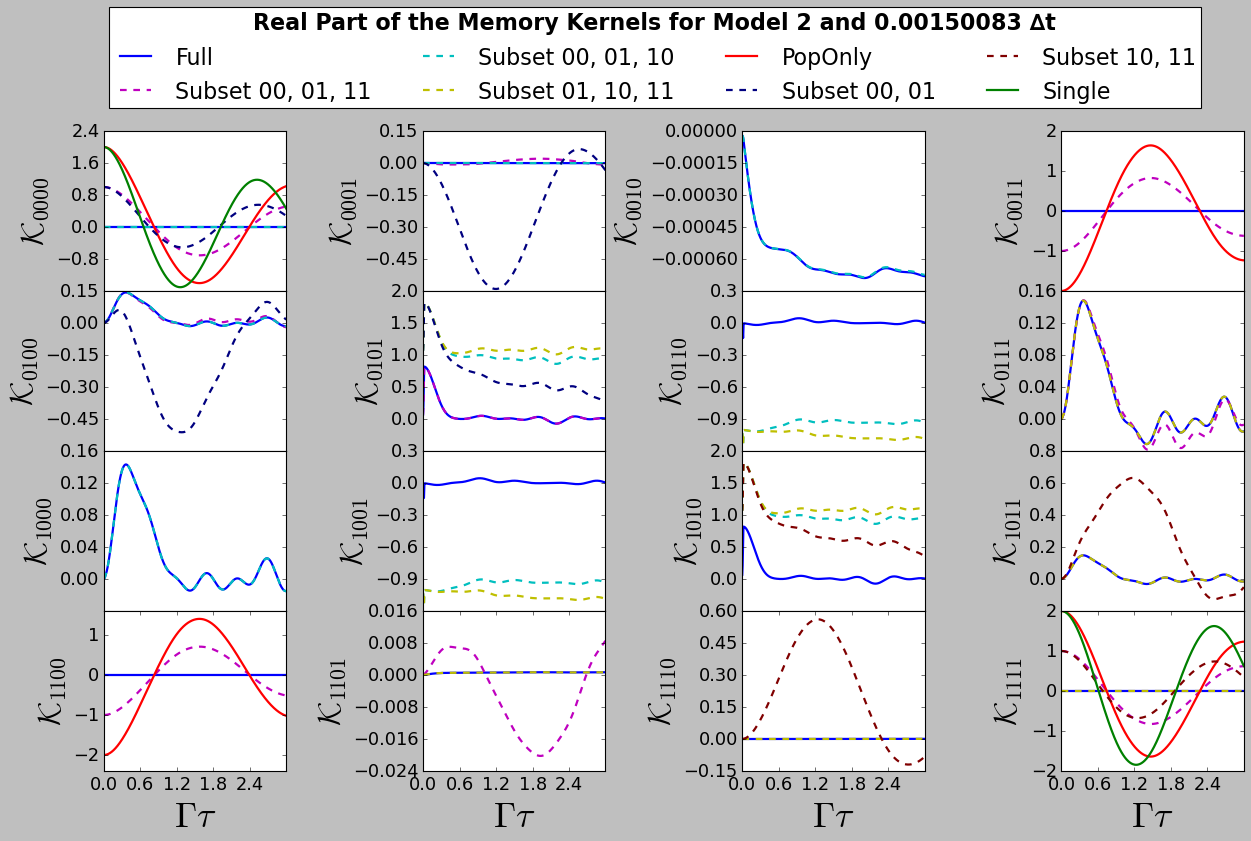

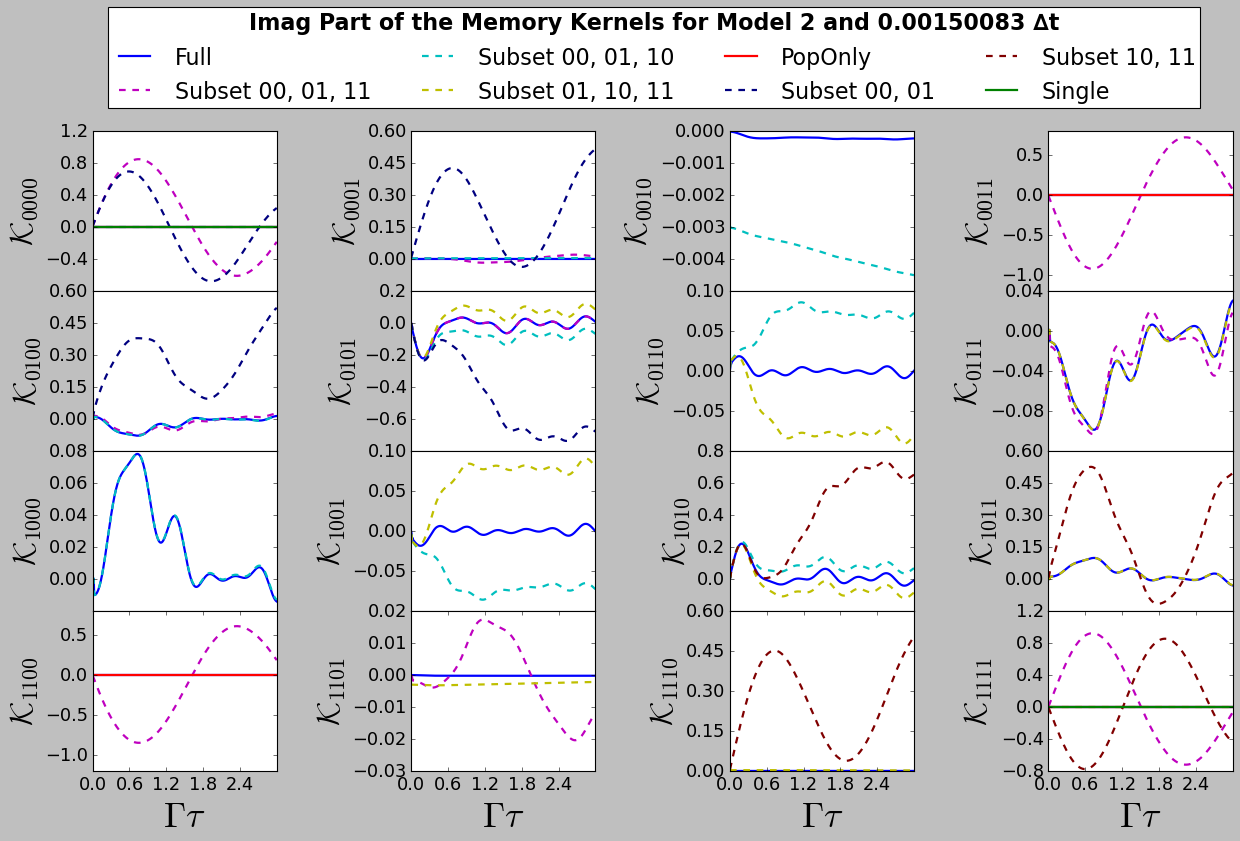

In [162]:
# array specifying GQME types to be graphed
GQMETypes = ["Full", "SubsetStates", "SubsetStates", "SubsetStates", 
             "PopulationsOnly", "SubsetStates", "SubsetStates", "SingleState", 
             "SingleState"]
# array of arrays specifing states in for matching index in GQMETypes
# for Full and Populations-Only GQMEs, a placeholder array can and must be put
# in, but it doesn't have to be all the states in Full and Populations-Only
statesPerType = [["All"], ["00", "01", "11"], ["00", "01", "10"], 
                 ["01", "10", "11"], ["Pops"], ["00", "01"], ["10", "11"], 
                 ["00"], ["11"]]

# states in largest subset; determines size of graphs grid. Put states in order.
# note that if looking at subsets, maxSet must include all states in the subsets
# (e.g., if including subsets ["00", "01"] and ["00", "10", "11"], 
#   maxSet = ["00", "01", "10", "11"])
maxSet = ["00", "01", "10", "11"] 

K_Dict = {} # dictionary to hold memory kernels

# pulls in memory kernels into K_Dict and time array
time = buildKDict(GQMETypes, statesPerType, K_Dict)

# number of columns in legend; good to do a maximum of 4
numCols = 4
# x position of legend, picks number that matches number in maxSet (increasing moves more right)
legendPos_x = [.15, .4, .65, 1.05] 
# y position of legend, picks number that matches number in maxSet (increasing moves more up)
legendPos_y = [.58, .65, .85, .90] 
graph_K("Real", GQMETypes, statesPerType, maxSet, numCols, legendPos_x, 
        legendPos_y, time, K_Dict)
graph_K("Imag", GQMETypes, statesPerType, maxSet, numCols, legendPos_x, 
        legendPos_y, time, K_Dict)

# **4. Calculating the Inhomogeneous Term**

$\quad$ The Volterra equation for the inhomogeneous term is given by Eq. (9), copied below

$$I^{\text{sub}}_{jk}(t) = Z^{jk}(t) + i\sum_{lm\,\in\{ab\}} {\cal F}_{jk,lm}(t) \sigma_{lm}(0) \qquad\quad~
\\ \qquad\quad+ i \sum_{uv\,\in\{ab\}}\int_0^t d\tau\, {\cal F}_{jk,uv}(t - \tau) I^{\text{sub}}_{uv}(\tau).$$

$\quad$ Because $\sigma_{lm}(0) = 0$ for all $lm$ not equal to $00$ and because $\{ab\}$ will not contain $00$ for any subset that needs an inhomogeneous term, so the second term on the RHS will be zero so the Volterra equation will be

$$I^{\text{sub}}_{jk}(t) = Z^{jk}(t) + i \sum_{uv\,\in\{ab\}}\int_0^t d\tau\, {\cal F}_{jk,uv}(t - \tau) I^{\text{sub}}_{uv}(\tau).$$

$\quad$ The initial state is of the form $\hat{\rho}(0) = |0\rangle\langle 0 | \otimes \hat{\rho}_n(0)$, so $Z^{jk}(t) = -i$\quad$ {\cal F}_{jk,00}(t)$. 

$\quad$ In the following subsections, we will calculate the inhomogeneous term using an iterative algorithm with ${\cal F}(\tau)$ as input.

$\quad$ NOTE: If your subset of interest contains the initial electronic state, it is unnecessary to calculate an inhomogeneous term and this section can be skipped to Sec. 5. For the spin-boson model here, the initial electronic states is $\hat\sigma(0) = |0\rangle\langle 0|$ so the only GQMEs that require an inhomogeneous term are single-state GQMEs for a state other than "00" and subset-states GQMEs where the subset does not contain "00". 

## **4.1 Constants and Global Variables**

$\quad$ This subsection defines the constants and global variables used within the inhomogeneous term calculation. 

In [181]:
### constants ###
TIME_STEPS = 2000 # number of time steps
tau = 5              # propagation time step
au2ps = 0.00002418884254 # Conversion of attoseconds to atomic units
timeau = 12.409275
DT = tau * au2ps * timeau # time step in au
FINAL_TIME = TIME_STEPS * DT # final time
DOF_E = 2 # number of electronic states
DOF_E_SQ = DOF_E * DOF_E
DOF_N = 60 # number of nuclear DOF

MODEL_NUM = 2 # model number

### setting parameters that based on the model number ###
BETA = 5 # inverse finite temperature beta = 1 / (k_B * T)
GAMMA_DA = 1 # diabatic coupling
if MODEL_NUM == 1:
    EPSILON = 1    # half of the energy gap between the donor and acceptor
    XI = 0.1       # friction coefficient, determines strength of e-n coupling 
    OMEGA_C = 1    # cutoff frequency of the nuclear DOF
    OMEGA_MAX = 5  # maximum frequency of the nuclear DOF
elif MODEL_NUM == 2:
    EPSILON = 1
    XI = 0.1
    OMEGA_C = 2
    OMEGA_MAX = 10 
elif MODEL_NUM == 3:
    EPSILON = 1
    XI = 0.1
    OMEGA_C = 7.5
    OMEGA_MAX = 36
elif MODEL_NUM == 4:
    EPSILON = 1
    XI = 0.4
    OMEGA_C = 2
    OMEGA_MAX = 10
elif MODEL_NUM == 6:
    EPSILON = 0
    XI = 0.2
    OMEGA_C = 2.5
    OMEGA_MAX = 12

### specific constants to the inhomogeneous term code ###
INTEGRAL_STEP_I = (TIME_STEPS * DT - DT)/(TIME_STEPS - 1)
# size of slice in integral, often written h = (x_b - x_a)/N
# [[Note: N = TIME_STEPS - 1 because there are TIME_STEPS - 1 slices, since 
#   TIME_STEPS includes a count for t = 0]]
MAX_ITERS = 30 # maximum number of iterations for I
CONVERGENCE_PARAM = 10.**(-10.) # convergence parameter for volterra iterations

### setting parameter string ###
PARAM_STR = "_Spin-Boson_Ohmic_TT-TFD_b%sG%s_e%s_t%.8f_"%(BETA, GAMMA_DA, EPSILON, DT)
PARAM_STR += "xi%swc%s_wmax%s_dofn%s_tf%.4f"%(XI, OMEGA_C, OMEGA_MAX, DOF_N, FINAL_TIME)

### print statements ###
print("     time steps =", TIME_STEPS)
print("             DT =", DT)
print("     final time =", FINAL_TIME)
print("        model # =", MODEL_NUM)
print("          DOF_E =", DOF_E)
print("          DOF_N =", DOF_N)
print("           beta =", BETA)
print("       gamma_da =", GAMMA_DA)
print("        epsilon =", EPSILON)
print("             xi =", XI)
print("        omega_c =", OMEGA_C)
print("      omega_max =", OMEGA_MAX)
print("   param string =", PARAM_STR)

     time steps = 2000
             DT = 0.0015008299950527925
     final time = 3.001659990105585
        model # = 2
          DOF_E = 2
          DOF_N = 60
           beta = 5
       gamma_da = 1
        epsilon = 1
             xi = 0.1
        omega_c = 2
      omega_max = 10
   param string = _Spin-Boson_Ohmic_TT-TFD_b5G1_e1_t0.00150083_xi0.1wc2_wmax10_dofn60_tf3.0017


### **4.1.2 Liouvillian Matrix**

$\quad$ This subsection defines $\langle{\cal L}\rangle_n^0 = \text{Tr}\big\{{\cal L}\hat\rho_n(0)\big\}$: the expectation value of the Liouvillian, ${\cal L}(\cdot) = [\hat H, \,\cdot\,]$, with respect to the initial states of the nuclear DOF, $\hat\rho_n(0)$. For the spin-boson model, $\langle{\cal L}\rangle_n^0$ is given by:

$$
\langle{\cal L}\rangle_n^0 = 
\left(
    \begin{array}{cccc} 
    0 & -\Gamma & \Gamma & 0
	\\[0.25em] -\Gamma & 2\epsilon& 0 & \Gamma
	\\[0.25em] \Gamma & 0 & -2\epsilon & -\Gamma
	\\[0.25em] 0 & \Gamma & - \Gamma & 0 
    \end{array}
\right).
$$

In [182]:
LN0 = np.zeros((DOF_E_SQ, DOF_E_SQ))
LN0[0][1] = LN0[1][0] = LN0[2][3] = LN0[3][2] = -GAMMA_DA
LN0[0][2] = LN0[2][0] = LN0[1][3] = LN0[3][1] = GAMMA_DA
LN0[1][1] = 2. * EPSILON
LN0[2][2] = -2. * EPSILON

print(r'Gamma_DA =', GAMMA_DA, '      epsilon =', EPSILON)
print('\n<L>_N^0 =')
pprint(LN0)

Gamma_DA = 1       epsilon = 1

<L>_N^0 =
array([[ 0., -1.,  1.,  0.],
       [-1.,  2.,  0.,  1.],
       [ 1.,  0., -2., -1.],
       [ 0.,  1., -1.,  0.]])


## **4.2 Variables Defining the Subset of Interest**

### **4.2.1 Constants**

$\quad$ This subsection defines the constants related to the GQME type being calculated. The types of GQMEs allowed are a single-state GQME, with the single state designated in this subsection or a subset of states GQME, with the subset designated in this subsection. This is done within the array `STATES`, which should have the state(s) in the subset of interest. For subsets, it is logical (but not technically necessary) to put the order of states following the normal order; i.e., "00" should be listed before "01", which should be before "10", which should be before "11".

<!-- NOTE: For the spin-boson model here with an initial electronic state of $\hat\sigma(0) = |0\rangle\langle 0|$, the full and populations-only GQMEs do not need an inhomogeneous term. However, the code includes the ability to calculate the populations-only in case an initial electronic state is chosen with a coherence, such that an inhomogeneous term is needed. -->

In [183]:
GQME_TYPE = "SingleState"
# type of reduced GQME, options: SingleState or SubsetStates
STATES = ["11"]
# state(s) to be looking at for SingleState or SubsetStates
INITIAL_STATE = "00" # initial state 
if INITIAL_STATE in STATES:
    print("Inhomogeneous term not needed")

### **4.2.2 Variables**

$\quad$ This subsection creates variables based on the GQME type defined in Sec. 4.2.1. The variables that need to be defined are the number of states in the subset of interest and an array of the indices in the subset of interest. 

In [184]:
### setting the number of states and array of states strings based on the 
### GQME_TYPE. This tutorial assumes that you are starting in one and only one 
### of the populations so the full and populations-only GQME types will not need
### an inhomogeneous term
states = []
if GQME_TYPE == "SubsetStates":
    numStates = len(STATES) # number of states in subset
    states = STATES
elif GQME_TYPE == "SingleState":
    numStates = len(STATES)
    states = STATES
    if numStates != 1:
        print("ERROR: More than one state in STATES with GQME_TYPE = SingleState")
else:
    print("ERROR: GQME_TYPE not SubsetStates or SingleState.")

### print statements ###
print("Calculating inhomogeneous term of the", GQME_TYPE, "GQME")
if GQME_TYPE == "SubsetStates":
    printStr = "\tSubset of states is "
    for i in range(numStates):
        printStr += "%s, "%states[i]
    print(printStr)
elif GQME_TYPE == "SingleState":
    print("\tState being calculated is", states[0])

Calculating inhomogeneous term of the SingleState GQME
	State being calculated is 11


## **4.3 Read in Time Vector and Projection-Free Inputs ${\cal F}(t)$ and $\hat{Z}(t)$**

$\quad$ This subsection reads in the values of time and the projection-free input (PFI) ${\cal F}(t)$ from files, including the element(s) of ${\cal F}(t)$ needed for $\hat Z(t)$.

In [185]:
### variables ###
timeVec = np.zeros((TIME_STEPS))
F = np.zeros((TIME_STEPS, numStates, numStates), dtype=np.complex_)
Z = np.zeros((TIME_STEPS, numStates), dtype=np.complex_)
for j in range(numStates):
    ZStatesStr = states[j] + INITIAL_STATE

    t, Zreal, Zimag = np.hsplit(
        np.loadtxt("ProjFree_Output/F_" + ZStatesStr + PARAM_STR + ".txt"), 3)

    for i in range(TIME_STEPS):
        timeVec[i] = t[i]
        Z[i][j] = -1. * 1.j * (Zreal[i] + 1.j * Zimag[i])

    for k in range(numStates):
        statesStr = states[j] + states[k]

        t, Freal, Fimag = np.hsplit(
            np.loadtxt("ProjFree_Output/F_" + statesStr + PARAM_STR + ".txt"), 3)

        for i in range(TIME_STEPS):
            F[i][j][k] = Freal[i] + 1.j * Fimag[i]

## **4.4 Iterative Volterra Algorithm**

$\quad$ These subsections will calculate the inhomogeneous term via an interative algorithm. Starting with the general formula for a convolution Volterra equation of the second kind: 
\begin{equation*} 
\hat I(t) = g(t) + \int_{0}^t f(t - \tau)\hat I(\tau)d\tau
\end{equation*}
The iterative algorithm works by starting with a guess of $\hat I(t) = g(t)$ and keeps replacing it until it converges:
\begin{align*}
\hat I^{\color{purple} 0}(t) &= g(t)
\\ \hat I^{\color{purple} 1}(t) &= g(t) + \int_{0}^t d\tau f(t - \tau) \hat I^{\color{purple} 0}(\tau)
\\ \hat I^{\color{purple} 2}(t) &= g(t) + \int_{0}^t d\tau f(t - \tau) \hat I^{\color{purple} 1}(\tau)
\\ \vdots
\\ \hat I^{\color{purple} i}(t) &= g(t) + \int_{0}^t d\tau f(t - \tau) \hat I^{\color{purple} i-1}(\tau) \qquad  \text{where} \quad |\hat I^{\color{purple} i}(t) - \hat I^{\color{purple} i-1}(t)|\ \leq 10^{-10}
\end{align*}

$\quad$ To do this in an algorithm, we calculate $\hat I(n\Delta t)$ [where $n = 0, 1, 2, ..., N$ and $N\Delta t = t$] at many time steps and store them to get $\hat I^{\color{purple} iteration}(n\Delta t)$:
\begin{align*}
\hat I^{\color{purple} 0}(n\Delta t) &= g(n\Delta t)
\\ \hat I^{\color{purple} 1}(n\Delta t) &= g(n\Delta t) + \int_0^{n\Delta t} d\tau f(n\Delta t - \tau) \hat I^{\color{purple} 0}(\tau)
\\ \hat I^{\color{purple} 2}(n\Delta t) &= g(n\Delta t) + \int_0^{n\Delta t} d\tau f(n\Delta t - \tau) \hat I^{\color{purple} 1}(\tau)
\\ \vdots
\\ \hat I^{\color{purple} i}(n\Delta t) &= g(n\Delta t) + \int_0^{n\Delta t} d\tau f(n\Delta t - \tau) \hat I^{\color{purple} i-1}(\tau) \qquad  \text{where} \quad |\hat I^{\color{purple} i}(n\Delta t) - \hat I^{\color{purple} i-1}(n\Delta t)|\ \leq 10^{-10}
\end{align*}
<br>

$\quad$ The algorithm works by first calculating the integral from $0$ to $n\Delta t$ using the trapezoidal rule with $f(n\Delta t - \tau)$ and $\hat I^{\color{purple} i-1}(s)$ and then adding $g(n\Delta t)$ to get $\hat I^{\color{purple} i}(n\Delta t)$. 

$\quad$ To check convergence, we see if $\ |\hat I_{jk}^{\text{sub},\ {\color{purple} i}}(n\Delta t) - \hat I_{jk}^{\text{sub},\ {\color{purple} i-1}}(n\Delta t)| \leq 10^{-10}\ $ for all vector elements $j,k$ and time steps $n$.

### **4.4.1 Function to Calculate Integral via Trapezoidal Rule**

$\quad$ This function calculates the integral part of the Volterra equation, 
$$
i \sum_{uv\,\in\{ab\}} \int_0^\tau d\tau' {\cal F}_{jk,uv}(\tau - \tau') {\cal K}_{uv,lm}^{\text{sub}}(\tau')
$$
via the [extended trapezoidal rule](http://websites.umich.edu/~mejn/cp/chapters/int.pdf) and then adding the linear part calculated in Sec. 3.4.

$\quad$ The extended trapezoidal rule approximates an integral on a uniform grid with $N$ slices as:
$$
\int_a^b f(t) dt \approx h\bigg[\frac{1}{2} f(a) + \frac{1}{2} f(b) + \sum_{k = 1}^{N-1} f(a + k * h)\Bigg], 
$$
where $h = (a - b)\,/\,N$.

In [186]:
def CalculateIntegral(numStates, F, Z, prevITerm, iTerm):
    global TIME_STEPS, INTEGRAL_STEP_I

    for n in range(1, TIME_STEPS):
        for i in range(numStates):
            iTerm[n][i] = 0.
            for j in range(numStates):
                iTerm[n][i] += 0.5 * INTEGRAL_STEP_I * F[n][i][j] * iTerm[0][j]
                iTerm[n][i] += 0.5 * INTEGRAL_STEP_I * F[0][i][j] * prevITerm[n][j]
                for c in range(1, n):
                    iTerm[n][i] += INTEGRAL_STEP_I * F[n - c][i][j] * iTerm[c][j]
            
            iTerm[n][i] = 1.j * iTerm[n][i] + Z[n][i]

    return iTerm

### **4.4.2 Function to Print Inhomogeneous Term**

$\quad$ This function prints files with three tab-separated columns: the time, the real part, and the imaginary part for each element of $\hat I(t)$ into the folder `I_Output`.

In [187]:
def PrintITerm(numStates, timeVec, iTerm):
    global GQME_TYPE

    for j in range(numStates):
        statesStr = states[j] + "_startingIn_" + INITIAL_STATE

        # outfileStr for K
        outfileIStr = "I_Output/" + GQME_TYPE + "/I_" + statesStr
        if GQME_TYPE == "SubsetStates":
            outfileIStr += "_Subset"
            for l in range(numStates):
                outfileIStr += "_" + states[l]
        outfileIStr += PARAM_STR + ".txt"
    
        f = open(outfileIStr, "w")
    
        for i in range(len(timeVec)):
            f.write("%s\t%s\t%s\n"%(timeVec[i], iTerm[i][j].real, iTerm[i][j].imag))
        f.close()

### **4.4.3 Volterra Algorithm**

$\quad$ This section actually calculates the iterative Volterra algorithm described in Sec. 4.4, using the functions in Secs. 4.4.1 and 4.4.2.

$\quad$ The timing of this subsection was seen to be, for model 2 with 2000 time steps and $N_n = 60\,$:
- **Subset  \{01, 10, 11\}**: 6 iterations, ~3.25 minutes
- **Subset \{10, 11\}**: 6 iterations, ~1 minute
- **Single-State for 11**: 3 iterations, ~10 seconds

In [188]:
START_TIME = timeModule.time()

prevITerm = np.zeros((TIME_STEPS, numStates), dtype=np.complex_)
iTerm = np.zeros((TIME_STEPS, numStates), dtype=np.complex_)

prevITerm = Z.copy()
iTerm[0] = Z[0].copy()

for numIter in range(1, MAX_ITERS + 1):
    iterStartTime = timeModule.time()
    print("Iteration:", numIter)

    iTerm = CalculateIntegral(numStates, F, Z, prevITerm, iTerm)

    numConv = 0
    for i in range(numStates):
        for n in range(TIME_STEPS):
            if abs(iTerm[n][i] - prevITerm[n][i]) <= CONVERGENCE_PARAM:
                numConv += 1
            elif numIter == MAX_ITERS:
                print("\tK time step and matrix element that didn't converge: %s, %s"%(n,i))
                print("\t\tprevITerm:", prevITerm[n][i])
                print("\t\t    ITerm:", iTerm[n][i])
    
    print("\tIteration time:", printTime(timeModule.time() - iterStartTime))

    if numConv == TIME_STEPS * numStates:
        print("Number of Iterations:", numIter)

        PrintITerm(numStates, timeVec, iTerm)

        print("\tVolterra time:", printTime(timeModule.time() - START_TIME))

        break

    prevITerm = iTerm.copy()
    iTerm = np.zeros((TIME_STEPS, numStates), dtype=np.complex_)
    iTerm[0] = Z[0].copy()

    if numIter == MAX_ITERS:
        print("\tERROR: Did not converge for %s iterations"%MAX_ITERS)

        print("\tVolterra time:", printTime(timeModule.time() - START_TIME))


Iteration: 1
	Iteration time: 1.938 seconds
Iteration: 2
	Iteration time: 1.754 seconds
Iteration: 3
	Iteration time: 1.799 seconds
Number of Iterations: 3
	Volterra time: 5.498 seconds


## **4.5 Graphing the Inhomogeneous Term**

$\quad$ This subsection will graph the inhomogeneous term(s) based on the GQME types specified in the array `GQMETypes` defined in Sec. 4.5.4. There is an additional array (also defined in Sec. 4.5.4) necessary, `statesPerType`, that specifies the states that are part of each GQME type in `GQMETypes`. Therefore, `statesPerType` needs to be an array of arrays that is the same length overall as `GQMETypes`. 

$\quad$ For single-state and subset-states GQMEs in `GQMETypes`, the matching element within `statesPerType` should be an array of strings specifying the indices of the state(s) within the subset of interest. 

$\quad$ For full GQME, populations-only GQME, and any subset-states GQME that contains `"00"`, an inhomogeneous term is not needed.

$\quad$ The graphs will be a vertical stack of 1 to 3 graphs, depending on the single-state or subset-states GQME type(s) of interest.

$\quad$ This subsection does not need to be run directly after the previous subsections, as it will be pulling the values of the inhomogeneous terms from files specified by the constants in Sec. 4.5.1 and using the function in Sec. 4.5.3.

### **4.5.1 Constants and Global Variables**

$\quad$ The constants and global variables used in graphing the inhomogeneous term(s).

In [189]:
### constants ###
TIME_STEPS = 2000 # number of time steps
tau = 5              # propagation time step
au2ps = 0.00002418884254 # Conversion of attoseconds to atomic units
timeau = 12.409275
DT = tau * au2ps * timeau # time step in au
FINAL_TIME = TIME_STEPS * DT # final time
DOF_E = 2 # number of electronic states
DOF_E_SQ = DOF_E * DOF_E
DOF_N = 60 # number of nuclear DOF

### specific constants to the inhomogeneous term code ###
INTEGRAL_STEP_I = (TIME_STEPS * DT - DT)/(TIME_STEPS - 1)
# size of slice in integral, often written h = (x_b - x_a)/N
# [[Note: N = TIME_STEPS - 1 because there are TIME_STEPS - 1 slices, since 
#   TIME_STEPS includes a count for t = 0]]
MAX_ITERS = 30 # maximum number of iterations for I
CONVERGENCE_PARAM = 10.**(-10.) # convergence parameter for volterra iterations

### setting parameters that based on the model number ###
MODEL_NUM = 2 # model number

BETA = 5 # inverse finite temperature beta = 1 / (k_B * T)
GAMMA_DA = 1 # diabatic coupling
if MODEL_NUM == 1:
    EPSILON = 1    # half of the energy gap between the donor and acceptor
    XI = 0.1       # friction coefficient, determines strength of e-n coupling 
    OMEGA_C = 1    # cutoff frequency of the nuclear DOF
    OMEGA_MAX = 5  # maximum frequency of the nuclear DOF
elif MODEL_NUM == 2:
    EPSILON = 1
    XI = 0.1
    OMEGA_C = 2
    OMEGA_MAX = 10 
elif MODEL_NUM == 3:
    EPSILON = 1
    XI = 0.1
    OMEGA_C = 7.5
    OMEGA_MAX = 36
elif MODEL_NUM == 4:
    EPSILON = 1
    XI = 0.4
    OMEGA_C = 2
    OMEGA_MAX = 10
elif MODEL_NUM == 6:
    EPSILON = 0
    XI = 0.2
    OMEGA_C = 2.5
    OMEGA_MAX = 12

### setting parameter string ###
PARAM_STR = "_Spin-Boson_Ohmic_TT-TFD_b%sG%s_e%s_t%.8f_"%(BETA, GAMMA_DA, EPSILON, DT)
PARAM_STR += "xi%swc%s_wmax%s_dofn%s_tf%.4f"%(XI, OMEGA_C, OMEGA_MAX, DOF_N, FINAL_TIME)

### print statements ###
print("     time steps =", TIME_STEPS)
print("             DT =", DT)
print("     final time =", FINAL_TIME)
print("        model # =", MODEL_NUM)
print("          DOF_E =", DOF_E)
print("          DOF_N =", DOF_N)
print("           beta =", BETA)
print("       gamma_da =", GAMMA_DA)
print("        epsilon =", EPSILON)
print("             xi =", XI)
print("        omega_c =", OMEGA_C)
print("      omega_max =", OMEGA_MAX)
print("   param string =", PARAM_STR)

     time steps = 2000
             DT = 0.0015008299950527925
     final time = 3.001659990105585
        model # = 2
          DOF_E = 2
          DOF_N = 60
           beta = 5
       gamma_da = 1
        epsilon = 1
             xi = 0.1
        omega_c = 2
      omega_max = 10
   param string = _Spin-Boson_Ohmic_TT-TFD_b5G1_e1_t0.00150083_xi0.1wc2_wmax10_dofn60_tf3.0017


### **4.5.2 Function to Graph the Inhomogeneous Term(s)**

$\quad$ This function will do the graphing of the inhomogeneous term(s) specified in the array `GQMETypes`. The figures are stored in the folder `Figures/I_Graphs`.

In [190]:
def graph_I(real_imag, GQMETypes, statesPerType, maxSet, numCols, legendPos_x, 
            legendPos_y, time, IDict):
    global MODEL_NUM, DT, DOF_E, PARAM_STR

    # maximum number of states considered, from 1 to 3
    maxStates = len(maxSet)

    # setting colors, linewidths, and linestyles
    singleColor = 'g'
    singleLineWidth = 2
    singleLineStyle = '-'

    # if more than 6 subsets, need to add more colors, widths, and styles
    subsetColor = ['m', 'c', 'y', (0,0,0.5), (0.5,0,0), (0,0.5,0)]
    subsetLineWidth = [2, 2, 2, 2, 2, 2]
    subsetLineStyle = ['--', '--', '--', '--', '--', '--']

    # generates a string to differentiate the files
    outputStr = "_%s"%(real_imag)

    fig = plt.figure(figsize = (10, 8  * maxStates))

    # creates the maxStates graphs
    ax = [] 
    for i in range(maxStates):
        ax.append(plt.subplot2grid((maxStates, 1), (i, 0)))

    # sets the spacing between plots
    plt.subplots_adjust(hspace = 0)

    # making sure the time values cut off at the limit of the quantity
    # so that their lengths match for the plot
    rangeLimit = len(time)

    # because of gradients used to get F and Fdot, end of kernel can be wacky
    frontCut = 2

    # initialize handles for legend
    handles = []

    # count of single states, to ensure only one put in legend
    singleCount = 0

    # count of subsets, for pulling in line colors, widths, and style
    subsetCount = 0

    for indexGQME in range(len(GQMETypes)):
        # pulls in type of GQME
        typeGQME = GQMETypes[indexGQME]

        # plots a single-state memory kernel, based on state in statesPerType
        if typeGQME == "SingleState":
            # pulling in state string
            state = statesPerType[indexGQME][0]

            # pulling in K from dictionary
            single = IDict["single_%s"%state]
            if real_imag == "Real":
                single = single.real
            elif real_imag == "Imag":
                single = single.imag
            else:
                print("ERROR: real_imag value not Real or Imag")
                return

            # determining indices of state
            index = maxSet.index(state)

            ax[index].plot(time[frontCut:], single[frontCut:], 
                           color = singleColor, linewidth = singleLineWidth, 
                           linestyle = singleLineStyle)
            
            if singleCount == 0:
                legendLine = Line2D([0], [0], label = "Single", 
                                    color = singleColor,
                                    linewidth = singleLineWidth, 
                                    linestyle = singleLineStyle)
            
                handles.extend([legendLine])

            outputStr += "_Single_%s"%state

            singleCount += 1
        
        # plots a subset-states memory kernel, based on states in statesPerType
        elif typeGQME == "SubsetStates":
            # pulling in state string
            states = statesPerType[indexGQME]

            numStates = len(states)

            subsetStr = "Subset"
            subsetList = states[0]
            for l in range(numStates):
                subsetStr += "_" + states[l]
                if l != 0:
                    subsetList += ", " + states[l]

            # pulling in K from dictionary
            subset = IDict[subsetStr]
            if real_imag == "Real":
                subset = subset.real
            elif real_imag == "Imag":
                subset = subset.imag
            else:
                print("ERROR: real_imag value not Real or Imag")
                return

            for j in range(numStates):
                # determining indices of state j
                index_j = maxSet.index(states[j])

                ax[index_j].plot(time[frontCut:], subset[frontCut:,j], 
                               color = subsetColor[subsetCount], 
                               linewidth = subsetLineWidth[subsetCount], 
                               linestyle = subsetLineStyle[subsetCount])

            legendLine = Line2D([0], [0], label = r'Subset %s'%subsetList, 
                                color = subsetColor[subsetCount],
                                linewidth = subsetLineWidth[subsetCount], 
                                linestyle = subsetLineStyle[subsetCount])
            
            handles.extend([legendLine])

            outputStr += "_" + subsetStr

            subsetCount += 1

    # loops to plot graphs
    for j in range(maxStates):
        # ab indices of I_{ab}
        l = maxSet[j]
            
        # top 3 rows of graphs
        if j < (maxStates - 1): 
            # since the graphs share x-axes, we need to turn off the ticks 
            # for the upper three graphs in each column
            ax[j].set(xticks=[])

            # makes the y tick values larger
            ax[j].tick_params(axis='y', labelsize=16)

            # controls the number of y ticks
            ax[j].yaxis.set_major_locator(MaxNLocator(nbins=5, prune='lower'))
                
        # bottom row of graphs
        else:
            # makes both tick values larger 
            ax[j].tick_params(axis='both', labelsize=16)

            # controls the number of ticks
            ax[j].yaxis.set_major_locator(MaxNLocator(nbins=5))
            ax[j].xaxis.set_major_locator(MaxNLocator(nbins=5))

            # sets x label on bottom graph
            ax[j].set_xlabel(r'$\Gamma t$',fontsize = 32)

        # y labels
        ax[j].set_ylabel(r'$\hat{I}_{%s}(t)$'%(l),fontsize = 28)

        # sets limit of x-axis
        ax[j].set_xlim(right = time[-1])
    
    # puts a buffer on the left side, as y labels have been cut off before 
    plt.gcf().subplots_adjust(left=0.15)

    legend = ax[0].legend(handles=handles, loc = 'upper right', 
                          bbox_to_anchor=(legendPos_x * 5.75, legendPos_y * 2.), 
                          fontsize = 20, borderpad=0.2, borderaxespad=0.2, 
                          ncol = numCols, 
                          title = "%s Part of the "%(real_imag)
                          + "Inhomogeneous Terms\n"
                          + "  for Model %s and %.8f ∆t"%(MODEL_NUM, DT))
    # adjusts title settings 
    plt.setp(legend.get_title(),fontsize = 20, fontweight='bold') 
    
    # saves the figure
    plt.savefig("Figures/I_Graphs/I_model%s"%MODEL_NUM + outputStr + PARAM_STR
                + ".pdf", dpi=plt.gcf().dpi, bbox_inches='tight')

### **4.5.3 Function to Pull In Inhomogeneous Term(s)** 

$\quad$ This function will pull in inhomogeneous term(s) for graphing based on those defined in `GQMETypes`.

In [191]:
def buildIDict(GQMETypes, statesPerType, IDict):
    global PARAM_STR, TIME_STEPS, DT

    if len(GQMETypes) != len(statesPerType):
        print("ERROR: length of GQMETypes not equal to length of statesPerType.")
        print("Exiting.")
        return
    
    timeSteps_U = TIME_STEPS
    # because of gradients used to get F and Fdot, end of kernel can be wacky
    timeSteps = TIME_STEPS - 2 

    time = np.zeros((timeSteps))

    for indexGQME in range(len(GQMETypes)):
        typeGQME = GQMETypes[indexGQME]
        if typeGQME == "SingleState":
            single = np.zeros((timeSteps), dtype=np.complex_)

            # reading in and storing K single state
            j = statesPerType[indexGQME][0]
            abcd = j + "_startingIn_" + INITIAL_STATE

            t, singleReal, singleImag = np.hsplit(
                np.loadtxt("I_Output/SingleState/I_" + abcd + PARAM_STR + ".txt"), 3)

            for i in range(timeSteps):
                time[i] = t[i]
                single[i] = singleReal[i] + 1.j * singleImag[i]
    
            IDict.update({"single_%s"%j : single})
        elif typeGQME == "SubsetStates":
            states = statesPerType[indexGQME]
            numStates = len(states)
            subset = np.zeros((timeSteps, numStates), dtype=np.complex_)

            subsetStr = "Subset"
            for l in range(numStates):
                subsetStr += "_" + states[l] 

            # reading in and storing K subset states
            for j in range(numStates):
                abcd = states[j] + "_startingIn_" + INITIAL_STATE

                t, subsetReal, subsetImag = np.hsplit(
                    np.loadtxt("I_Output/SubsetStates/I_" + abcd + "_" 
                               + subsetStr + PARAM_STR + ".txt"), 3)

                for i in range(timeSteps):
                    time[i] = t[i]
                    subset[i][j] = subsetReal[i] + 1.j * subsetImag[i]
    
            IDict.update({subsetStr : subset})

    return time


### **4.5.4 Graphing**

$\quad$ This subsection will graph the inhomogeneous term(s) based on the GQME types specified in the array `GQMETypes`. There is an additional array necessary, `statesPerType`, that specifies the states that are part of each GQME type in `GQMETypes`. Therefore, `statesPerType` needs to be an array of arrays that is the same length overall as `GQMETypes`. 

$\quad$ For single-state and subset-states GQMEs in `GQMETypes`, the matching element within `statesPerType` should be an array of strings specifying the indices of the state(s) within the subset of interest. 

$\quad$ For full GQME, populations-only GQME, and any subset-states GQME that contains `"00"`, an inhomogeneous term is not needed.

$\quad$ The graphs will be a vertical stack of 1 to 3 graphs, depending on the single-state or subset-states GQME type(s) of interest. 

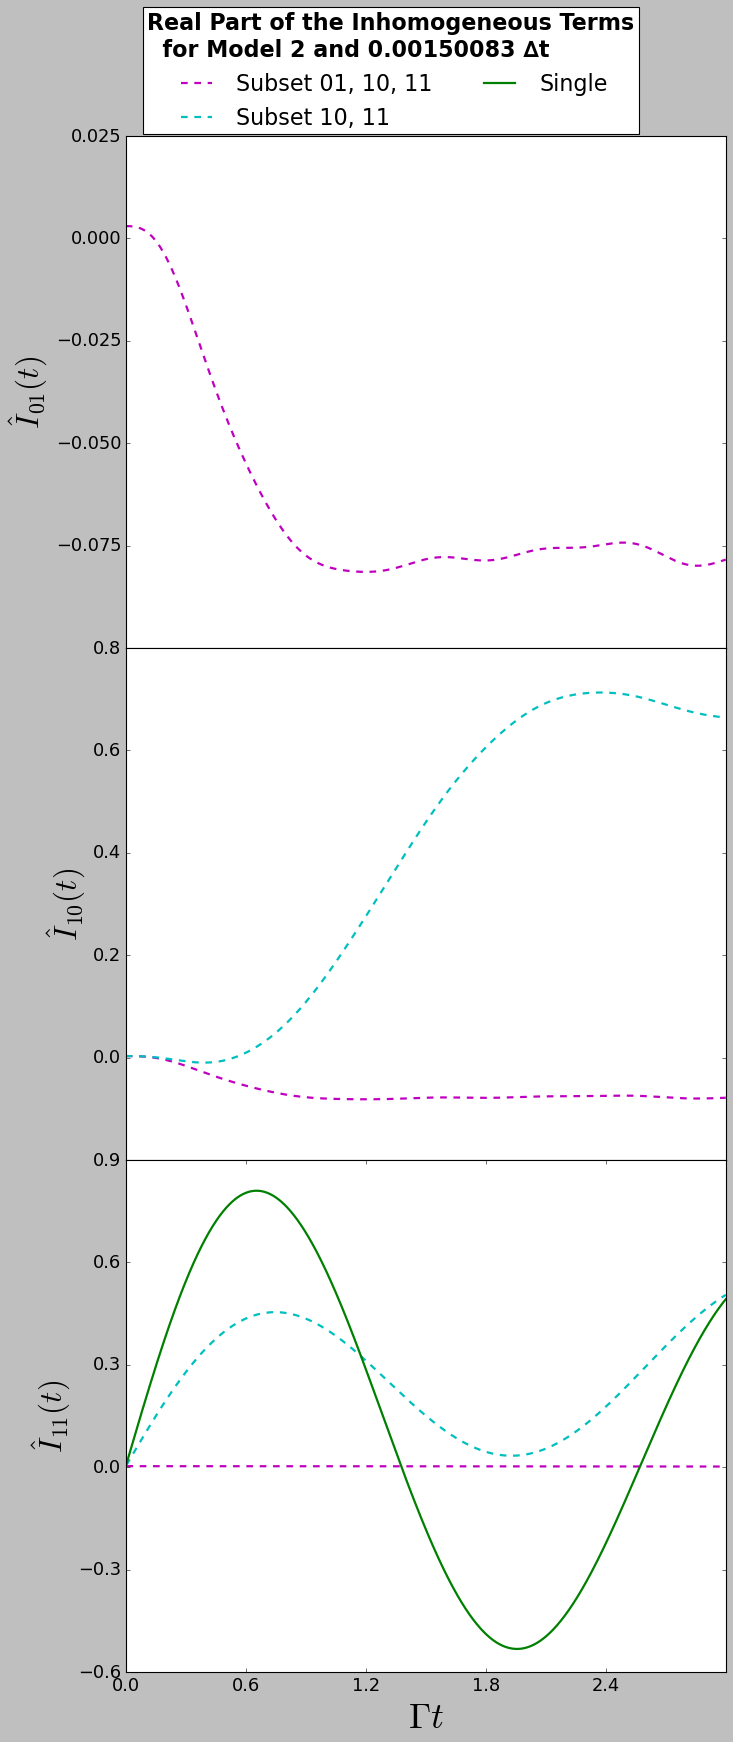

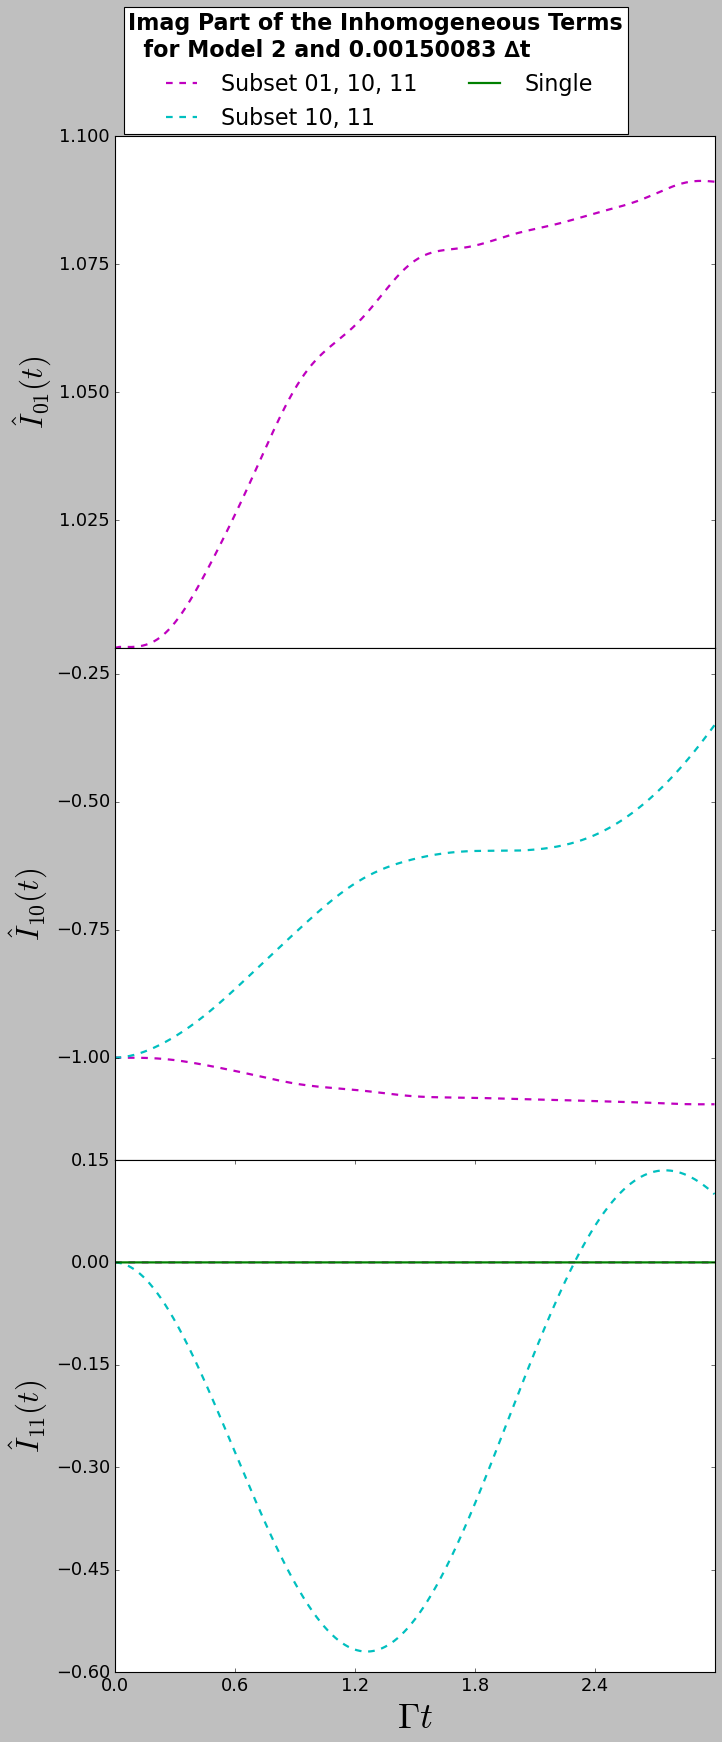

In [195]:
# array specifying GQME types to be graphed. Only SingleState and SubsetStates 
# types will need an inhomogeneous term
GQMETypes = ["SubsetStates", "SubsetStates", "SingleState"]
# array of arrays specifing states in for matching index in GQMETypes
statesPerType = [["01", "10", "11"], ["10", "11"], ["11"]]

# states in largest subset; determines size of graphs grid. Put states in order.
# note that if looking at subsets, maxSet must include all states in the subsets
# (e.g., if including subsets ["01", "11"] and ["10", "11"], 
#   maxSet = ["01", "10", "11"])
maxSet = ["01", "10", "11"] 

I_Dict = {} # dictionary to hold memory kernels

# pulls in memory kernels into K_Dict and time array
time = buildIDict(GQMETypes, statesPerType, I_Dict)

# number of columns in legend; good to do either number of GQMETypes or half
# number of GQMETypes, if more than 4 GQMETypes
numCols = 2 
legendPos_x = 0.15 # x position of legend (increasing moves more right)
legendPos_y = .61 + .01 * (len(maxSet) - 1) # y position of legend (increasing moves more up)
graph_I("Real", GQMETypes, statesPerType, maxSet, numCols, legendPos_x, 
        legendPos_y, time, I_Dict)
graph_I("Imag", GQMETypes, statesPerType, maxSet, numCols, legendPos_x, 
        legendPos_y, time, I_Dict)

# **5. Calculating the GQME**

$\quad$ This section will calculate the GQMEs. The GQME for any element $\sigma_{jk}(t)$ of the electronic density matrix within the subset of electronic DOF of interest $\{\hat\sigma_{ab}(t)\}$ has the form given in Eq. (2), copied below 

$$\frac{d}{dt}\sigma_{jk}(t) = -\frac{i}{\hbar} \sum_{lm\,\in\{ab\}}\langle{\cal L}_{jk,lm}\rangle_n^0\hat\sigma_{lm}(t) - \sum_{lm\,\in\{ab\}}\int_0^t d\tau {\cal K}^{\text{sub}}_{jk,lm}(\tau) \hat\sigma_{lm}(t - \tau) + \hat I_{jk}^{\text{sub}}.$$

$\quad$ In reality, we will calculate all of the $N_{\text{sub}}$ electronic density matrix elements within the subset of interest as a vector, with $\langle{\cal L}_{jk,lm}\rangle_n^0$ a $N_{\text{sub}} \times N_{\text{sub}}$ time-independent matrix, ${\cal K}^{\text{sub}}(\tau)$ $N_{\text{sub}} \times N_{\text{sub}}$ time-dependent matrix, and $\hat I^{\text{sub}}$ a $N_{\text{sub}}$-dimensional time-dependent vector.

## **5.1 Constants and Global Variables**

$\quad$ This subsection defines the constants and global variables used within the GQME calculation.

In [277]:
### constants ###
TIME_STEPS = 2000 # number of time steps
tau = 5              # propagation time step
au2ps = 0.00002418884254 # Conversion of attoseconds to atomic units
timeau = 12.409275
DT = tau * au2ps * timeau # time step in au
FINAL_TIME = TIME_STEPS * DT # final time
DOF_E = 2 # number of electronic states
DOF_E_SQ = DOF_E * DOF_E
DOF_N = 60 # number of nuclear DOF
HBAR = 1

### specific constants to the memory kernel code ###
MEM_TIME = DT * TIME_STEPS # Either the memory time for straight calculation or
# for convergence 
MEM_TIMESTEPS = int(MEM_TIME/DT)
FINAL_TIME_GQME = MEM_TIME + DT 
FINAL_TIMESTEPS = int(FINAL_TIME/DT)

### setting parameters that based on the model number ###
MODEL_NUM = 2 # model number

BETA = 5 # inverse finite temperature beta = 1 / (k_B * T)
GAMMA_DA = 1 # diabatic coupling
if MODEL_NUM == 1:
    EPSILON = 1    # half of the energy gap between the donor and acceptor
    XI = 0.1       # friction coefficient, determines strength of e-n coupling 
    OMEGA_C = 1    # cutoff frequency of the nuclear DOF
    OMEGA_MAX = 5  # maximum frequency of the nuclear DOF
elif MODEL_NUM == 2:
    EPSILON = 1
    XI = 0.1
    OMEGA_C = 2
    OMEGA_MAX = 10 
elif MODEL_NUM == 3:
    EPSILON = 1
    XI = 0.1
    OMEGA_C = 7.5
    OMEGA_MAX = 36
elif MODEL_NUM == 4:
    EPSILON = 1
    XI = 0.4
    OMEGA_C = 2
    OMEGA_MAX = 10
elif MODEL_NUM == 6:
    EPSILON = 0
    XI = 0.2
    OMEGA_C = 2.5
    OMEGA_MAX = 12

### setting parameter string ###
PARAM_STR = "_Spin-Boson_Ohmic_TT-TFD_b%sG%s_e%s_t%.8f_"%(BETA, GAMMA_DA, EPSILON, DT)
PARAM_STR += "xi%swc%s_wmax%s_dofn%s_tf%.4f"%(XI, OMEGA_C, OMEGA_MAX, DOF_N, FINAL_TIME)

### setting parameter string GQME ###
PARAM_STR_GQME = PARAM_STR + "_mt%.4f_finalt%.4f"%(MEM_TIME, FINAL_TIME_GQME)

### print statements ###
print("       time steps =", TIME_STEPS)
print("               DT =", DT)
print("       final time =", FINAL_TIME)
print("      memory time =", MEM_TIME)
print("  final time GQME =", FINAL_TIME_GQME)
print("          model # =", MODEL_NUM)
print("            DOF_E =", DOF_E)
print("            DOF_N =", DOF_N)
print("             beta =", BETA)
print("         gamma_da =", GAMMA_DA)
print("          epsilon =", EPSILON)
print("               xi =", XI)
print("          omega_c =", OMEGA_C)
print("        omega_max =", OMEGA_MAX)
print("     param string =", PARAM_STR)

### variables ###
timeVec = np.arange(0, FINAL_TIMESTEPS * DT, DT)

       time steps = 2000
               DT = 0.0015008299950527925
       final time = 3.001659990105585
      memory time = 3.001659990105585
  final time GQME = 3.003160820100638
          model # = 2
            DOF_E = 2
            DOF_N = 60
             beta = 5
         gamma_da = 1
          epsilon = 1
               xi = 0.1
          omega_c = 2
        omega_max = 10
     param string = _Spin-Boson_Ohmic_TT-TFD_b5G1_e1_t0.00150083_xi0.1wc2_wmax10_dofn60_tf3.0017


### **5.1.2 Liouvillian Matrix**

$\quad$ This subsection defines $\langle{\cal L}\rangle_n^0 = \text{Tr}\big\{{\cal L}\hat\rho_n(0)\big\}$: the expectation value of the Liouvillian, ${\cal L}(\cdot) = [\hat H, \,\cdot\,]$, with respect to the initial states of the nuclear DOF, $\hat\rho_n(0)$. For the spin-boson model, $\langle{\cal L}\rangle_n^0$ is given by:

$$
\langle{\cal L}\rangle_n^0 = 
\left(
    \begin{array}{cccc} 
    0 & -\Gamma & \Gamma & 0
	\\[0.25em] -\Gamma & 2\epsilon& 0 & \Gamma
	\\[0.25em] \Gamma & 0 & -2\epsilon & -\Gamma
	\\[0.25em] 0 & \Gamma & - \Gamma & 0 
    \end{array}
\right).
$$

In [278]:
LN0 = np.zeros((DOF_E_SQ, DOF_E_SQ))
LN0[0][1] = LN0[1][0] = LN0[2][3] = LN0[3][2] = -GAMMA_DA
LN0[0][2] = LN0[2][0] = LN0[1][3] = LN0[3][1] = GAMMA_DA
LN0[1][1] = 2. * EPSILON
LN0[2][2] = -2. * EPSILON

print(r'Gamma_DA =', GAMMA_DA, '      epsilon =', EPSILON)
print('\n<L>_N^0 =')
pprint(LN0)

Gamma_DA = 1       epsilon = 1

<L>_N^0 =
array([[ 0., -1.,  1.,  0.],
       [-1.,  2.,  0.,  1.],
       [ 1.,  0., -2., -1.],
       [ 0.,  1., -1.,  0.]])


## **5.2 Variables Defining the Subset of Interest**

### **5.2.1 Constants**

$\quad$ This subsection defines the constants related to the GQME type being calculated. The types of GQMEs allowed are the full GQME (all electronic states); the populations-only GQME (only the populations); a single-state GQME, with the single state designated in this subsection; and a subset of states GQME, with the subset designated in this subsection. This is done within the array `STATES`, which should have the state(s) in the subset of interest. For subsets, it is logical (but not technically necessary) to put the order of states following the normal order; i.e., "00" should be listed before "01", which should be before "10", which should be before "11".

In [279]:
GQME_TYPE = "SingleState"
# type of reduced (or full) GQME. 
# options: Full, PopulationsOnly, SingleState, SubsetStates
STATES = ["11"]
# state(s) to be looking at for SingleState or SubsetStates. It isn't
# necessary to set this for Full or PopulationsOnly because the code is designed
# to create the right arrays for those automatically.
INITIAL_STATE = "00" # initial state 

### **5.2.2 Variables**

$\quad$ This subsection creates variables based on the GQME type defined in Sec. 5.2.1. The variables that need to be defined are the number of states in the subset of interest and an array of the indices in the subset of interest. 

In [280]:
### setting the number of states and array of states strings based on the 
### GQME_TYPE
states = [] # array with states in the subset of interest
initInSubset = False
if GQME_TYPE == "Full":
    numStates = DOF_E_SQ # number of states in subset
    for i in range(DOF_E):
        for j in range(DOF_E):
            statesStr = "%s%s"%(i,j)
            states.append(statesStr)
    
    initInSubset = True
    initialIndex = DOF_E * int(INITIAL_STATE[0]) + int(INITIAL_STATE[1])

elif GQME_TYPE == "PopulationsOnly":
    numStates = DOF_E
    for i in range(DOF_E):
        statesStr = "%s%s"%(i,i)
        states.append(statesStr)

    initInSubset = True
    initialIndex = int(INITIAL_STATE[0])

elif GQME_TYPE == "SubsetStates":
    numStates = len(STATES)
    states = STATES

    if INITIAL_STATE in states:
        initInSubset = True
        initialIndex = states.index(INITIAL_STATE) 
elif GQME_TYPE == "SingleState":
    numStates = len(STATES)
    states = STATES
    if numStates != 1:
        print("ERROR: More than one state in STATES with GQME_TYPE = SingleState")
    
    if states[0] == INITIAL_STATE:
        initInSubset = True
        initialIndex = 0 
else:
    print("ERROR: GQME_TYPE not Full, PopulationsOnly, SubsetStates, or SingleState.")

### print statements ###
print("Calculating the", GQME_TYPE, "GQME")
if GQME_TYPE == "SubsetStates":
    printStr = "\tSubset of states is "
    for i in range(numStates):
        printStr += "%s, "%states[i]
    print(printStr)
elif GQME_TYPE == "SingleState":
    print("\tState being calculated is", states[0])

Calculating the SingleState GQME
	State being calculated is 11


## **5.3 Read in Memory Kernel**

$\quad$ This subsection will pull in from files the element(s) of the memory kernel matching the GQME type being calculated.



In [281]:
kernel = np.zeros((MEM_TIMESTEPS, numStates, numStates), dtype=np.complex_)
for j in range(numStates):
    for k in range(numStates):
        statesStr = states[j] + states[k]

        if GQME_TYPE == "SubsetStates":
            statesStr += "_Subset"
            for l in range(numStates):
                statesStr += "_" + states[l]

        t, Kreal, Kimag = np.hsplit(
            np.loadtxt("K_Output/" + GQME_TYPE + "/K_" + statesStr + PARAM_STR 
                       + ".txt"), 3)

        for i in range(MEM_TIMESTEPS):
            kernel[i][j][k] = Kreal[i] + 1.j * Kimag[i]

## **5.4 Read in Inhomogeneous Term**

$\quad$ If necessary, this subsection will pull in from files the element(s) of the inhomogeneous term matching the GQME type being calculated.

In [282]:
iTerm = np.zeros((FINAL_TIMESTEPS, numStates), dtype=np.complex_)
if initInSubset == False:
    print("Reading in inhomogeneous term")
    for j in range(numStates):
        statesStr = states[j] + "_startingIn_" + INITIAL_STATE

        if GQME_TYPE == "SubsetStates":
            statesStr += "_Subset"
            for l in range(numStates):
                statesStr += "_" + states[l]

        t, Ireal, Iimag = np.hsplit(
            np.loadtxt("I_Output/" + GQME_TYPE + "/I_" + statesStr + PARAM_STR 
                       + ".txt"), 3)

        for i in range(FINAL_TIMESTEPS):
            iTerm[i][j] = Ireal[i] + 1.j * Iimag[i]
else:
    print("No inhomogeneous term needed")

Reading in inhomogeneous term


## **5.5 Functions for the 4th-Order Runge-Kutta Method (RK4)**

$\quad$ The GQME is solved using the [RK4 method](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods#The_Runge%E2%80%93Kutta_method). This method is used to solve equations of the form

$$\frac{dy}{dt} = f(t, y) \ \ \ \text{with an initial value}\ \ \ y(t_0) = y_0.$$

$\quad$ In the case of the GQME, $y = \sigma_{jk}$,$\ $ $y_0 = \langle j|0\rangle\langle 0|k\rangle$,$\ $ and 
$$
f\big(t, \sigma_{jk}\big) = -\frac{i}{\hbar} \sum_{lm\,\in\{ab\}}\langle{\cal L}_{jk,lm}\rangle_n^0\hat\sigma_{lm}(t) - \sum_{lm\,\in\{ab\}}\int_0^t d\tau {\cal K}^{\text{sub}}_{jk,lm}(\tau) \hat\sigma_{lm}(t - \tau) + \hat I_{jk}^{\text{sub}}.
$$

$\quad$ The RK4 method then works step-wise with time step $h$ so $t_{n + 1} = t_n + h$ (with $n = 0, 1, 2, ...$) and 
$$
\sigma_{jk}^{n + 1} = \sigma_{jk}^n + \frac{h}{6}\big(k_1 + 2k_2 + 2k_3 + k_4\big),
$$
where $\sigma_{jk}^{n + 1} = \sigma_{jk}(t_{n + 1})$ and
$$
\begin{align*}
k_1 &= f\big(t_n, \sigma_{jk}^n\big)
\\ k_2 &= f\bigg(t_n + \frac{h}{2}, \sigma_{jk}^n + \frac{h}{2}k_1\bigg)
\\ k_3 &= f\bigg(t_n + \frac{h}{2}, \sigma_{jk}^n + \frac{h}{2}k_2\bigg)
\\ k_4 &= f\big(t_n + h, \sigma_{jk}^n + hk_3\big).
\end{align*}
$$

$\quad$ We will solve the integral in $f(t, \sigma_{jk})$ using the extended trapezoidal rule. 

$\quad$ In the code, we will not calculate each element of $\hat\sigma^{\text{sub}}(t)$ individually but instead as a vector. This means $y = \hat\sigma^{\text{sub}}(t)$,$\ $ $y_0 = \sum\limits_{jk\,\in\,\{ab\}} \big(\langle j|0\rangle\langle 0|k\rangle\big)\,|j\rangle\langle k|$,$\ $ and
$$
f\big(t, \hat\sigma^{\text{sub}}\big) = -\frac{i}{\hbar} \sum_{lm\,\in\{ab\}}\langle{\cal L}_{jk,lm}\rangle_n^0\hat\sigma_{lm}(t) - \sum_{lm\,\in\{ab\}}\int_0^t d\tau {\cal K}^{\text{sub}}_{jk,lm}(\tau) \hat\sigma_{lm}(t - \tau) + \hat I_{jk}^{\text{sub}}.
$$

$\quad$ It should be noted that because $f(t, \sigma_{jk})$ contains an integral solved via the extended trapezoidal rule, the error of the RK4 is not actually fourth order in $h$ but first order. There is a [Runge-Kutta method for Volterra integrodifferential equations](https://link.springer.com/article/10.1007/BF01459081) that is fourth order but it is not used here, as the RK4 provides sufficient accuracy for the spin-boson model. 

### **5.5.1 Calculating the function $f$ of the Runge-Kutta 4th-Order Method**

$\quad$ This function calculates the function making up the RHS of the RK4 method:
$$
f\big(t, \sigma_{jk}\big) = -\frac{i}{\hbar} \sum_{lm\,\in\{ab\}}\langle{\cal L}_{jk,lm}\rangle_n^0\hat\sigma_{lm}(t) - \sum_{lm\,\in\{ab\}}\int_0^t d\tau {\cal K}^{\text{sub}}_{jk,lm}(\tau) \hat\sigma_{lm}(t - \tau) + \hat I_{jk}^{\text{sub}}.
$$

In [283]:
def Calculatef(numStates, states, initInSubset, currentTime, memTime, kernel, 
               iTerm, sigma, kVec):
    global LN0, HBAR

    memTimeSteps = int(memTime / DT)
    currentTimeStep = int(currentTime / DT)

    f = np.zeros(numStates, dtype=np.complex_)

    for i in range(numStates):
        for j in range(numStates):
            index_jk = DOF_E * int(states[i][0]) + int(states[i][1])
            index_lm = DOF_E * int(states[j][0]) + int(states[j][1])
            f[i] -= 1.j / HBAR * LN0[index_jk][index_lm] * kVec[j]
        if initInSubset == False:
            f[i] += iTerm[currentTimeStep][i]
        
        memory = 0.
        limit = memTimeSteps
        if currentTimeStep < (memTimeSteps - 1):
            limit = currentTimeStep
        for j in range(numStates):
            for l in range(limit):
                memory -= DT * kernel[l][i][j] * sigma[currentTimeStep - l][j]

        f[i] += memory

    return f

### **5.5.2 Propagation via Runge-Kutta 4th-Order Method**

$\quad$ This function propagates $\hat\sigma^{\text{sub}}$ to the next time step using 
$$
\hat\sigma^{\text{sub}}(t_{n + 1}) = \hat\sigma^{\text{sub}}(t_{n}) + \frac{h}{6}\big(k_1 + 2k_2 + 2k_3 + k_4\big),
$$
where $\sigma_{jk}^{n + 1} = \sigma_{jk}(t_{n + 1})$ and
$$
\begin{align*}
k_1 &= f\big(t_n, \sigma_{jk}^n\big)
\\ k_2 &= f\bigg(t_n + \frac{h}{2}, \sigma_{jk}^n + \frac{h}{2}k_1\bigg)
\\ k_3 &= f\bigg(t_n + \frac{h}{2}, \sigma_{jk}^n + \frac{h}{2}k_2\bigg)
\\ k_4 &= f\big(t_n + h, \sigma_{jk}^n + hk_3\big).
\end{align*}
$$

In [284]:
def PropagateRK4(numStates, states, initInSubset, currentTime, memTime, kernel, 
                 iTerm, sigma_hold, sigma):
    global LN0, HBAR

    f_0 = np.zeros(numStates, dtype = np.complex_)
    f_1 = np.zeros(numStates, dtype = np.complex_)
    f_2 = np.zeros(numStates, dtype = np.complex_)
    f_3 = np.zeros(numStates, dtype = np.complex_)
    k_1 = np.zeros(numStates, dtype = np.complex_)
    k_2 = np.zeros(numStates, dtype = np.complex_)
    k_3 = np.zeros(numStates, dtype = np.complex_)

    f_0 = Calculatef(numStates, states, initInSubset, currentTime, memTime, 
                     kernel, iTerm, sigma, sigma_hold)
    
    t_1 = currentTime + DT / 2.
    k_1 = sigma_hold + DT * f_0 / 2.
    f_1 = Calculatef(numStates, states, initInSubset, t_1, memTime, 
                     kernel, iTerm, sigma, k_1)
    
    t_2 = currentTime + DT / 2.
    k_2 = sigma_hold + DT * f_1 /2.
    f_2 = Calculatef(numStates, states, initInSubset, t_2, memTime, 
                     kernel, iTerm, sigma, k_2)
    
    t_3 = currentTime + DT
    k_3 = sigma_hold + DT * f_2
    f_3 = Calculatef(numStates, states, initInSubset, t_3, memTime, 
                     kernel, iTerm, sigma, k_3)
    
    sigma_hold += DT / 6. * (f_0 + 2. * f_1 + 2. * f_2 + f_3)

    return sigma_hold


## **5.6 Function to Print the Density Matrix**

$\quad$ This function prints each element within $\sigma^{\text{sub}}$ into files with three columns: time, real part, and imaginary part of the element. The files are stored in the folder `GQME_Output`.

In [285]:
def PrintGQMESigma(numStates, states, timeVec, sigma):
    global GQME_TYPE, INITIAL_STATE, PARAM_STRING_GQME

    for j in range(numStates):
        statesStr = states[j] + "_startingIn_" + INITIAL_STATE

        # outfileStr for K
        outfileGQMEStr = "GQME_Output/" + GQME_TYPE + "/Sigma_" + statesStr
        if GQME_TYPE == "SubsetStates":
            outfileGQMEStr += "_Subset"
            for l in range(numStates):
                outfileGQMEStr += "_" + states[l]
        outfileGQMEStr += PARAM_STR_GQME + ".txt"
    
        f = open(outfileGQMEStr, "w")
    
        for i in range(len(timeVec)):
            f.write("%s\t%s\t%s\n"%(timeVec[i], sigma[i][j].real, sigma[i][j].imag))
        f.close()

## **5.7 Propagation of the Density Matrix**

$\quad$ This subsection does the propagation of the subset of electronic density matrix elements of interest, $\hat\sigma^{\text{sub}}$ with the RK4 method described in Sec. 5.5 and using the functions in Secs. 5.5.1, 5.5.2, and 5.6.

$\quad$ The timing of this subsection was seen to be, for model 2 with 2000 time steps and $N_n = 60\,$:
- **Full**: ~2 minutes
- **Subset \{00, 01, 11\}**: ~70 seconds
- **Subset \{00, 01, 10\}**: ~70 seconds
- **Subset  \{01, 10, 11\}**: ~70 seconds
- **Populations-Only**: ~30 seconds
- **Subset \{00, 01\}**: ~30 seconds
- **Subset \{10, 11\}**: ~35 seconds
- **Single-State for 00**: ~9 seconds
- **Single-State for 11**: ~8 seconds

In [286]:
startTime = timeModule.time() # time at start of propagation
# array for subset of electronic density matrix elements of interest
sigma = np.zeros((FINAL_TIMESTEPS, numStates), dtype=np.complex_) 
# array to hold copy of sigma
sigma_hold = np.zeros(numStates, dtype = np.complex_)

# if initial state is in subset, sets that state to 1
if initInSubset == True:
    sigma[0][initialIndex] = 1.
    sigma_hold[initialIndex] = 1.

# loop to propagate sigma
print(">>> Starting propagation, memory time =", MEM_TIME)
for l in range(FINAL_TIMESTEPS - 1): # it propagates to the final time step
    currentTime = l * DT

    PropagateRK4(numStates, states, initInSubset, currentTime, MEM_TIME, kernel, 
                 iTerm, sigma_hold, sigma)
        
    sigma[l + 1] = sigma_hold.copy()
    
# prints the time the propagation took
print("\t Time of propagation:", printTime(timeModule.time() - startTime))

# prints sigma to files
print("Printing Sigma")
PrintGQMESigma(numStates, states, timeVec, sigma)

>>> Starting propagation, memory time = 3.001659990105585
	 Time of propagation: 5.087 seconds
Printing Sigma


## **5.8 Graphing $\hat{\sigma}_z(t)$ from Files**

$\quad$ This subsection graphs the population difference $\sigma_z(t) = \sigma_{00}(t) - \sigma_{11}(t)$. This means that either the subset of interest must contain both $\sigma_{00}(t)$ and $\sigma_{11}(t)$ or there must be two subsets used, one with $\sigma_{00}(t)$ and one with $\sigma_{1}(t)$. If two subsets are used, generally we try to match subsets, e.g., single-state GQME for $\sigma_{00}(t)$ with single-state GQME for $\sigma_{11}(t)$ and subset-states GQME for $\{\sigma_{00}(t), \sigma_{01}(t), \sigma_{10}(t)\}$ with subset-states GQME for $\{\sigma_{01}(t), \sigma_{10}(t), \sigma_{11}(t)\}$. 

$\quad$ This subsection will graph the population difference(s) based on the GQME types specified in the array `GQMETypes` defined in Sec. 5.8.4.  

$\quad$ The graph will be a single graph containing all population differences of interest.

$\quad$ This subsection does not need to be run directly after the previous subsections, as it will be pulling the values of the $\sigma_{00}(t)$ and $\sigma_{11}(t)$ from files specified by the constants in Sec. 5.8.1 and using the function in Sec. 5.8.3.

### **5.8.1 Constants**

$\quad$ Constants used in graphing $\sigma_z(t)$. 

In [287]:
TIME_STEPS = 2000 # number of time steps
tau = 5              # propagation time step
au2ps = 0.00002418884254 # Conversion of attoseconds to atomic units
timeau = 12.409275
DT = tau * au2ps * timeau # time step in au
FINAL_TIME = TIME_STEPS * DT # final time
DOF_E = 2 # number of electronic states
DOF_E_SQ = DOF_E * DOF_E
DOF_N = 60 # number of nuclear DOF

MODEL_NUM = 2 # model number

### specific constants to the memory kernel code ###
MEM_TIME = DT * TIME_STEPS # memory time, aka length of memory kernel 
MEM_TIMESTEPS = int(MEM_TIME/DT) # timesteps needed for memory time
FINAL_TIME_GQME = MEM_TIME + DT # final time of sigma propagation 
FINAL_TIMESTEPS = int(FINAL_TIME/DT) # timesteps needed to reach final time
MAX_LOOPS_CONV = 20 # maximum number of loops within the convergence algorithm
CONV_LIMIT = 1. * pow(10.,-2.) # value that the difference between sigma_z(t)
# and sigma_{z,max}(t) must be <= to be considered converged
CONV_ALG_BIG_STEP = 2. # bigger time step within convergence algorithm
CONV_ALG_SMALL_STEP = 0.25 # smaller time step within convergence algorithm

BETA = 5 # inverse finite temperature beta = 1 / (k_B * T)
GAMMA_DA = 1 # diabatic coupling
# setting parameters that based on the model number
if MODEL_NUM == 1:
    EPSILON = 1    # half of the energy gap between the donor and acceptor
    XI = 0.1       # friction coefficient, determines strength of e-n coupling 
    OMEGA_C = 1    # cutoff frequency of the nuclear DOF
    OMEGA_MAX = 5  # maximum frequency of the nuclear DOF
elif MODEL_NUM == 2:
    EPSILON = 1
    XI = 0.1
    OMEGA_C = 2
    OMEGA_MAX = 10 
elif MODEL_NUM == 3:
    EPSILON = 1
    XI = 0.1
    OMEGA_C = 7.5
    OMEGA_MAX = 36
elif MODEL_NUM == 4:
    EPSILON = 1
    XI = 0.4
    OMEGA_C = 2
    OMEGA_MAX = 10
elif MODEL_NUM == 6:
    EPSILON = 0
    XI = 0.2
    OMEGA_C = 2.5
    OMEGA_MAX = 12

### setting parameter string ###
PARAM_STR = "_Spin-Boson_Ohmic_TT-TFD_b%sG%s_e%s_t%.8f_"%(BETA, GAMMA_DA, EPSILON, DT)
PARAM_STR += "xi%swc%s_wmax%s_dofn%s_tf%.4f"%(XI, OMEGA_C, OMEGA_MAX, DOF_N, FINAL_TIME)

### setting parameter string GQME ###
PARAM_STR_GQME = PARAM_STR + "_mt%.4f_finalt%.4f"%(MEM_TIME, FINAL_TIME_GQME)

### **5.8.2 Function to Graph $\sigma_z(t)$**

$\quad$ Function to graph $\sigma_z(t)$, with figures stored in `Figures/GQME_Graphs`. 

In [288]:
def graphSigmaZ(GQMETypes, numCols, legendPos_x, legendPos_y, time_U, U, time, sigmaZDict):
    global MODEL_NUM, PARAM_STR_GQME

    color_full = 'b'
    color_pop = 'r'
    color_single = 'g'
    # if more than 6 subsets, more colors will need to be added
    color_subsets = ['m', 'c', 'y', (0,0,0.5), (0.5,0,0), (0,0.5,0)]
    graphxlim = time_U[-1]

    fig = plt.figure(figsize = (8,6))
    ax = fig.add_axes([0.05,0.05,0.9,0.9])

    # calling in and plotting QUAPI results
    t_exact, sigz_exact = np.hsplit(
        np.loadtxt("QUAPI_results/Kelly-sigz-xi%swc%s-QUAPI"%(XI, OMEGA_C) 
        + ".txt"),2)
    plt.plot(t_exact, sigz_exact, 'k.', label='QuAPI',linewidth = 3, 
             markersize = 20)

    #plotting U
    plt.plot(time_U, U, '-', color = (0.5, 0.5, 0.5), label = "TT-TFD", linewidth = 4)

    GQMECount = 0
    subsetCount = 0
    outputStr = ""
    # plotting the population difference
    for key in sigmaZDict:
        if key[:3] == "Ful":
            plt.plot(time, sigmaZDict[key], '--', color = color_full, 
                     label='Full', linewidth = 9)
            GQMECount += 1
        elif key[:3] == "Pop":
            plt.plot(time, sigmaZDict[key], '-.', color = color_pop, 
                     label='Pop-Only', linewidth = 9)
            GQMECount += 1
        elif key[:3] == "Sin":
            plt.plot(time, sigmaZDict[key], ':', color = color_single, 
                     label='Single', linewidth = 9)
            GQMECount += 1
        else:
            labelPrefix = "Subset "
            labelSubset = GQMETypes[GQMECount][0][7:9] + ", " + GQMETypes[GQMECount][0][10:12]
            if len(GQMETypes[GQMECount][0]) > 12:
                labelSubset += ", " + GQMETypes[GQMECount][0][13:15]
            if len(GQMETypes[GQMECount]) == 2:
                labelPrefix = "Subsets "
                labelSubset += "\n& " + GQMETypes[GQMECount][1][7:9] + ", "
                labelSubset += GQMETypes[GQMECount][1][10:12]
                if len(GQMETypes[GQMECount][1]) > 12:
                    labelSubset += ", " + GQMETypes[GQMECount][1][13:15]

            lineStyles = ["--", "-.", ":"]
            plt.plot(time, sigmaZDict[key], linestyle = lineStyles[subsetCount], 
                     color = color_subsets[subsetCount], 
                     label = labelPrefix + labelSubset, linewidth = 5)
            GQMECount += 1
            subsetCount += 1
        
        outputStr += "_[" + key + "]"

    plt.xlabel('$\Gamma\, t$', fontsize = 32)
    plt.ylabel('$\sigma_z(t)$',fontsize = 36)
    #plt.ylabel('$\sigma_{00}(t)$',fontsize = 36)
    
    y1 = 1.
    if XI == 0.1 and OMEGA_C == 1 and EPSILON == 1:
        #Model 1: xi = 0.1 wc = 1:
        y0=-0.05
    elif XI == 0.1 and OMEGA_C == 2:
        #Model 2: xi = 0.1 wc = 2
        y0=-0.45
    elif OMEGA_C == 7.5:
        #Model 3: xi = 0.1 wc = 7.5
        y0=-1.0
    elif XI == 0.4:
        #Model 4: xi = 0.4 wc = 2
        y0=-1.
    elif EPSILON == 0 and OMEGA_C == 1:
        #Model 5: xi = 0.1 wc = 1  e = 0
        y0=-0.75
    else:
        #Model 6: xi = 0.2 wc = 2.5  e = 0
        y0=-0.75
        y1 = 1.

    bounds = [0, graphxlim, y0, y1]
    plt.axis(bounds)
    plt.tick_params(axis = 'both', labelsize = 18)

    legend = plt.legend(loc = 'upper right', 
                        bbox_to_anchor=(legendPos_x * 5.75, legendPos_y * 2.), 
                        fontsize = 20, borderpad=0.2, borderaxespad=0.2, 
                        ncol = numCols, 
                        title = '$\sigma_z(t)$ for Model %s and %.8f ∆t'%(MODEL_NUM, DT))
    # adjusts title settings 
    plt.setp(legend.get_title(),fontsize = 20, fontweight='bold') 

    #plt.legend(loc='upper right',fontsize = 22, ncol = 2, borderpad=0.2, 
    #           borderaxespad=0.2, columnspacing=2, frameon=False)
    #plt.suptitle(r'$\sigma_z(t) = \sigma_{00}(t) - \sigma_{11}(t)$', y = 0.99, fontsize = 36)
    #plt.suptitle(r'$\sigma_z(t)$ for Model %s'%MODEL_NUM , y = 1.01, x=.48, 
    #             fontsize = 28, fontweight='bold') 
    plt.savefig("Figures/GQME_Graphs/Sig_Z_model%s"%MODEL_NUM + outputStr 
                + PARAM_STR_GQME + ".pdf", dpi=plt.gcf().dpi, 
                bbox_inches='tight')

### **5.8.3 Function to Pull In ${\cal U}(t)$ and GQMEs**

$\quad$ This function will pull in the values of ${\cal U}(t)$ and the GQMEs of interest, specified in `GQMETypes`.

In [289]:
def dataUandGQME(GQMETypes):
    global PARAM_STR, PARAM_STR_GQME, MODEL_NUM, TIME_STEPS

    sigmaZDict = {}

    # reading in U
    time_U, UReal_00, UImag_00 = np.hsplit(
        np.loadtxt("U_Output/U_0000" + PARAM_STR + ".txt"),3)
    time_U, UReal_11, UImag_11 = np.hsplit(
        np.loadtxt("U_Output/U_1100" + PARAM_STR + ".txt"),3)
    
    # calculating sigma_z for U
    U = np.zeros((len(time_U)))
    for i in range(len(time_U)):
        U[i] = UReal_00[i] - UReal_11[i]

    for indexGQME in range(len(GQMETypes)):
        arrayGQME = GQMETypes[indexGQME]
        numGQME = len(arrayGQME)

        # reading in sigma_00
        if arrayGQME[0][:3] == "Sub":
            time, real00, imag00 = np.hsplit(
                np.loadtxt("GQME_Output/SubsetStates/Sigma_00_startingIn_00_" 
                           + arrayGQME[0] + PARAM_STR_GQME + ".txt"), 3)
        else:
            time, real00, imag00 = np.hsplit(
                np.loadtxt("GQME_Output/" + arrayGQME[0] 
                           + "/Sigma_00_startingIn_00" + PARAM_STR_GQME 
                           + ".txt"), 3)
            
        # reading in sigma_11
        if arrayGQME[numGQME - 1][:3] == "Sub":
            time, real11, imag11 = np.hsplit(
                np.loadtxt("GQME_Output/SubsetStates/Sigma_11_startingIn_00_" 
                           + arrayGQME[numGQME - 1] + PARAM_STR_GQME + ".txt"), 3)
        else:
            time, real11, imag11 = np.hsplit(
                np.loadtxt("GQME_Output/" + arrayGQME[numGQME - 1] 
                           + "/Sigma_11_startingIn_00" + PARAM_STR_GQME 
                           + ".txt"), 3)

        dictKey = arrayGQME[0]
        if numGQME == 2:
            dictKey += "_" + arrayGQME[1]

        sigma_z = real00 - real11 

        sigmaZDict.update({dictKey : sigma_z})

    return time_U, U, time, sigmaZDict


### **5.8.4 Graphing $\sigma_z(t)$**

$\quad$ This subsection does the actual graphing of $\sigma_z(t)$ based on the GQME(s) specified in `GQMETypes` and using functions defined in Secs. 5.8.2 and 5.8.3. `GQMETypes` is an array of arrays, with its overall length equal to the number of $\sigma-z(t)$ lines from GQMEs and each element being an array specifying the GQME(s) used to obtain $\sigma_{00}(t)$ and $\sigma_{11}(t)$. 

$\quad$ If one GQME is used to obtain both $\sigma_{00}(t)$ and $\sigma_{11}(t)$ (e.g., full), then the subarray has one element (e.g., ["Full"]). If two different GQMEs is used to obtain both $\sigma_{00}(t)$ and $\sigma_{11}(t)$ (e.g., $\sigma_{00}(t)$ from subset {00, 01} and $\sigma_{11}(t)$ from subset {10,11}), then the subarray has two elements, with the first being the GQME for $\sigma_{00}(t)$ and the second being the GQME for $\sigma_{11}(t)$ (e.g., ["Subset_00_01", "Subset_10_11"]). 

$\quad$ For all subset-states GQMEs, they must be specified as "Subset_" followed by the states in their subet separated by underscores, e.g., subset-states GQME for {00, 01, 11} should be written "Subset_00_01_11" within `GQMETypes`. It is not necessary to do this for the SingleState GQMEs because it knows to use the single-state GQME for $\sigma_{00}(t)$ if it is listed first or the single-state GQME for $\sigma_{11}(t)$ if it is listed second. 

$\quad$ As a note, you can combine two different GQMEs that have both $\sigma_{00}(t)$ and $\sigma_{11}(t)$ in their subsets, e.g., ["Full", "PopulationsOnly"], and it will pull $\sigma_{00}(t)$ from the first one specified and $\sigma_{11}(t)$ from the second one specified, but this is somewhat strange. Generally, if we can, we pull both populations from the same subset. Additionally, if we can't, we usually try to match similar subsets, e.g., if we use a single-state GQME for $\sigma_{00}(t)$, we also use a single-state GQME for $\sigma_{11}(t)$; if we use a two-state subset-states GQME for $\sigma_{00}(t)$, we also use a two-state subset-states GQME for $\sigma_{11}(t)$; etc.

$\quad$ The figures are stored in `Figures/GQME_Graphs` and the file name will contain the GQME types specified in `GQMETypes`.

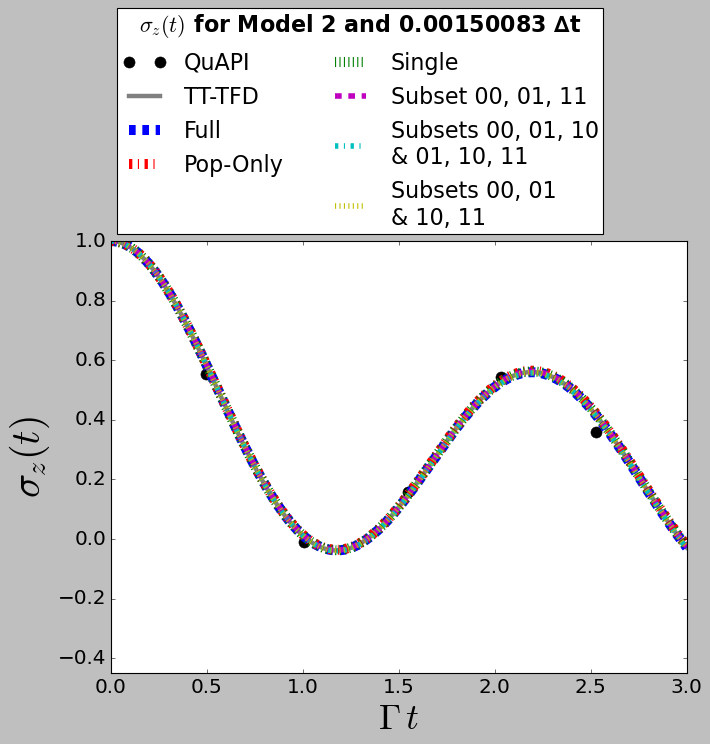

In [294]:
GQMETypes = [["Full"], ["PopulationsOnly"], ["SingleState", "SingleState"], 
             ["Subset_00_01_11"], ["Subset_00_01_10", "Subset_01_10_11"], 
             ["Subset_00_01", "Subset_10_11"]]

time_U, U, time, sigmaZDict = dataUandGQME(GQMETypes)

numCols = 2 # number of columns in legend; generally should be 2
legendPos_x = 0.15 # x position of legend (increasing moves more right)
# y position of legend (increasing moves more up)
legendPos_y = .655 + 0.06 * (math.ceil((len(GQMETypes) + 2)/2) - 2) 
graphSigmaZ(GQMETypes, numCols, legendPos_x, legendPos_y, time_U, U, time, sigmaZDict)

# ---- $\color{red}{\text{End of completed tutorial, below is still being edited}}$ ----

# **6. Calculating the ${\cal G}(t)$ Matrix for the Quantum Computing Algorithm**

# **7. Calculating the Dynamics via Quantum Computing**

The goal of this section is to demonstrate how we turn the TT-TFD+GQME propagation for open quantum dynamics systems to an algorithm that is implemented on a near-term digital quantum computer. At the heart of that algorithm is the perparation of a dilated unitary matrix $U_G(t)$ that comes from the non-unitary motion governing matrix $G(t)$ that satisfies $\sigma(t)=G(t)\sigma(0)$. For exact input from TT-TFD, $U(t)=G(t)$. Therefore, for the purpose of demonstration, $U(t)$ generated from previous sections is used in place of $G(t)$. Below we show the construction of $U_G(t)$ and how it is used for propagation on a quantum device. 

Here we focus on obtaining the exact dynamics of the reduced electronic density operator of the spin-boson model $\sigma(t)$, which is a $2\times 2$ matrix in the electronic Hilbert space and a length-4 vector in the corresponding Liouville space. The reduced density operator is initiated at the first electronic state, or, $\sigma(0)=(1,0,0,0)^T$ in the Liouville space representation. 

The dynamics of $\sigma(t)$ could be obtained with the motion-governing matrix $G(t)$: $\sigma(t)=G(t)\sigma(0)$, where $G(t)$ is a $4\times 4$ matrix in the Liouville space.

In order to make $G(t)$ unitary, we perform the Sz-Nagy dilation, which dilates the $4\times 4$ $G(t)$ into a $8\times 8$ $U_{G(t)}$ that provides exactly the same motion as $G(t)$, but is unitary ($U_{G(t)}^\dagger U_{G(t)}=I$):

\begin{equation}
\hat{U}_{G(t)}=\begin{pmatrix}
\hat{G}(t)&\sqrt{\hat{I}-\hat{G}(t)\hat{G}^\dagger(t)}\\
\sqrt{\hat{I}-\hat{G}^\dagger(t)\hat{G}(t)}&-\hat{G}^\dagger(t)\\
\end{pmatrix},
\end{equation}

while the vectorized $\sigma(0)$ is also dilated by appending ancillary zero elements:
\begin{equation}
\sigma(0)=(\sigma_{00}(0),\sigma_{01}(0),\sigma_{10}(0),\sigma_{11}(0))^\dagger\rightarrow \tilde{\sigma}(0)=(\sigma_{00}(0),\sigma_{01}(0),\sigma_{10}(0),\sigma_{11}(0),0,0,0,0)^\dagger.
\end{equation}

Then the dilated, time-updated density matrix is given by:
\begin{equation}
\tilde{\sigma}(t)=\hat{U}_{G(t)}\tilde{\sigma}(0).
\end{equation} 

## **7.1 Constants and Global Variables**

$\quad$ This subsection defines the constants and global variables used within the calculation of the time evolution superoperator ${\cal U}(\tau)$. 

In [295]:
# general constants
TIME_STEPS = 2000 # number of time steps
tau = 5              # propagation time step
au2ps = 0.00002418884254 # Conversion of attoseconds to atomic units
timeau = 12.409275
DT = tau * au2ps * timeau # time step in au
FINAL_TIME = TIME_STEPS * DT # final time
DOF_E = 2 # number of electronic states
DOF_E_SQ = DOF_E * DOF_E
DOF_N = 60 # number of nuclear DOF

MODEL_NUM = 2 # model number

# setting parameters that based on the model number
BETA = 5 # inverse finite temperature beta = 1 / (k_B * T)
GAMMA_DA = 1 # diabatic coupling
if MODEL_NUM == 1:
    EPSILON = 1    # half of the energy gap between the donor and acceptor
    XI = 0.1       # friction coefficient, determines strength of e-n coupling 
    OMEGA_C = 1    # cutoff frequency of the nuclear DOF
    OMEGA_MAX = 5  # maximum frequency of the nuclear DOF
elif MODEL_NUM == 2:
    EPSILON = 1
    XI = 0.1
    OMEGA_C = 2
    OMEGA_MAX = 10 
elif MODEL_NUM == 3:
    EPSILON = 1
    XI = 0.1
    OMEGA_C = 7.5
    OMEGA_MAX = 36
elif MODEL_NUM == 4:
    EPSILON = 1
    XI = 0.4
    OMEGA_C = 2
    OMEGA_MAX = 10
elif MODEL_NUM == 6:
    EPSILON = 0
    XI = 0.2
    OMEGA_C = 2.5
    OMEGA_MAX = 12

print("        model # =", MODEL_NUM)
print("     time steps =", TIME_STEPS)
print("             DT =", DT)
print("     final time =", FINAL_TIME)
print("          DOF_E =", DOF_E)
print("          DOF_N =", DOF_N)
print("        epsilon =", EPSILON)
print("             xi =", XI)
print("        omega_c =", OMEGA_C)
print("      omega_max =", OMEGA_MAX)

        model # = 2
     time steps = 2000
             DT = 0.0015008299950527925
     final time = 3.001659990105585
          DOF_E = 2
          DOF_N = 60
        epsilon = 1
             xi = 0.1
        omega_c = 2
      omega_max = 10


## **7.2 Reading in Files for ${\cal U}(t)$ or ${\cal G}(t)$**

In [296]:
operStr = "U" # which time evolution superoperator, U or G

timeEvo = np.zeros((TIME_STEPS, DOF_E_SQ, DOF_E_SQ), dtype=np.complex_)
time = np.zeros((TIME_STEPS))

if operStr == "U":
    PARAM_STR = "_Spin-Boson_Ohmic_TT-TFD_b%sG%s_e%s_"%(BETA, GAMMA_DA, EPSILON)
    PARAM_STR += "t%.8f_xi%swc%s_"%(DT, XI, OMEGA_C)
    PARAM_STR += "wmax%s_dofn%s_tf%.4f"%(OMEGA_MAX, DOF_N, FINAL_TIME)

for j in range(DOF_E_SQ):
    a = int(j/DOF_E)
    b = int(j%DOF_E)
    for k in range(DOF_E_SQ):
        c = int(k/DOF_E)
        d = int(k%DOF_E)

        t, timeEvo_real, timeEvo_imag = np.hsplit(
            np.loadtxt(operStr + "_Output/" + operStr + "_%s%s%s%s"%(a,b,c,d) 
            + PARAM_STR + ".txt"), 3)

        for l in range(TIME_STEPS):
            time[l] = t[l]
            timeEvo[l][j][k] = timeEvo_real[l] + 1.j * timeEvo_imag[l]

## **7.3 Dilation of Time Evolution Superoperator ${\cal U}(t)$ or ${\cal G}(t)$**

In [297]:
timeEvo[0]

array([[ 9.99997748e-01+0.00000000e+00j,  2.25248733e-06+1.50082548e-03j,
         2.25248733e-06-1.50082548e-03j,  2.25248730e-06+0.00000000e+00j],
       [ 2.25248628e-06+1.50082548e-03j,  9.99993227e-01-3.00165094e-03j,
         2.26129187e-06-2.53080504e-11j, -2.25248831e-06-1.50082549e-03j],
       [ 2.25248628e-06-1.50082548e-03j,  2.26129187e-06+2.53080481e-11j,
         9.99993227e-01+3.00165094e-03j, -2.25248831e-06+1.50082549e-03j],
       [ 2.25248730e-06+0.00000000e+00j, -2.25248725e-06-1.50082548e-03j,
        -2.25248725e-06+1.50082548e-03j,  9.99997748e-01+0.00000000e+00j]])

In [298]:
#Initiation of the dilated tilde{\sigma}(0) as a length-8 vector
til_sig_0=np.array([1,0,0,0,0,0,0,0])
til_sig_array=np.zeros((8,TIME_STEPS),dtype=complex)
til_sig_array[:,0]=til_sig_0
UG_array=[]
#Propagation loop
for i in range(TIME_STEPS):
#Preparation of the dilated U_G(t) from G(t)=U(t)
    UG=np.array([[timeEvo[i],LA.sqrtm(np.eye(4)-timeEvo[i]@np.conjugate(np.transpose(timeEvo[i])))],[LA.sqrtm(np.eye(4)-np.conjugate(np.transpose(timeEvo[i])@timeEvo[i])),-np.conjugate(np.transpose(timeEvo[i])]])
    UG_array.append(UG)
    til_sig_array[:,i]=UG@til_sig_0
#Obtain and plot expectation values
plt.plot(t,til_sig_array[0]) #Population of spin-up state

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (926317953.py, line 9)

With the already obtained unitary $U_G(t)$s, next we show the corresponding quantum algorithm on qiskit simulator. First we import the qiskit dependencies:

In [ ]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import BasicAer
from qiskit.compiler import transpile
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.quantum_info import process_fidelity
from qiskit import Aer, execute  
from qiskit.extensions import RXGate, XGate, CXGate
from qutip import *

In [ ]:
occ=8
N=8
count=200
qc_result=np.zeros((count,2))
qc_time_list=np.zeros((count))
for i in range(count):
    Uinp=UG_array[(i)*20]
    U_gate=Operator(Uinp)
    qreg=QuantumRegister(3) # qreg is filled with two qubits 
    creg=ClassicalRegister(3) # creg is filled with two classical bits
    entangler=QuantumCircuit(qreg,creg) # we put together our qreg and creg to make our Quantum Circuit, called entangler here.
    entangler.append(U_gate,[0,1,2])
    M_simulator=Aer.backends(name='qasm_simulator')[0]
    entangler.measure(0,0) # measure the first qubit and record it in the first classical bit
    entangler.measure(1,1) # measure the second qubit and record it in the second classical bit
    entangler.measure(2,2) 
    job=execute(entangler, M_simulator,shots=2000)
    hist=job.result().get_counts()
    raw_rho11=np.sqrt(hist.get('000'))
    if hist.get('011')==None:
        raw_rho22=0
    else:
        raw_rho22=np.sqrt(hist.get('011'))
    rho11=raw_rho11/(raw_rho11+raw_rho22)
    rho22=raw_rho22/(raw_rho11+raw_rho22)
    qc_result[i]=[rho11,rho22]
    qc_time_list[i]=i*(2/count)
plt.plot(qc_time_list, qc_result[:,0].real, 'r-', label="Donor state, matrix-vector")
plt.plot(qc_time_list, qc_result[:,1].real, 'b-', label='Acceptor state, matrix-vector')
plt.legend()